In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
holiday = pd.read_csv('holidays_events.csv') #drop for now
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv') 
transactions = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [4]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [5]:
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [6]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [7]:
test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

# Train/Test Dataframe

In [8]:
print(f'Training set range from {train.date.min()} to {train.date.max()}')
print(f'Testing set range from {test.date.min()} to {test.date.max()}')

Training set range from 2013-01-01 to 2017-08-15
Testing set range from 2017-08-16 to 2017-08-31


In [9]:
train.shape

(3000888, 6)

In [10]:
train.store_nbr.nunique()

54

In [11]:
print(f'There are {train.family.nunique()} unqiue families.')
train.family.unique()

There are 33 unqiue families.


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [129]:
sales_by_family = train[['family','sales']].groupby('family').mean().sort_values(by='sales')
family_dict = sales_by_family.rank().sales.to_dict()

In [13]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [14]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [15]:
train = train.set_index('date')

In [16]:
train.index = pd.to_datetime(train.index)

In [17]:
train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

<AxesSubplot:xlabel='date'>

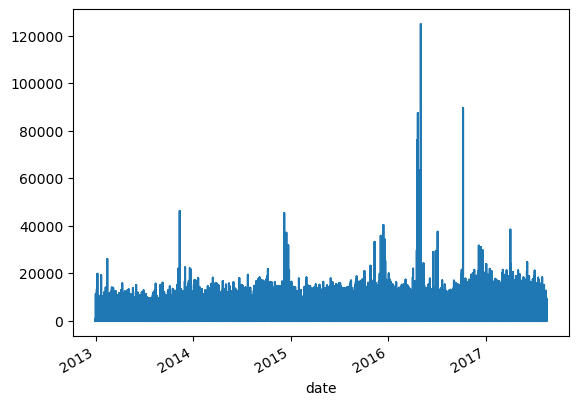

In [18]:
train['sales'].plot()

In [19]:
train.query('sales > 70000')

id  store_nbr     family       sales  onpromotion
date                                                              
2016-04-18  2139699         45  GROCERY I   76090.000           38
2016-04-21  2144154         20  GROCERY I   87438.516           53
2016-05-02  2163723          2  GROCERY I  124717.000           59
2016-10-07  2445984         39      MEATS   89576.360            0

<AxesSubplot:>

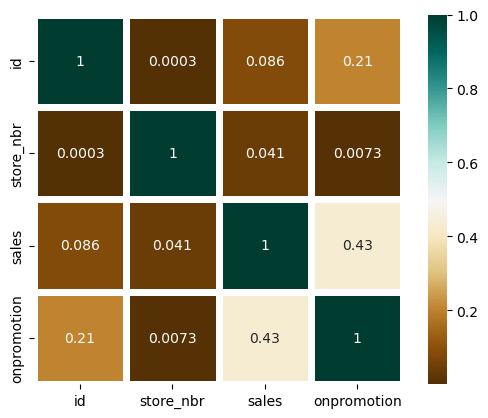

In [20]:
sns.heatmap(train.corr(), annot=True, cmap="BrBG", square=True, linewidths=5)

<AxesSubplot:xlabel='date'>

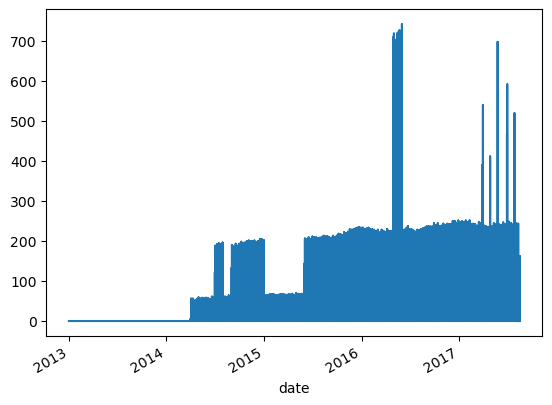

In [21]:
train.onpromotion.plot()

# Transactions

In [22]:
transactions.head(5)

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [23]:
train.head(5)

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [24]:
transactions = transactions.set_index('date')

In [25]:
transactions.index = pd.to_datetime(transactions.index)

In [26]:
train_merge = pd.merge(train,transactions,how='left',left_on=[train.index,'store_nbr'],right_on=[transactions.index,'store_nbr'])
train_merge = train_merge.rename(columns={'key_0':'date'})
train_merge = train_merge.set_index('date')
train_merge.head()

id  store_nbr      family  sales  onpromotion  transactions
date                                                                   
2013-01-01   0          1  AUTOMOTIVE    0.0            0           NaN
2013-01-01   1          1   BABY CARE    0.0            0           NaN
2013-01-01   2          1      BEAUTY    0.0            0           NaN
2013-01-01   3          1   BEVERAGES    0.0            0           NaN
2013-01-01   4          1       BOOKS    0.0            0           NaN

In [27]:
train_merge = train_merge.fillna(0)

Text(0.5, 1.0, 'Sales and transactions')

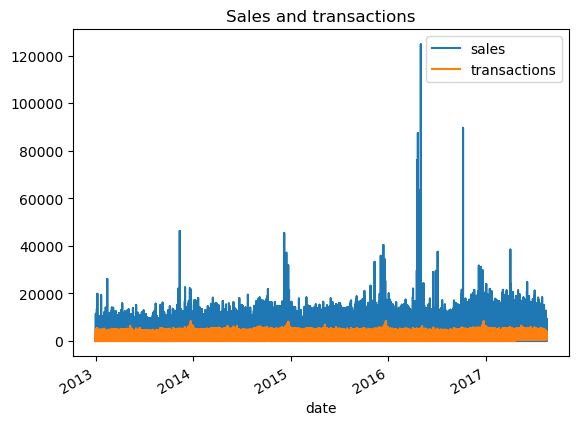

In [28]:
fig,ax = plt.subplots()
train_merge['sales'].plot(ax=ax)
train_merge['transactions'].plot(ax=ax)
plt.legend()
plt.title('Sales and transactions')

# Oil 

In [29]:
oil = pd.read_csv('oil.csv')

In [31]:
oil = oil.set_index('date')
oil.index = pd.to_datetime(oil.index)
oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [32]:
oil['dcoilwtico']=oil['dcoilwtico'].interpolate()
oil.iloc[0] = oil['dcoilwtico'].iloc[1]

In [33]:
d_range = pd.date_range(oil.index.min(),oil.index.max())
d_range = pd.DataFrame({'date': d_range})
d_range

date
0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
4    2013-01-05
...         ...
1699 2017-08-27
1700 2017-08-28
1701 2017-08-29
1702 2017-08-30
1703 2017-08-31

[1704 rows x 1 columns]

In [34]:
d_range = pd.date_range(oil.index.min(),oil.index.max())
d_range = pd.DataFrame({'date': d_range})
d_range
oil_merge = pd.merge(d_range,oil,how='left',left_on='date',right_on=oil.index)
oil_merge = oil_merge.set_index('date')
oil_merge

dcoilwtico
date                  
2013-01-01       93.14
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-05         NaN
...                ...
2017-08-27         NaN
2017-08-28       46.40
2017-08-29       46.46
2017-08-30       45.96
2017-08-31       47.26

[1704 rows x 1 columns]

In [35]:
oil_merge = oil_merge.interpolate()

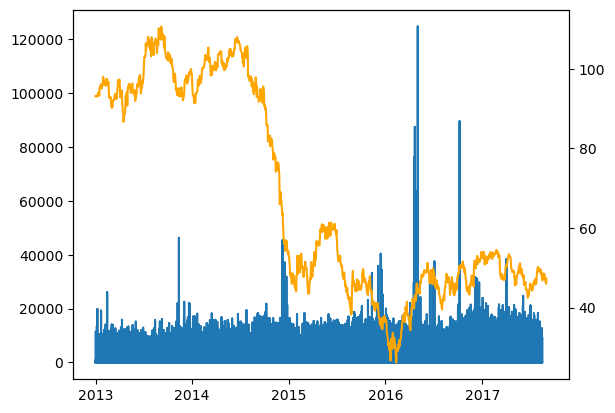

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(train.index, train['sales'])
ax2.plot(oil_merge.index, oil_merge['dcoilwtico'],color='orange');

In [37]:
train_merge2 = pd.merge(train_merge,oil_merge,how='left',left_on=train_merge.index,right_on=oil_merge.index)
train_merge2 = train_merge2.rename(columns={'key_0':'date'})
train_merge2 = train_merge2.set_index('date')
train_merge2.index = pd.to_datetime(train_merge2.index)
train_merge2

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  transactions  dcoilwtico  
date                                               
2013-01-01            0           0.0       93.14  
2013-01-01            0           0.0       93.14  
2013-01-01            0           0.0       93.14  
2013-01-01            0           0.0       93.14  
2013-01-01            0           0.0       93.14  
...                 ...           ...         ...  
2017-08-15            0        2155.0       47.57  
2017-08-15            1        2155.0       47.57  
2017-08-15          148        2155.0       47.57  
2017-08-15            8        2155.0       47.57  
2017-08-15            0        2155.0       47.57  

[3000888 rows x 7 columns]

In [38]:
train_merge2['dcoilwtico']=train_merge2['dcoilwtico'].interpolate()

# Holiday

In [470]:
holiday.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [471]:
holiday.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [41]:
holiday.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [472]:
holiday = holiday.set_index('date')

In [473]:
holiday.index = pd.to_datetime(holiday.index)

In [44]:
holiday.type.value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [45]:
holiday = holiday.drop(holiday.query('type == "Work Day"').index,axis=0)

In [46]:
holiday.query('type == "Transfer"')

type    locale locale_name  \
date                                         
2012-10-12  Transfer  National     Ecuador   
2013-10-11  Transfer  National     Ecuador   
2014-10-10  Transfer  National     Ecuador   
2016-05-27  Transfer  National     Ecuador   
2016-07-24  Transfer     Local   Guayaquil   
2016-08-12  Transfer  National     Ecuador   
2017-01-02  Transfer  National     Ecuador   
2017-04-13  Transfer     Local      Cuenca   
2017-05-26  Transfer  National     Ecuador   
2017-08-11  Transfer  National     Ecuador   
2017-09-29  Transfer     Local      Ibarra   
2017-12-08  Transfer     Local       Quito   

                                       description  transferred  
date                                                             
2012-10-12     Traslado Independencia de Guayaquil        False  
2013-10-11     Traslado Independencia de Guayaquil        False  
2014-10-10     Traslado Independencia de Guayaquil        False  
2016-05-27           Traslado Batalla de Pichincha        False  
2016-07-24         Traslado Fundacion de Guayaquil        False  
2016-08-12  Traslado Primer Grito de Independencia        False  
2017-01-02             Traslado Primer dia del ano        False  
2017-04-13                     Fundacion de Cuenca        False  
2017-05-26           Traslado Batalla de Pichincha        False  
2017-08-11  Traslado Primer Grito de Independencia        False  
2017-09-29                     Fundacion de Ibarra        False  
2017-12-08             Traslado Fundacion de Quito        False

In [47]:
holiday.query('transferred == True')

type    locale locale_name                    description  \
date                                                                       
2012-10-09  Holiday  National     Ecuador     Independencia de Guayaquil   
2013-10-09  Holiday  National     Ecuador     Independencia de Guayaquil   
2014-10-09  Holiday  National     Ecuador     Independencia de Guayaquil   
2016-05-24  Holiday  National     Ecuador           Batalla de Pichincha   
2016-07-25  Holiday     Local   Guayaquil         Fundacion de Guayaquil   
2016-08-10  Holiday  National     Ecuador  Primer Grito de Independencia   
2017-01-01  Holiday  National     Ecuador             Primer dia del ano   
2017-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2017-05-24  Holiday  National     Ecuador           Batalla de Pichincha   
2017-08-10  Holiday  National     Ecuador  Primer Grito de Independencia   
2017-09-28  Holiday     Local      Ibarra            Fundacion de Ibarra   
2017-12-06  Holiday     Local       Quito             Fundacion de Quito   

            transferred  
date                     
2012-10-09         True  
2013-10-09         True  
2014-10-09         True  
2016-05-24         True  
2016-07-25         True  
2016-08-10         True  
2017-01-01         True  
2017-04-12         True  
2017-05-24         True  
2017-08-10         True  
2017-09-28         True  
2017-12-06         True

In [48]:
holiday['type'] = holiday['type'].replace(['Transfer','Bridge','Additional'],'Holiday')

In [49]:
holiday = holiday.drop(['transferred','description'],axis=1)

In [50]:
test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [51]:
holiday[holiday.index>='2017-08-16']

type    locale                     locale_name
date                                                         
2017-08-24  Holiday     Local                          Ambato
2017-09-28  Holiday     Local                          Ibarra
2017-09-29  Holiday     Local                          Ibarra
2017-10-07  Holiday     Local                         Quevedo
2017-10-09  Holiday  National                         Ecuador
2017-11-02  Holiday  National                         Ecuador
2017-11-03  Holiday  National                         Ecuador
2017-11-06  Holiday  Regional  Santo Domingo de los Tsachilas
2017-11-07  Holiday  Regional                     Santa Elena
2017-11-10  Holiday     Local                        Guaranda
2017-11-11  Holiday     Local                       Latacunga
2017-11-12  Holiday     Local                          Ambato
2017-12-05  Holiday     Local                           Quito
2017-12-06  Holiday     Local                           Quito
2017-12-08  Holiday     Local                            Loja
2017-12-08  Holiday     Local                           Quito
2017-12-21  Holiday  National                         Ecuador
2017-12-22  Holiday     Local                         Salinas
2017-12-22  Holiday  National                         Ecuador
2017-12-23  Holiday  National                         Ecuador
2017-12-24  Holiday  National                         Ecuador
2017-12-25  Holiday  National                         Ecuador
2017-12-26  Holiday  National                         Ecuador

In [52]:
holiday.head(5)

type    locale locale_name
date                                     
2012-03-02  Holiday     Local       Manta
2012-04-01  Holiday  Regional    Cotopaxi
2012-04-12  Holiday     Local      Cuenca
2012-04-14  Holiday     Local    Libertad
2012-04-21  Holiday     Local    Riobamba

# Stores

In [53]:
stores = pd.read_csv('stores.csv')

In [54]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [55]:
stores=stores.drop(['city','state'],axis=1)

In [56]:
train_merge2['date'] = train_merge2.index
train_merge3 = pd.merge(train_merge2,stores,how='left',left_on='store_nbr',right_on='store_nbr')
train_merge3=train_merge3.set_index('date')
train_merge3 = train_merge3.drop(['store_nbr','id'],axis=1)
train_merge3.head()

family  sales  onpromotion  transactions  dcoilwtico type  \
date                                                                        
2013-01-01  AUTOMOTIVE    0.0            0           0.0       93.14    D   
2013-01-01   BABY CARE    0.0            0           0.0       93.14    D   
2013-01-01      BEAUTY    0.0            0           0.0       93.14    D   
2013-01-01   BEVERAGES    0.0            0           0.0       93.14    D   
2013-01-01       BOOKS    0.0            0           0.0       93.14    D   

            cluster  
date                 
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13

In [57]:
train_merge4 = train_merge3.copy()
train_merge4.family = train_merge4.family.map(family_dict)
train_merge4

family     sales  onpromotion  transactions  dcoilwtico type  \
date                                                                            
2013-01-01     6.101236     0.000            0           0.0       93.14    D   
2013-01-01     0.110528     0.000            0           0.0       93.14    D   
2013-01-01     3.715723     0.000            0           0.0       93.14    D   
2013-01-01  2385.793151     0.000            0           0.0       93.14    D   
2013-01-01     0.070797     0.000            0           0.0       93.14    D   
...                 ...       ...          ...           ...         ...  ...   
2017-08-15   350.532292   438.133            0        2155.0       47.57    B   
2017-08-15    96.770202   154.553            1        2155.0       47.57    B   
2017-08-15  1349.352123  2419.729          148        2155.0       47.57    B   
2017-08-15     2.961599   121.000            8        2155.0       47.57    B   
2017-08-15    22.163190    16.000            0        2155.0       47.57    B   

            cluster  
date                 
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
...             ...  
2017-08-15        6  
2017-08-15        6  
2017-08-15        6  
2017-08-15        6  
2017-08-15        6  

[3000888 rows x 7 columns]

# Creating features

In [58]:
def time_period(df):
    
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    return df

train_merge3 = time_period(train_merge3)
train_merge3

family     sales  onpromotion  transactions  \
date                                                                          
2013-01-01                  AUTOMOTIVE     0.000            0           0.0   
2013-01-01                   BABY CARE     0.000            0           0.0   
2013-01-01                      BEAUTY     0.000            0           0.0   
2013-01-01                   BEVERAGES     0.000            0           0.0   
2013-01-01                       BOOKS     0.000            0           0.0   
...                                ...       ...          ...           ...   
2017-08-15                     POULTRY   438.133            0        2155.0   
2017-08-15              PREPARED FOODS   154.553            1        2155.0   
2017-08-15                     PRODUCE  2419.729          148        2155.0   
2017-08-15  SCHOOL AND OFFICE SUPPLIES   121.000            8        2155.0   
2017-08-15                     SEAFOOD    16.000            0        2155.0   

            dcoilwtico type  cluster  dayofweek  quarter  month  year  \
date                                                                    
2013-01-01       93.14    D       13          1        1      1  2013   
2013-01-01       93.14    D       13          1        1      1  2013   
2013-01-01       93.14    D       13          1        1      1  2013   
2013-01-01       93.14    D       13          1        1      1  2013   
2013-01-01       93.14    D       13          1        1      1  2013   
...                ...  ...      ...        ...      ...    ...   ...   
2017-08-15       47.57    B        6          1        3      8  2017   
2017-08-15       47.57    B        6          1        3      8  2017   
2017-08-15       47.57    B        6          1        3      8  2017   
2017-08-15       47.57    B        6          1        3      8  2017   
2017-08-15       47.57    B        6          1        3      8  2017   

            dayofyear  dayofmonth  
date                               
2013-01-01          1           1  
2013-01-01          1           1  
2013-01-01          1           1  
2013-01-01          1           1  
2013-01-01          1           1  
...               ...         ...  
2017-08-15        227          15  
2017-08-15        227          15  
2017-08-15        227          15  
2017-08-15        227          15  
2017-08-15        227          15  

[3000888 rows x 13 columns]

In [59]:
sales_by_family = train[['family','sales']].groupby('family').mean().sort_values(by='sales')
family_dict = sales_by_family.to_dict()['sales']

In [60]:
train_merge4 = train_merge3.copy()
train_merge4.family = train_merge4.family.map(family_dict)
train_merge4

family     sales  onpromotion  transactions  dcoilwtico type  \
date                                                                            
2013-01-01     6.101236     0.000            0           0.0       93.14    D   
2013-01-01     0.110528     0.000            0           0.0       93.14    D   
2013-01-01     3.715723     0.000            0           0.0       93.14    D   
2013-01-01  2385.793151     0.000            0           0.0       93.14    D   
2013-01-01     0.070797     0.000            0           0.0       93.14    D   
...                 ...       ...          ...           ...         ...  ...   
2017-08-15   350.532292   438.133            0        2155.0       47.57    B   
2017-08-15    96.770202   154.553            1        2155.0       47.57    B   
2017-08-15  1349.352123  2419.729          148        2155.0       47.57    B   
2017-08-15     2.961599   121.000            8        2155.0       47.57    B   
2017-08-15    22.163190    16.000            0        2155.0       47.57    B   

            cluster  dayofweek  quarter  month  year  dayofyear  dayofmonth  
date                                                                         
2013-01-01       13          1        1      1  2013          1           1  
2013-01-01       13          1        1      1  2013          1           1  
2013-01-01       13          1        1      1  2013          1           1  
2013-01-01       13          1        1      1  2013          1           1  
2013-01-01       13          1        1      1  2013          1           1  
...             ...        ...      ...    ...   ...        ...         ...  
2017-08-15        6          1        3      8  2017        227          15  
2017-08-15        6          1        3      8  2017        227          15  
2017-08-15        6          1        3      8  2017        227          15  
2017-08-15        6          1        3      8  2017        227          15  
2017-08-15        6          1        3      8  2017        227          15  

[3000888 rows x 13 columns]

In [61]:
train_merge4.isna().sum()

family          0
sales           0
onpromotion     0
transactions    0
dcoilwtico      0
type            0
cluster         0
dayofweek       0
quarter         0
month           0
year            0
dayofyear       0
dayofmonth      0
dtype: int64

In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
matrix = encoder.fit_transform(train_merge4['type'].values.reshape(-1,1)).toarray()

column_name = ['A','B','C','D','E']

for i in range(len(matrix.T)):
    train_merge4[column_name[i]] = matrix.T[i]
    
train_merge4 = train_merge4.drop(['type'],axis=1)
train_merge4

family     sales  onpromotion  transactions  dcoilwtico  \
date                                                                       
2013-01-01     6.101236     0.000            0           0.0       93.14   
2013-01-01     0.110528     0.000            0           0.0       93.14   
2013-01-01     3.715723     0.000            0           0.0       93.14   
2013-01-01  2385.793151     0.000            0           0.0       93.14   
2013-01-01     0.070797     0.000            0           0.0       93.14   
...                 ...       ...          ...           ...         ...   
2017-08-15   350.532292   438.133            0        2155.0       47.57   
2017-08-15    96.770202   154.553            1        2155.0       47.57   
2017-08-15  1349.352123  2419.729          148        2155.0       47.57   
2017-08-15     2.961599   121.000            8        2155.0       47.57   
2017-08-15    22.163190    16.000            0        2155.0       47.57   

            cluster  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                          
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
...             ...        ...      ...    ...   ...        ...         ...   
2017-08-15        6          1        3      8  2017        227          15   
2017-08-15        6          1        3      8  2017        227          15   
2017-08-15        6          1        3      8  2017        227          15   
2017-08-15        6          1        3      8  2017        227          15   
2017-08-15        6          1        3      8  2017        227          15   

              A    B    C    D    E  
date                                 
2013-01-01  0.0  0.0  0.0  1.0  0.0  
2013-01-01  0.0  0.0  0.0  1.0  0.0  
2013-01-01  0.0  0.0  0.0  1.0  0.0  
2013-01-01  0.0  0.0  0.0  1.0  0.0  
2013-01-01  0.0  0.0  0.0  1.0  0.0  
...         ...  ...  ...  ...  ...  
2017-08-15  0.0  1.0  0.0  0.0  0.0  
2017-08-15  0.0  1.0  0.0  0.0  0.0  
2017-08-15  0.0  1.0  0.0  0.0  0.0  
2017-08-15  0.0  1.0  0.0  0.0  0.0  
2017-08-15  0.0  1.0  0.0  0.0  0.0  

[3000888 rows x 17 columns]

In [63]:
# def lag_feature(df):
#     df = df.copy()
#     target_map = df['sales'].to_dict() 
#     df['lag1'] = (df.index-pd.Timedelta('364 days')).map(target_map)
#     df['lag2'] = (df.index-pd.Timedelta('728 days')).map(target_map)
#     df['lag3'] = (df.index-pd.Timedelta('1092 days')).map(target_map)
#     return df
# train_merge4 = lag_feature(train_merge4)
# train_merge4

# Dimensionality reduction

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#1. Scale and center the data
# We scale it because like if one axis has unit of millions and another axis has unit of hundreds, 
# the graph will become very skewed and PCA won't work well
scaled_data = StandardScaler().fit_transform(train_merge4)

#2. PCA
pca = PCA(n_components=10) #extract 10 most important component
#pca = PCA(n_components=0.95) -> get 95% variance 
#noted that the less components there are, the faster the training and lower the accuracy
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

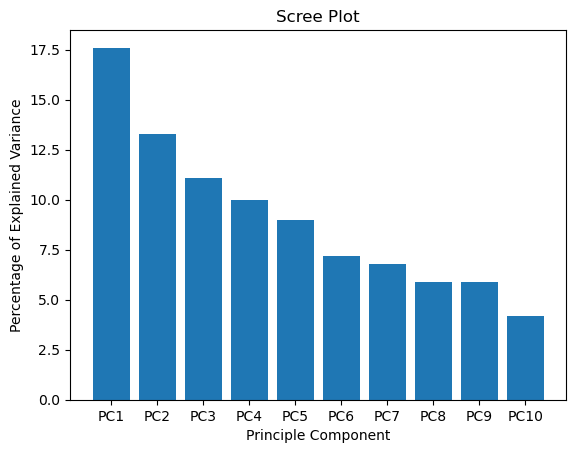

In [71]:
#3. Scree Plot
#pca.explained_variance_ratio_ return an array that show how much useful information (variance) each PC captured
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.xlabel('Principle Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

In [73]:
#4. PCA graph
pca_df = pd.DataFrame(pca_data,columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.xlabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7c4059faf0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#loading score
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_feature = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_feature])

# Model building

from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3,test_size=648648,gap=24)

fig,ax=plt.subplots(3,1)
fold=0
for train_index,val_index in tss.split(train_merge4):
    train = train_merge4.iloc[train_index]
    test = train_merge4.iloc[val_index]
    #Visualizing time split
    train['sales'].plot(ax=ax[fold])
    test['sales'].plot(ax=ax[fold])
    ax[fold].axvline(test.index.min(),color='black',ls='--')
    fold+=1
plt.show()

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2,test_size=648648,gap=24)

score = []
for i, (train_index,val_index) in enumerate(tss.split(train_merge4)):
    train = train_merge4.iloc[train_index]
    test = train_merge4.iloc[val_index]
    X_train = train.drop('sales',axis=1)
    y_train = train['sales']
    X_test = test.drop('sales',axis=1)
    y_test = test['sales']
    
    #xgboost as sample model
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)
    
    prediction = reg.predict(X_test)
    score.append(np.sqrt(mean_squared_error(y_test, prediction)))
print(score)

[15:34:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:943.47043	validation_1-rmse:1331.99125
[100]	validation_0-rmse:543.96036	validation_1-rmse:908.16184
[200]	validation_0-rmse:428.16872	validation_1-rmse:745.91984
[300]	validation_0-rmse:388.14536	validation_1-rmse:665.35998
[400]	validation_0-rmse:368.77156	validation_1-rmse:630.03150
[500]	validation_0-rmse:356.06237	validation_1-rmse:610.30011
[600]	validation_0-rmse:346.37263	validation_1-rmse:597.85876
[700]	validation_0-rmse:339.43350	validation_1-rmse:592.94208
[800]	validation_0-rmse:334.84086	validation_1-rmse:589.96618
[900]	validation_0-rmse:330.84709	validation_1-rmse:586.05054
[999]	validation_0-rmse:327.49206	validation_1-rmse:583.05386
[15:39:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpyt

# Pipeline

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

#creating estimators

class dt_trans(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = X.set_index('date')
        X.index = pd.to_datetime(X.index)
        return X

class Merger(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        #transaction merge
        _merge = pd.merge(X,transactions,how='left',left_on=[X.index,'store_nbr'],right_on=[transactions.index,'store_nbr'])
        _merge = _merge.rename(columns={'key_0':'date'})
        _merge = _merge.set_index('date')
        _merge = _merge.fillna(0)
        #oil merge
        _merge2 = pd.merge(_merge,oil_merge,how='left',left_on=_merge.index,right_on=oil_merge.index)
        _merge2 = _merge2.rename(columns={'key_0':'date'})
        _merge2 = _merge2.set_index('date')
        _merge2.index = pd.to_datetime(_merge2.index)
        #store merge
        _merge2['date'] = _merge2.index
        _merge3 = pd.merge(_merge2,stores,how='left',left_on='store_nbr',right_on='store_nbr')
        _merge3 = _merge3.set_index('date')
        _merge3 = _merge3.drop(['store_nbr','id'],axis=1)
        return _merge3
        
class time_period(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        df = X.copy()
        df['dayofweek'] = df.index.dayofweek
        df['quarter'] = df.index.quarter
        df['month'] = df.index.month
        df['year'] = df.index.year
        df['dayofyear'] = df.index.dayofyear
        df['dayofmonth'] = df.index.day
        return df

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X['type'].values.reshape(-1,1)).toarray()

        column_name = ['A','B','C','D','E']

        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
        X = X.drop(['type'],axis=1)
        
        #Family_dict encoder
        X.family = X['family'].map(family_dict)
        
        return X
    
    
class LagFeature(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        target_map = X['sales'].to_dict() 
        X['lag1'] = (X.index-pd.Timedelta('364 days')).map(target_map)
        X['lag2'] = (X.index-pd.Timedelta('728 days')).map(target_map)
        X['lag3'] = (X.index-pd.Timedelta('1092 days')).map(target_map)
        return X
        

In [108]:
test = pd.read_csv('test.csv')

In [113]:
train = pd.read_csv('train.csv')

In [142]:
train_transformed = pipe.fit_transform(train)

In [139]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('dt_transform',dt_trans()),
    ('merger',Merger()),
    ('tpfeature',time_period()),
    ('encoder',FeatureEncoder()),
])

test_transformed = pipe.fit_transform(test)

In [144]:
concat_df = pd.concat([train_transformed,test_transformed])
concat_df

family  sales  onpromotion  transactions  dcoilwtico  cluster  \
date                                                                        
2013-01-01    10.0    0.0            0           0.0       93.14       13   
2013-01-01     2.0    0.0            0           0.0       93.14       13   
2013-01-01     7.0    0.0            0           0.0       93.14       13   
2013-01-01    32.0    0.0            0           0.0       93.14       13   
2013-01-01     1.0    0.0            0           0.0       93.14       13   
...            ...    ...          ...           ...         ...      ...   
2017-08-31    27.0    NaN            1           0.0       47.26        6   
2017-08-31    20.0    NaN            0           0.0       47.26        6   
2017-08-31    31.0    NaN            1           0.0       47.26        6   
2017-08-31     6.0    NaN            9           0.0       47.26        6   
2017-08-31    18.0    NaN            0           0.0       47.26        6   

            dayofweek  quarter  month  year  dayofyear  dayofmonth    A    B  \
date                                                                           
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
...               ...      ...    ...   ...        ...         ...  ...  ...   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   

              C    D    E  
date                       
2013-01-01  0.0  1.0  0.0  
2013-01-01  0.0  1.0  0.0  
2013-01-01  0.0  1.0  0.0  
2013-01-01  0.0  1.0  0.0  
2013-01-01  0.0  1.0  0.0  
...         ...  ...  ...  
2017-08-31  0.0  0.0  0.0  
2017-08-31  0.0  0.0  0.0  
2017-08-31  0.0  0.0  0.0  
2017-08-31  0.0  0.0  0.0  
2017-08-31  0.0  0.0  0.0  

[3029400 rows x 17 columns]

In [146]:
train_transformed.index.max()

Timestamp('2017-08-15 00:00:00')

In [145]:
def lag_feature(df):
    df = df.copy()
    target_map = df['sales'].to_dict() 
    df['lag1'] = (df.index-pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index-pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index-pd.Timedelta('1092 days')).map(target_map)
    return df
concat_df_lag = lag_feature(concat_df)
concat_df_lag

family  sales  onpromotion  transactions  dcoilwtico  cluster  \
date                                                                        
2013-01-01    10.0    0.0            0           0.0       93.14       13   
2013-01-01     2.0    0.0            0           0.0       93.14       13   
2013-01-01     7.0    0.0            0           0.0       93.14       13   
2013-01-01    32.0    0.0            0           0.0       93.14       13   
2013-01-01     1.0    0.0            0           0.0       93.14       13   
...            ...    ...          ...           ...         ...      ...   
2017-08-31    27.0    NaN            1           0.0       47.26        6   
2017-08-31    20.0    NaN            0           0.0       47.26        6   
2017-08-31    31.0    NaN            1           0.0       47.26        6   
2017-08-31     6.0    NaN            9           0.0       47.26        6   
2017-08-31    18.0    NaN            0           0.0       47.26        6   

            dayofweek  quarter  month  year  dayofyear  dayofmonth    A    B  \
date                                                                           
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
2013-01-01          1        1      1  2013          1           1  0.0  0.0   
...               ...      ...    ...   ...        ...         ...  ...  ...   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   
2017-08-31          3        3      8  2017        243          31  0.0  1.0   

              C    D    E    lag1    lag2    lag3  
date                                               
2013-01-01  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  1.0  0.0     NaN     NaN     NaN  
...         ...  ...  ...     ...     ...     ...  
2017-08-31  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  0.0  0.0  13.877  18.675  19.556  

[3029400 rows x 20 columns]

In [151]:
train_final = concat_df_lag[('2013-01-01'<=concat_df_lag.index) & (concat_df_lag.index<='2017-08-15')]

In [153]:
test_final = concat_df_lag[('2017-08-16'<=concat_df_lag.index) & (concat_df_lag.index<='2017-08-31')]

In [155]:
test_final = test_final.drop('sales',axis=1)

# Model training

In [175]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2,test_size=648648,gap=24)

score = []
for i, (train_index,val_index) in enumerate(tss.split(train_merge4)):
    train = train_final.iloc[train_index]
    test = train_final.iloc[val_index]
    X_train = train.drop('sales',axis=1)
    y_train = train['sales']
    X_test = test.drop('sales',axis=1)
    y_test = test['sales']
    
    #xgboost as sample model
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)
    
    prediction = reg.predict(X_test)
    score.append(np.sqrt(mean_squared_error(y_test, prediction)))
print(score)

[0]	validation_0-rmse:943.47043	validation_1-rmse:1331.99125
[100]	validation_0-rmse:543.96036	validation_1-rmse:908.16184
[200]	validation_0-rmse:428.21234	validation_1-rmse:745.64122
[300]	validation_0-rmse:388.00024	validation_1-rmse:665.03799
[400]	validation_0-rmse:368.22087	validation_1-rmse:629.28362
[500]	validation_0-rmse:355.64024	validation_1-rmse:609.82901
[600]	validation_0-rmse:345.73166	validation_1-rmse:597.81575
[700]	validation_0-rmse:338.81720	validation_1-rmse:592.68769
[800]	validation_0-rmse:334.18864	validation_1-rmse:589.74883
[900]	validation_0-rmse:329.94523	validation_1-rmse:585.34912
[999]	validation_0-rmse:327.20550	validation_1-rmse:582.69820
[0]	validation_0-rmse:1063.95567	validation_1-rmse:1421.83798
[100]	validation_0-rmse:629.32984	validation_1-rmse:903.46320
[200]	validation_0-rmse:500.75039	validation_1-rmse:690.18113
[300]	validation_0-rmse:454.38690	validation_1-rmse:585.72640
[400]	validation_0-rmse:433.24505	validation_1-rmse:536.21205
[500]	val

In [157]:
predictions =reg.predict(test_final)
predictions

array([ -11.264896,  -12.022235,  512.55273 , ..., 1388.683   ,
        924.7109  ,  -25.870367], dtype=float32)

In [173]:
final_df_c = concat_df_lag.copy()
final_df_c.loc['2017-08-16':'2017-08-31','sales'] = predictions

family        sales  onpromotion  transactions  dcoilwtico  \
date                                                                     
2013-01-01    10.0     0.000000            0           0.0       93.14   
2013-01-01     2.0     0.000000            0           0.0       93.14   
2013-01-01     7.0     0.000000            0           0.0       93.14   
2013-01-01    32.0     0.000000            0           0.0       93.14   
2013-01-01     1.0     0.000000            0           0.0       93.14   
...            ...          ...          ...           ...         ...   
2017-08-31    27.0   324.582489            1           0.0       47.26   
2017-08-31    20.0     0.000000            0           0.0       47.26   
2017-08-31    31.0  1388.682983            1           0.0       47.26   
2017-08-31     6.0   924.710876            9           0.0       47.26   
2017-08-31    18.0     0.000000            0           0.0       47.26   

            cluster  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                          
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
2013-01-01       13          1        1      1  2013          1           1   
...             ...        ...      ...    ...   ...        ...         ...   
2017-08-31        6          3        3      8  2017        243          31   
2017-08-31        6          3        3      8  2017        243          31   
2017-08-31        6          3        3      8  2017        243          31   
2017-08-31        6          3        3      8  2017        243          31   
2017-08-31        6          3        3      8  2017        243          31   

              A    B    C    D    E    lag1    lag2    lag3  
date                                                         
2013-01-01  0.0  0.0  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  0.0  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  0.0  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  0.0  0.0  1.0  0.0     NaN     NaN     NaN  
2013-01-01  0.0  0.0  0.0  1.0  0.0     NaN     NaN     NaN  
...         ...  ...  ...  ...  ...     ...     ...     ...  
2017-08-31  0.0  1.0  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  1.0  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  1.0  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  1.0  0.0  0.0  0.0  13.877  18.675  19.556  
2017-08-31  0.0  1.0  0.0  0.0  0.0  13.877  18.675  19.556  

[3029400 rows x 20 columns]

<AxesSubplot:xlabel='date'>

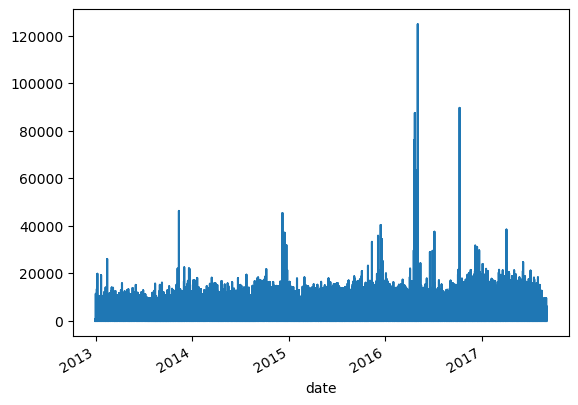

In [174]:
final_df_c['sales'].plot()

In [176]:
prediction2 = reg.predict(test_final)

In [181]:
len(predictions)

28512

In [190]:
ts_prediction = pd.read_csv('ts_tutorial.csv')
ts_prediction.sales.values

array([   4.27403018,    0.        ,    3.49553048, ..., 1273.3165066 ,
         44.94593746,   18.94671519])

In [191]:
lr_compare = pd.DataFrame({'high_lr': predictions,'low_lr': prediction2,'ts_pred':ts_prediction.sales.values})

<AxesSubplot:>

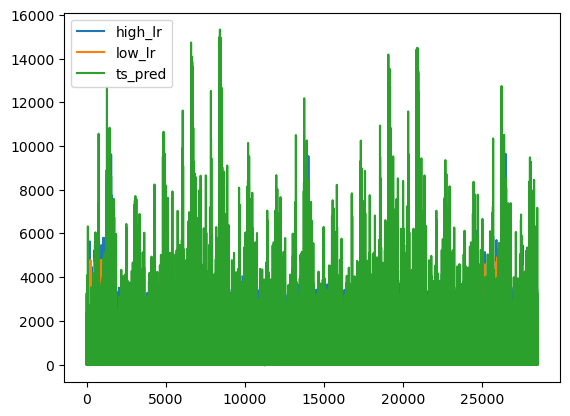

In [192]:
lr_compare.plot()

In [185]:
final_df_c.loc['2017-08-16']

family        sales  onpromotion  transactions  dcoilwtico  \
date                                                                     
2017-08-16    10.0     0.000000            0           0.0        46.8   
2017-08-16     2.0     0.000000            0           0.0        46.8   
2017-08-16     7.0   512.552734            2           0.0        46.8   
2017-08-16    32.0  3268.628174           20           0.0        46.8   
2017-08-16     1.0     0.000000            0           0.0        46.8   
...            ...          ...          ...           ...         ...   
2017-08-16    27.0     2.139577            0           0.0        46.8   
2017-08-16    20.0   260.008667            1           0.0        46.8   
2017-08-16    31.0  3807.816650          158           0.0        46.8   
2017-08-16     6.0   912.720154           14           0.0        46.8   
2017-08-16    18.0     0.000000            0           0.0        46.8   

            cluster  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                          
2017-08-16       13          2        3      8  2017        228          16   
2017-08-16       13          2        3      8  2017        228          16   
2017-08-16       13          2        3      8  2017        228          16   
2017-08-16       13          2        3      8  2017        228          16   
2017-08-16       13          2        3      8  2017        228          16   
...             ...        ...      ...    ...   ...        ...         ...   
2017-08-16        6          2        3      8  2017        228          16   
2017-08-16        6          2        3      8  2017        228          16   
2017-08-16        6          2        3      8  2017        228          16   
2017-08-16        6          2        3      8  2017        228          16   
2017-08-16        6          2        3      8  2017        228          16   

              A    B    C    D    E    lag1    lag2    lag3  
date                                                         
2017-08-16  0.0  0.0  0.0  1.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  0.0  0.0  1.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  0.0  0.0  1.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  0.0  0.0  1.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  0.0  0.0  1.0  0.0  14.934  17.124  15.106  
...         ...  ...  ...  ...  ...     ...     ...     ...  
2017-08-16  0.0  1.0  0.0  0.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  1.0  0.0  0.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  1.0  0.0  0.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  1.0  0.0  0.0  0.0  14.934  17.124  15.106  
2017-08-16  0.0  1.0  0.0  0.0  0.0  14.934  17.124  15.106  

[1782 rows x 20 columns]

In [186]:
for i,v in enumerate(prediction2):
    if v<0:
        prediction2[i] = 0
prediction2

array([  0.     ,   0.     , 487.00305, ..., 816.4694 , 761.13715,
         0.     ], dtype=float32)

In [161]:
test_df = pd.read_csv('test.csv')

In [187]:
submission = pd.DataFrame({'id':test_df.id,'sales':prediction2})
submission.to_csv('sales_prediction3.csv',index=False)

# Second submission

In [223]:
holiday = pd.read_csv('holidays_events.csv') #drop for now
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv') 
transactions = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [224]:
train_df = train.set_index('date')
train_df.index = pd.to_datetime(train_df.index)
train_df = train_df.drop(['id'],axis=1)
train_df.head()

store_nbr      family  sales  onpromotion
date                                                 
2013-01-01          1  AUTOMOTIVE    0.0            0
2013-01-01          1   BABY CARE    0.0            0
2013-01-01          1      BEAUTY    0.0            0
2013-01-01          1   BEVERAGES    0.0            0
2013-01-01          1       BOOKS    0.0            0

In [217]:
y = (
    train_df[['store_nbr','family','sales']]
    .groupby(['family','store_nbr',train.index])
    .mean()
    .unstack(['family','store_nbr'])
).loc['2017']

In [219]:
y.head()

sales                                                  ...  \
family     AUTOMOTIVE                                                  ...   
store_nbr          1     2     3    4    5    6     7    8    9    10  ...   
date                                                                   ...   
2017-01-01        0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   
2017-01-02        5.0   5.0   9.0  9.0  9.0  9.0  12.0  7.0  9.0  4.0  ...   
2017-01-03        4.0  18.0   5.0  4.0  2.0  8.0   4.0  6.0  1.0  3.0  ...   
2017-01-04        1.0   6.0  19.0  7.0  0.0  4.0   7.0  9.0  5.0  6.0  ...   
2017-01-05        2.0   5.0  13.0  1.0  1.0  4.0   8.0  2.0  6.0  2.0  ...   

                                                                               \
family      SEAFOOD                                                             
store_nbr        45      46       47      48          49      50      51   52   
date                                                                            
2017-01-01    0.000   0.000    0.000   0.000    0.000000   0.000   0.000  0.0   
2017-01-02  207.675  62.099  138.052  34.000  146.666000  47.143  63.609  0.0   
2017-01-03  108.748  64.618  115.461  11.572  113.707000  47.144  56.899  0.0   
2017-01-04   64.858  39.744  118.191   8.000   50.874000  19.890  51.811  0.0   
2017-01-05   84.293  44.857   74.856  31.143   86.923004  10.000  35.362  0.0   

                       
family                 
store_nbr     53   54  
date                   
2017-01-01   0.0  0.0  
2017-01-02  16.0  8.0  
2017-01-03   6.0  1.0  
2017-01-04   8.0  2.0  
2017-01-05   5.0  0.0  

[5 rows x 1782 columns]

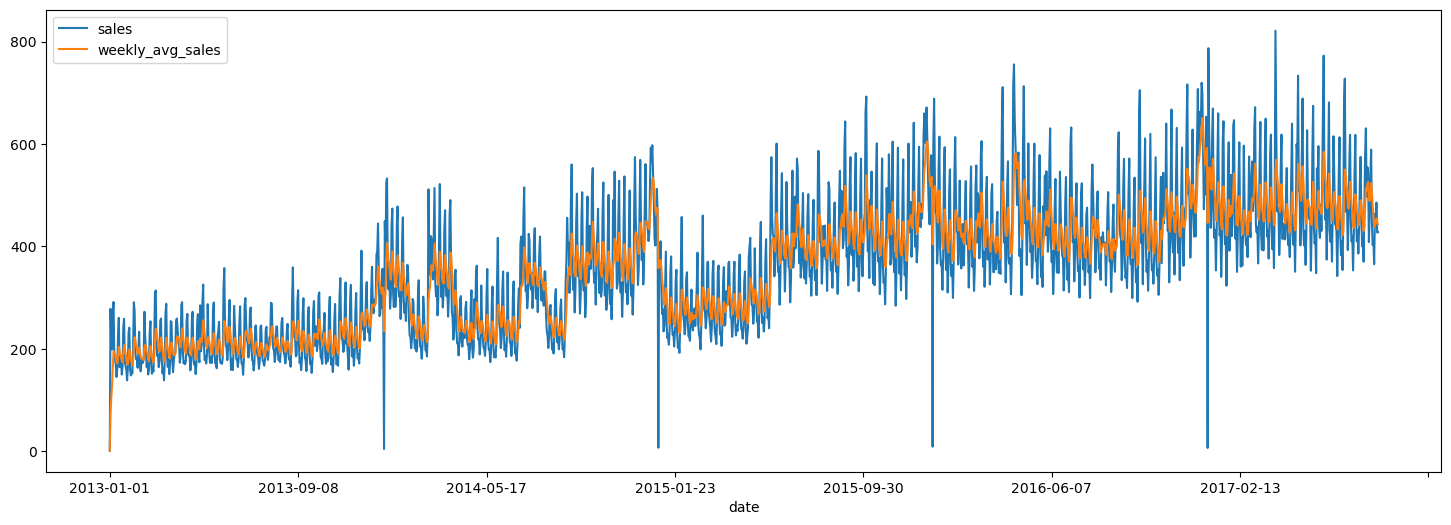

In [227]:
avg_sales = train.groupby('date').agg({'sales': 'mean'}).reset_index()
avg_sales['weekly_avg_sales'] = avg_sales['sales'].ewm(span=7, adjust=False).mean()
ax1 = avg_sales.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))

<AxesSubplot:>

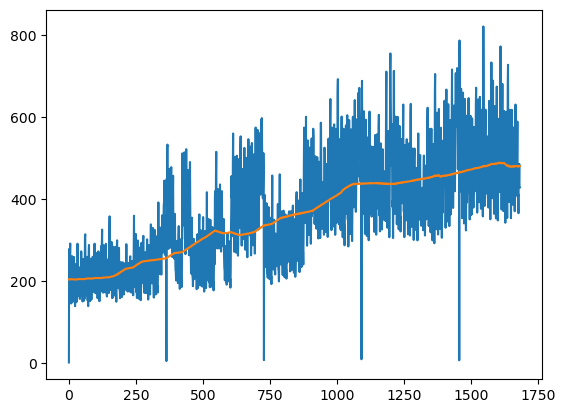

In [235]:
ma365 = avg_sales['sales'].rolling(
    window=365,
    center=True,
    min_periods=183,
    
).mean()
fig,ax = plt.subplots()
avg_sales['sales'].plot(ax=ax)
ma365.plot(ax=ax)

In [241]:
avg_sales

date       sales  weekly_avg_sales
0     2013-01-01    1.409438          1.409438
1     2013-01-02  278.390807         70.654780
2     2013-01-03  202.840197        103.701135
3     2013-01-04  198.911154        127.503640
4     2013-01-05  267.873244        162.596041
...          ...         ...               ...
1679  2017-08-11  463.733851        444.559453
1680  2017-08-12  444.798280        444.619160
1681  2017-08-13  485.768618        454.906525
1682  2017-08-14  427.004717        447.931073
1683  2017-08-15  427.980884        442.943526

[1684 rows x 3 columns]

In [245]:
avg_sales = train.groupby('date').agg({'sales': 'mean'}).reset_index()
avg_sales['Time'] = np.arange(len(avg_sales.index))
avg_sales.head()

date       sales  Time
0  2013-01-01    1.409438     0
1  2013-01-02  278.390807     1
2  2013-01-03  202.840197     2
3  2013-01-04  198.911154     3
4  2013-01-05  267.873244     4

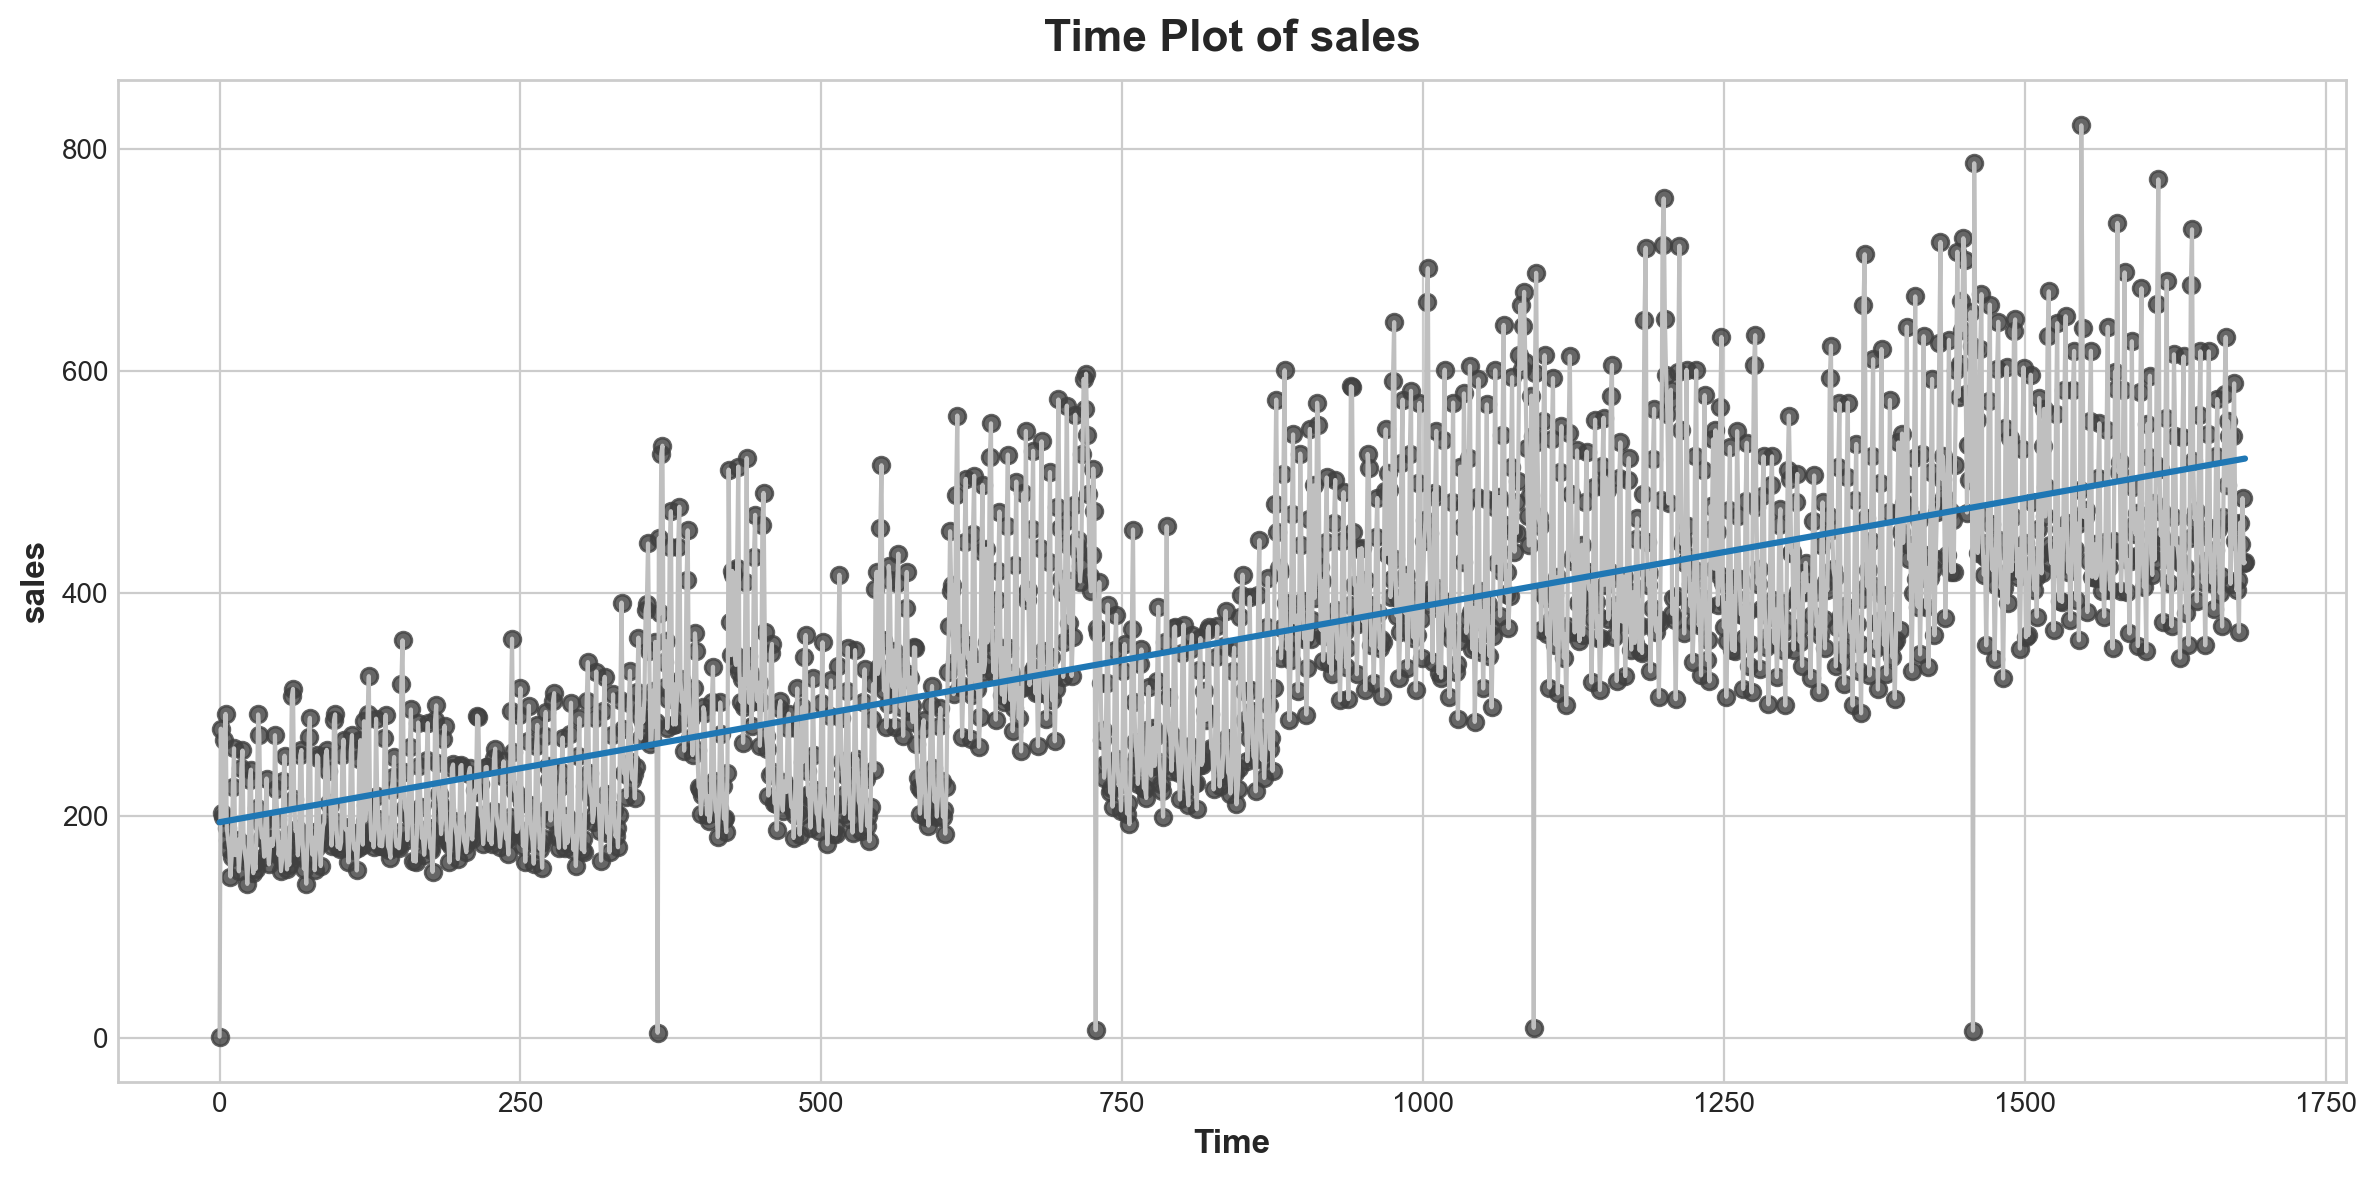

In [246]:
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(12, 6),
    titlesize=18,
    titleweight='bold',
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

# Use it for the Lag_1 plot later.
plot_params = dict(
    color = '0.75',
    style = ".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina' # You can remove

fig, ax = plt.subplots()
ax.plot('Time', 'sales', data=avg_sales, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=avg_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of sales');

In [306]:
trend_lc

array([  1.40943827, 139.9001226 , 240.61550198, ..., 465.28344909,
       456.38666766, 427.00471722])

In [336]:
from wotan import flatten
flatten_lc, trend_lc = flatten(avg_sales.Time.values, 
                               avg_sales.sales.values,
                               window_length=500, 
                               return_trend=True,
                               method='biweight',
                               robust=True,
                               ) 

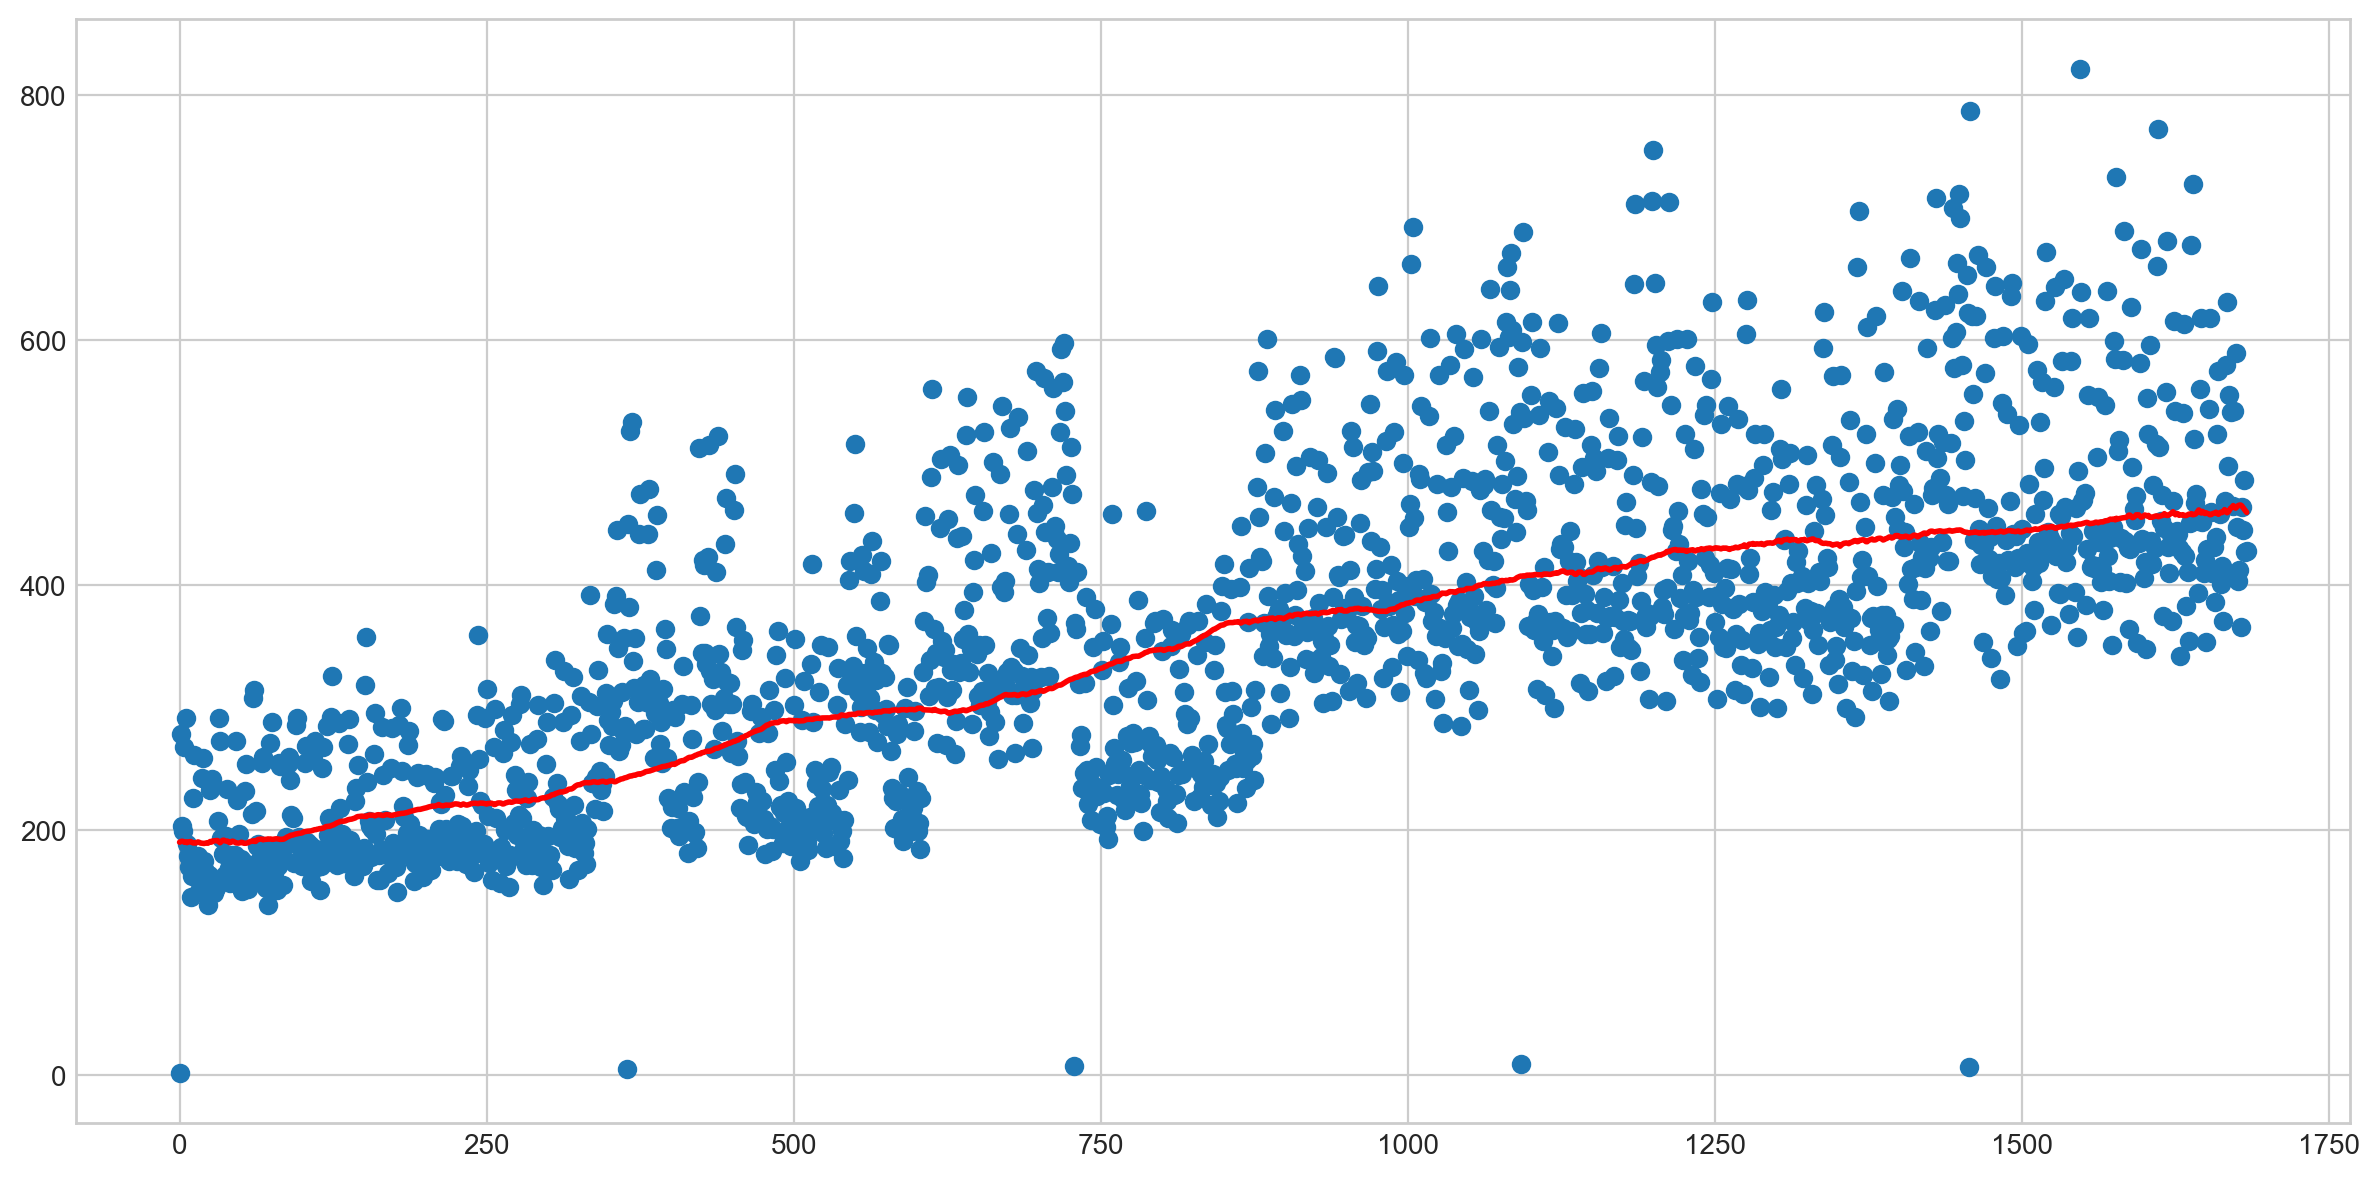

In [337]:
plt.scatter(avg_sales.Time,avg_sales.sales)
plt.plot(avg_sales.Time, trend_lc, linewidth=2, color='red')

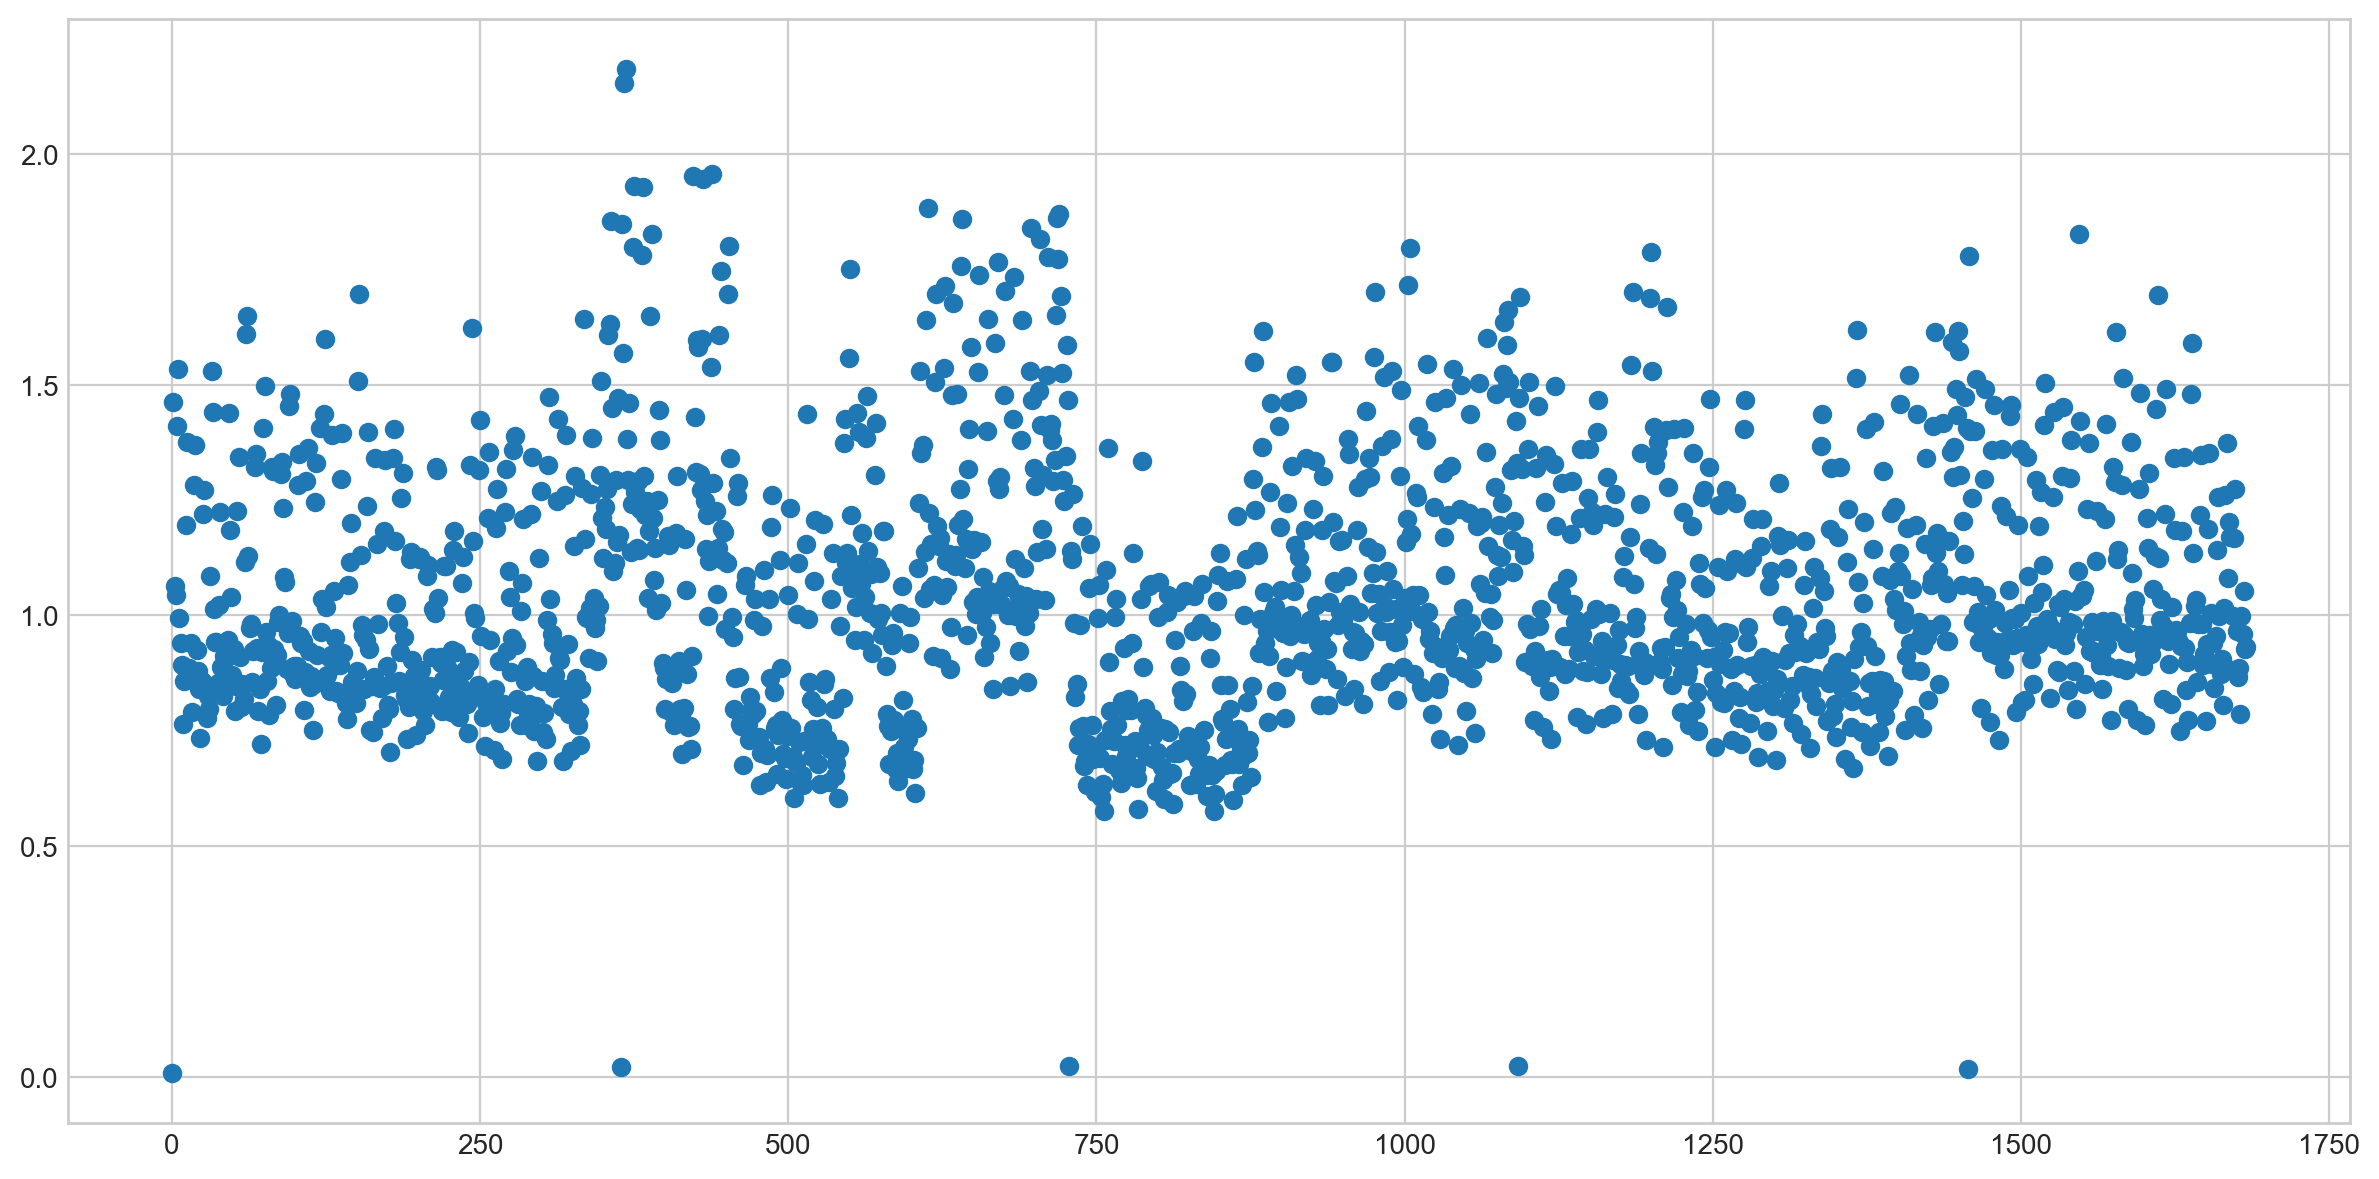

In [338]:
plt.scatter(avg_sales.Time,flatten_lc)

In [220]:
from statsmodels.tsa.deterministic import DeterministicProcess

#Create a dummy feature
dp = DeterministicProcess(
    index=y.index,  
    constant=True,     
    order=1,             
    drop=True,        
)
X = dp.in_sample()

In [258]:
import numpy as np
points = 1000
time = np.linspace(0, 15, points)
flux = 1 + ((np.sin(time) +  + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise
for i in range(points):  
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[400:500] = np.nan  # a data gap

In [265]:
len(avg_sales.sales)

1684

In [371]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


In [339]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [354]:
avg_sales1 = avg_sales.set_index('date')
avg_sales1.index = pd.to_datetime(avg_sales1.index)
avg_sales1['day'] = avg_sales1.index.day
avg_sales1['year'] = avg_sales1.index.year
avg_sales1['week'] = avg_sales1.index.week
avg_sales1['dayofweek'] = avg_sales1.index.dayofweek
avg_sales1['month'] = avg_sales1.index.month

In [362]:
avg_sales

date       sales  Time
0     2013-01-01    1.409438     0
1     2013-01-02  278.390807     1
2     2013-01-03  202.840197     2
3     2013-01-04  198.911154     3
4     2013-01-05  267.873244     4
...          ...         ...   ...
1679  2017-08-11  463.733851  1679
1680  2017-08-12  444.798280  1680
1681  2017-08-13  485.768618  1681
1682  2017-08-14  427.004717  1682
1683  2017-08-15  427.980884  1683

[1684 rows x 3 columns]

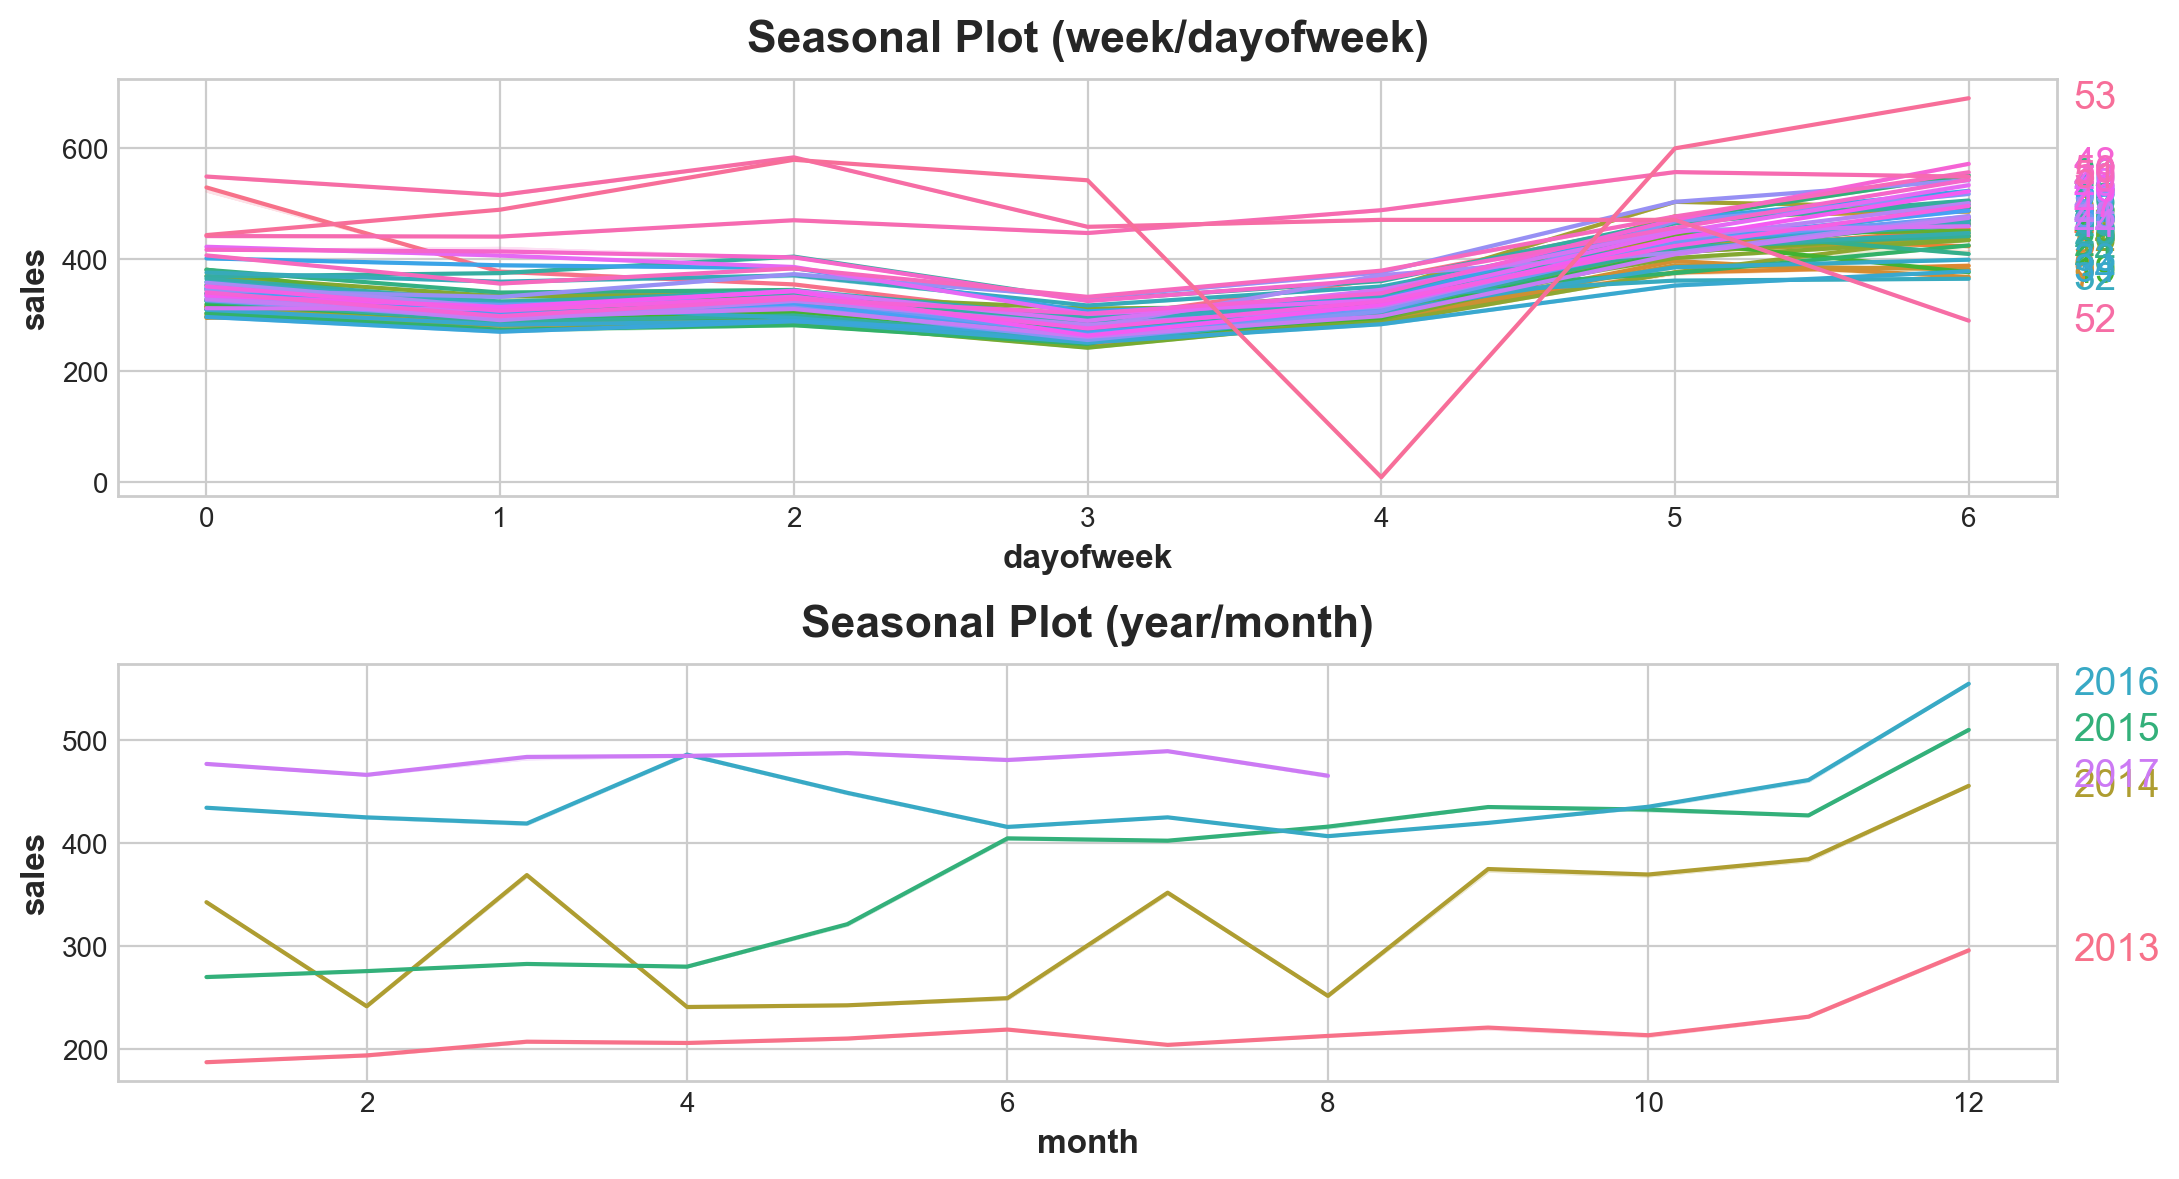

In [358]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(avg_sales1, y="sales", period="week", freq="dayofweek", ax=ax0)
seasonal_plot(avg_sales1, y="sales", period="year", freq="month", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

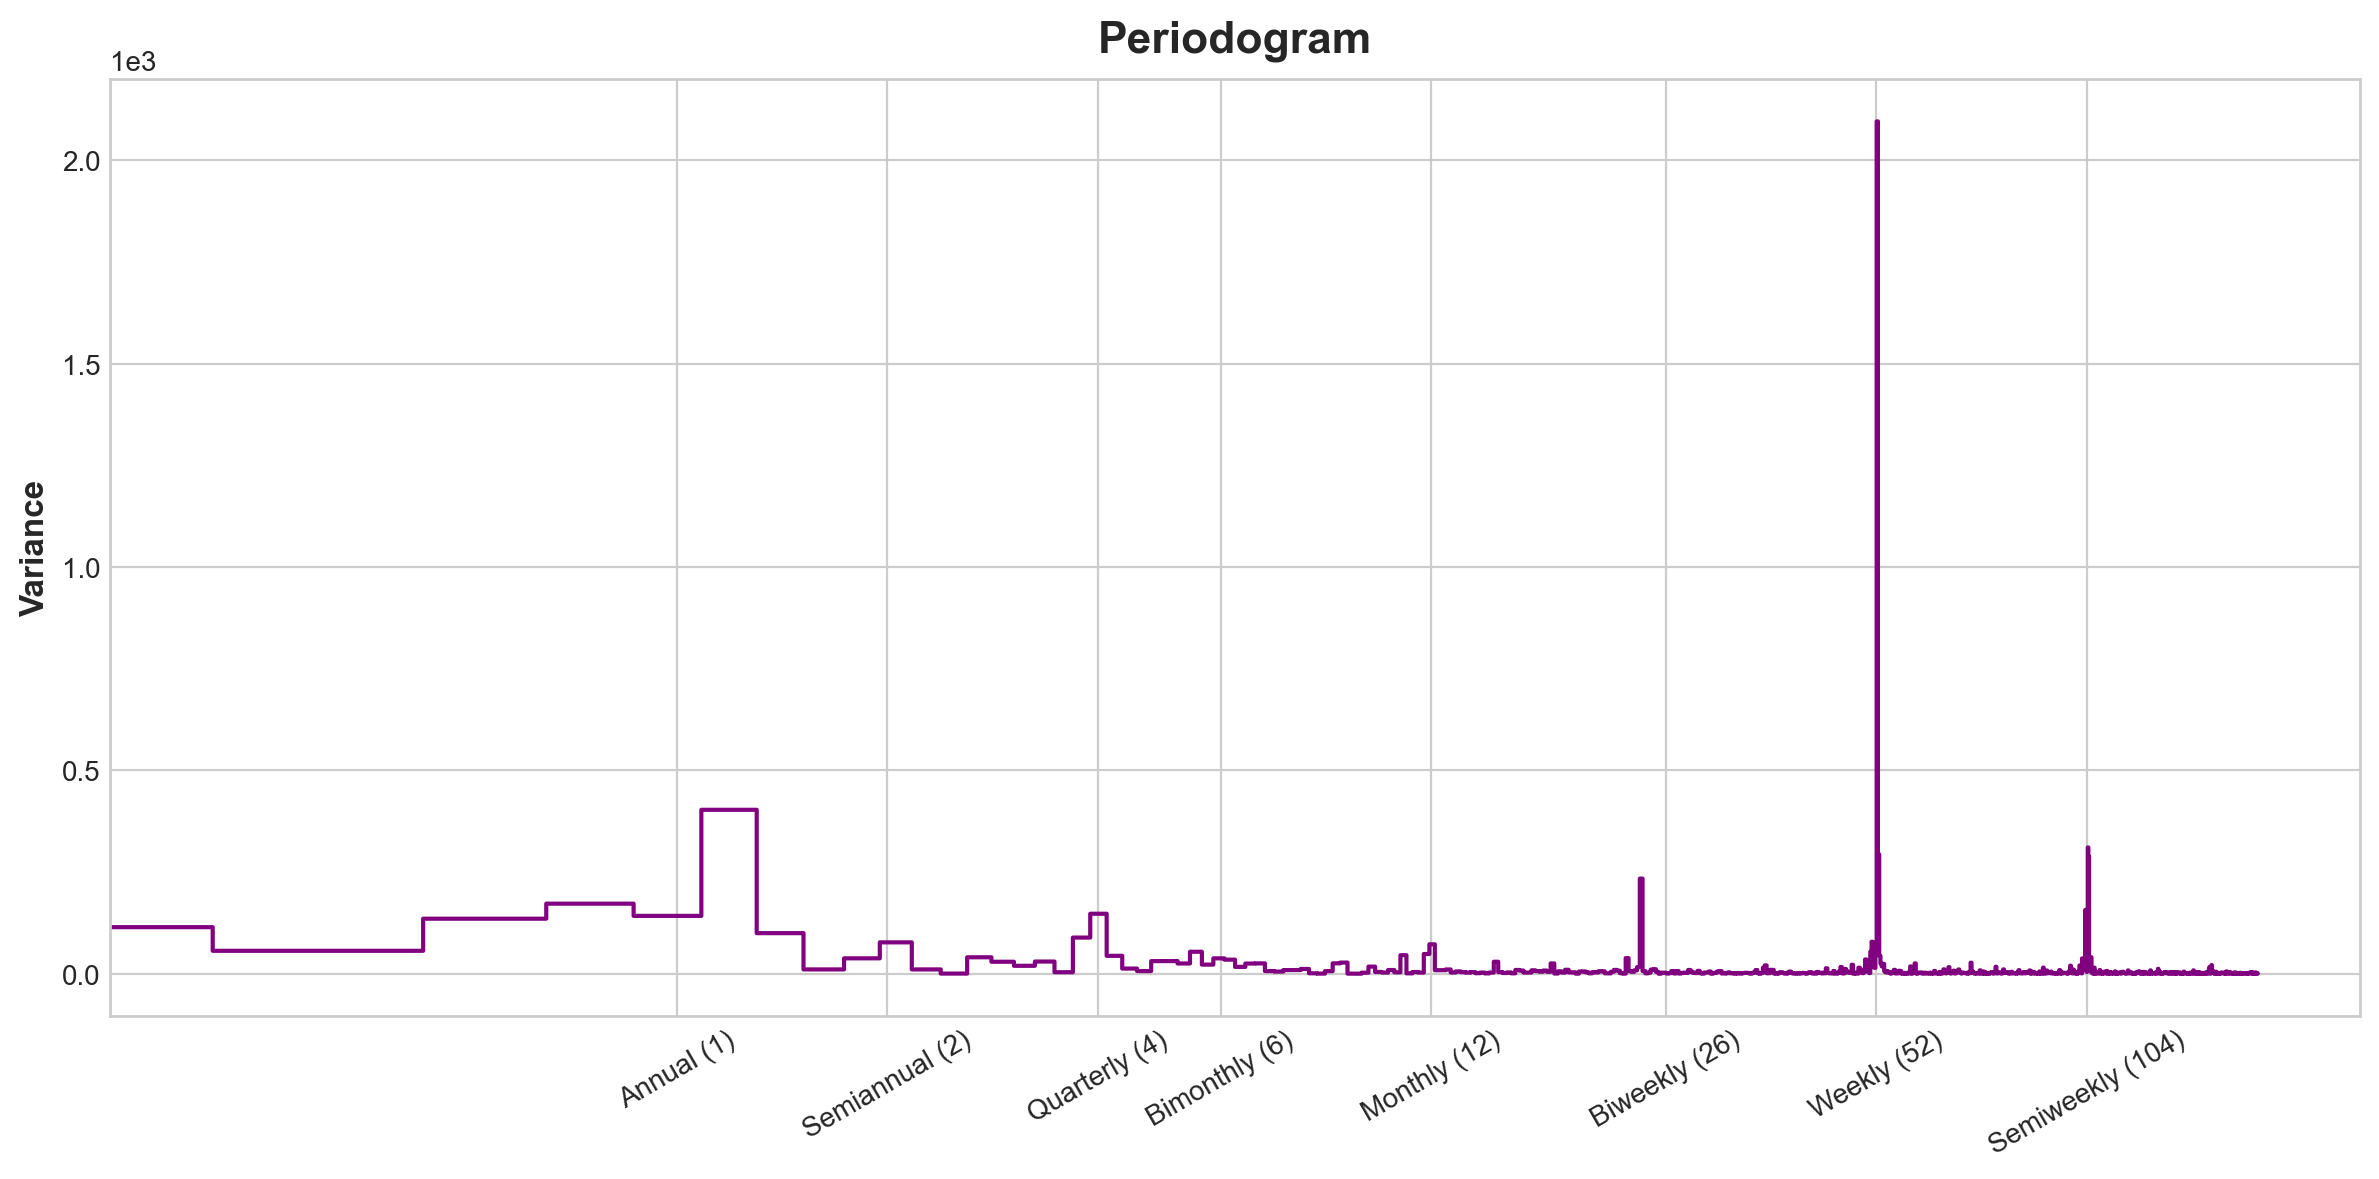

In [359]:
plot_periodogram(avg_sales.sales)

In [369]:
X

const   trend  sin(1,freq=A-DEC)  cos(1,freq=A-DEC)  \
date                                                              
2013-01-01    1.0     1.0           0.000000           1.000000   
2013-01-02    1.0     2.0           0.017213           0.999852   
2013-01-03    1.0     3.0           0.034422           0.999407   
2013-01-04    1.0     4.0           0.051620           0.998667   
2013-01-05    1.0     5.0           0.068802           0.997630   
...           ...     ...                ...                ...   
2017-08-11    1.0  1680.0          -0.628763          -0.777597   
2017-08-12    1.0  1681.0          -0.642055          -0.766659   
2017-08-13    1.0  1682.0          -0.655156          -0.755493   
2017-08-14    1.0  1683.0          -0.668064          -0.744104   
2017-08-15    1.0  1684.0          -0.680773          -0.732494   

            sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  sin(3,freq=A-DEC)  \
date                                                                  
2013-01-01           0.000000           1.000000           0.000000   
2013-01-02           0.034422           0.999407           0.051620   
2013-01-03           0.068802           0.997630           0.103102   
2013-01-04           0.103102           0.994671           0.154309   
2013-01-05           0.137279           0.990532           0.205104   
...                       ...                ...                ...   
2017-08-11           0.977848           0.209315          -0.891981   
2017-08-12           0.984474           0.175531          -0.867456   
2017-08-13           0.989932           0.141540          -0.840618   
2017-08-14           0.994218           0.107381          -0.811539   
2017-08-15           0.997325           0.073095          -0.780296   

            cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  cos(4,freq=A-DEC)  ...  \
date                                                                 ...   
2013-01-01           1.000000           0.000000           1.000000  ...   
2013-01-02           0.998667           0.068802           0.997630  ...   
2013-01-03           0.994671           0.137279           0.990532  ...   
2013-01-04           0.988023           0.205104           0.978740  ...   
2013-01-05           0.978740           0.271958           0.962309  ...   
...                       ...                ...                ...  ...   
2017-08-11           0.452072           0.409356          -0.912375  ...   
2017-08-12           0.497513           0.345612          -0.938377  ...   
2017-08-13           0.541628           0.280231          -0.959933  ...   
2017-08-14           0.584298           0.213521          -0.976938  ...   
2017-08-15           0.625411           0.145799          -0.989314  ...   

            sin(6,freq=A-DEC)  cos(6,freq=A-DEC)  sin(7,freq=A-DEC)  \
date                                                                  
2013-01-01           0.000000           1.000000           0.000000   
2013-01-02           0.103102           0.994671           0.120208   
2013-01-03           0.205104           0.978740           0.238673   
2013-01-04           0.304921           0.952378           0.353676   
2013-01-05           0.401488           0.915864           0.463550   
...                       ...                ...                ...   
2017-08-11          -0.806480          -0.591261           0.998880   
2017-08-12          -0.863142          -0.504961           0.985948   
2017-08-13          -0.910605          -0.413279           0.958718   
2017-08-14          -0.948362          -0.317191           0.917584   
2017-08-15          -0.976011          -0.217723           0.863142   

            cos(7,freq=A-DEC)  sin(8,freq=A-DEC)  cos(8,freq=A-DEC)  \
date                                                                  
2013-01-01           1.000000           0.000000           1.000000   
2013-01-02           0.992749           0.137279           0.990532   
2013-01-03         

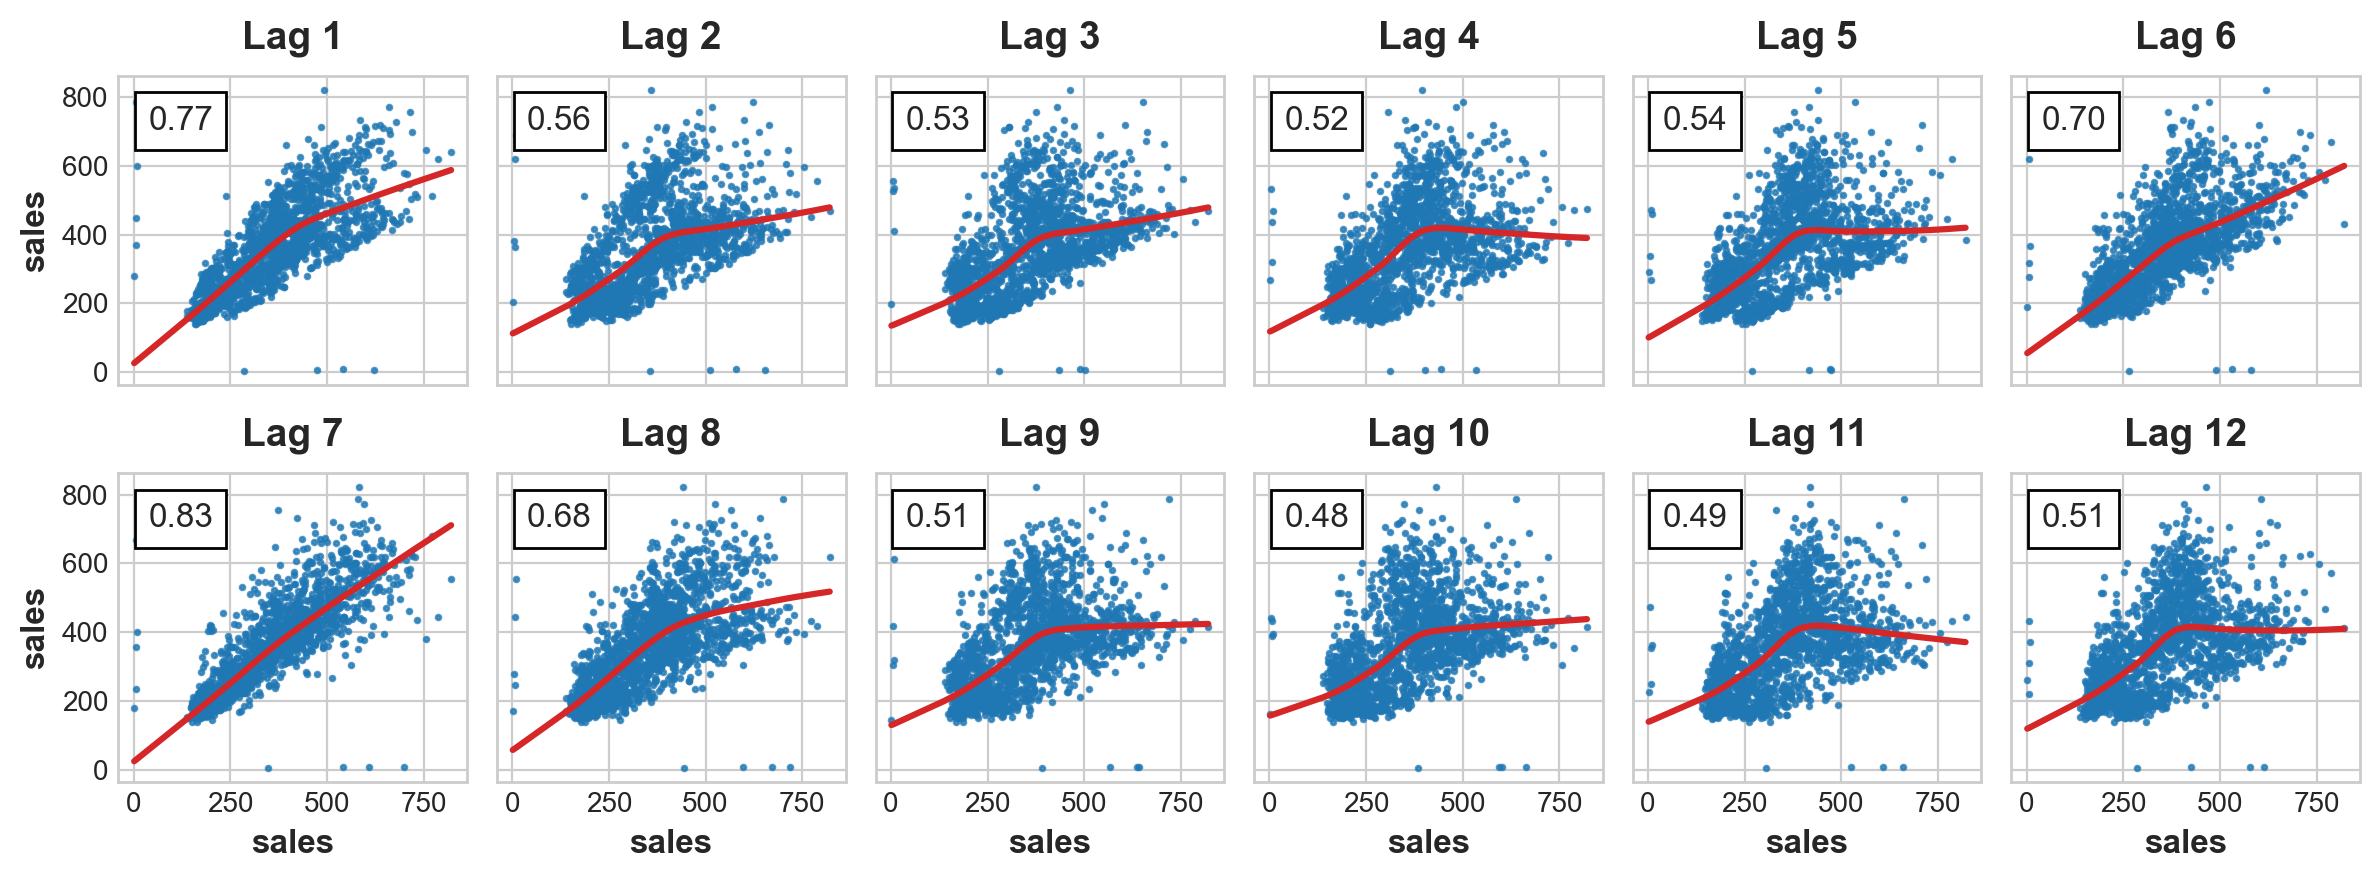

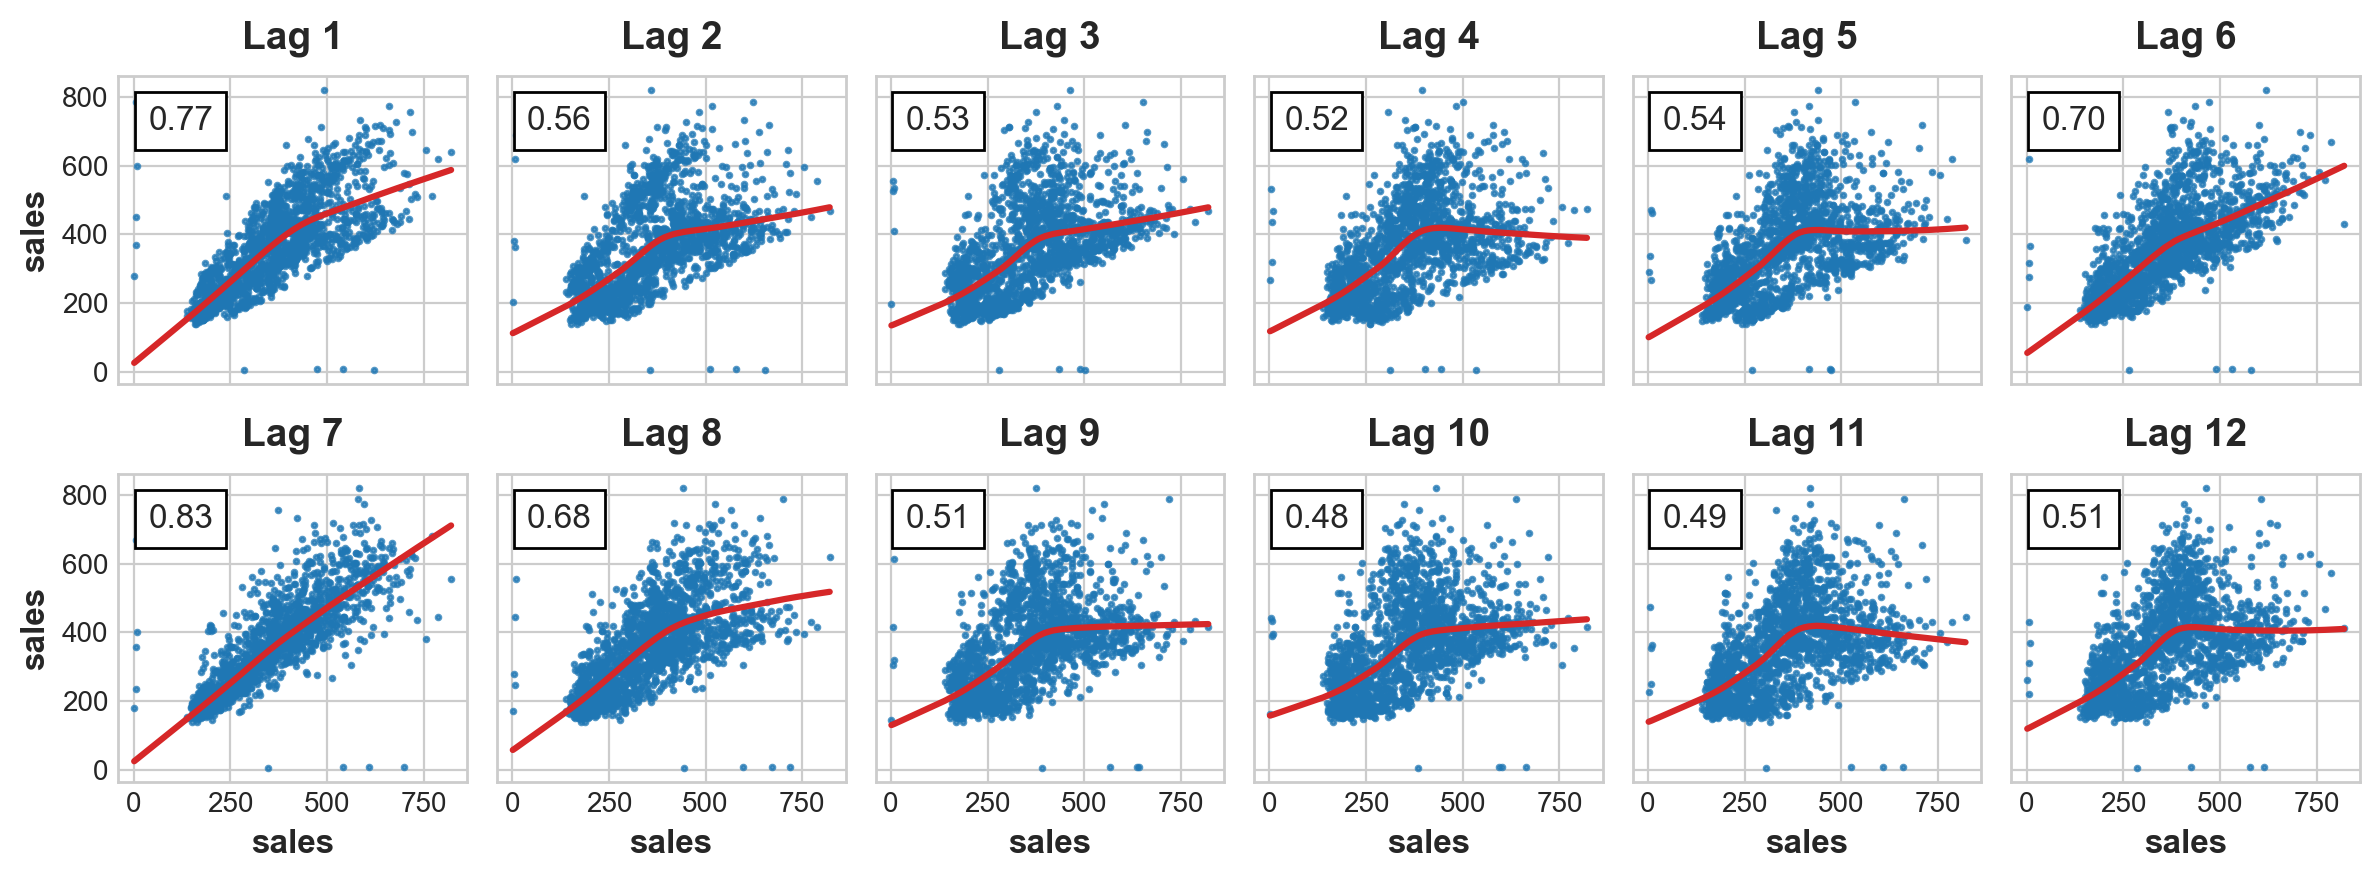

In [374]:
plot_lags(avg_sales1.sales, lags=12, nrows=2)

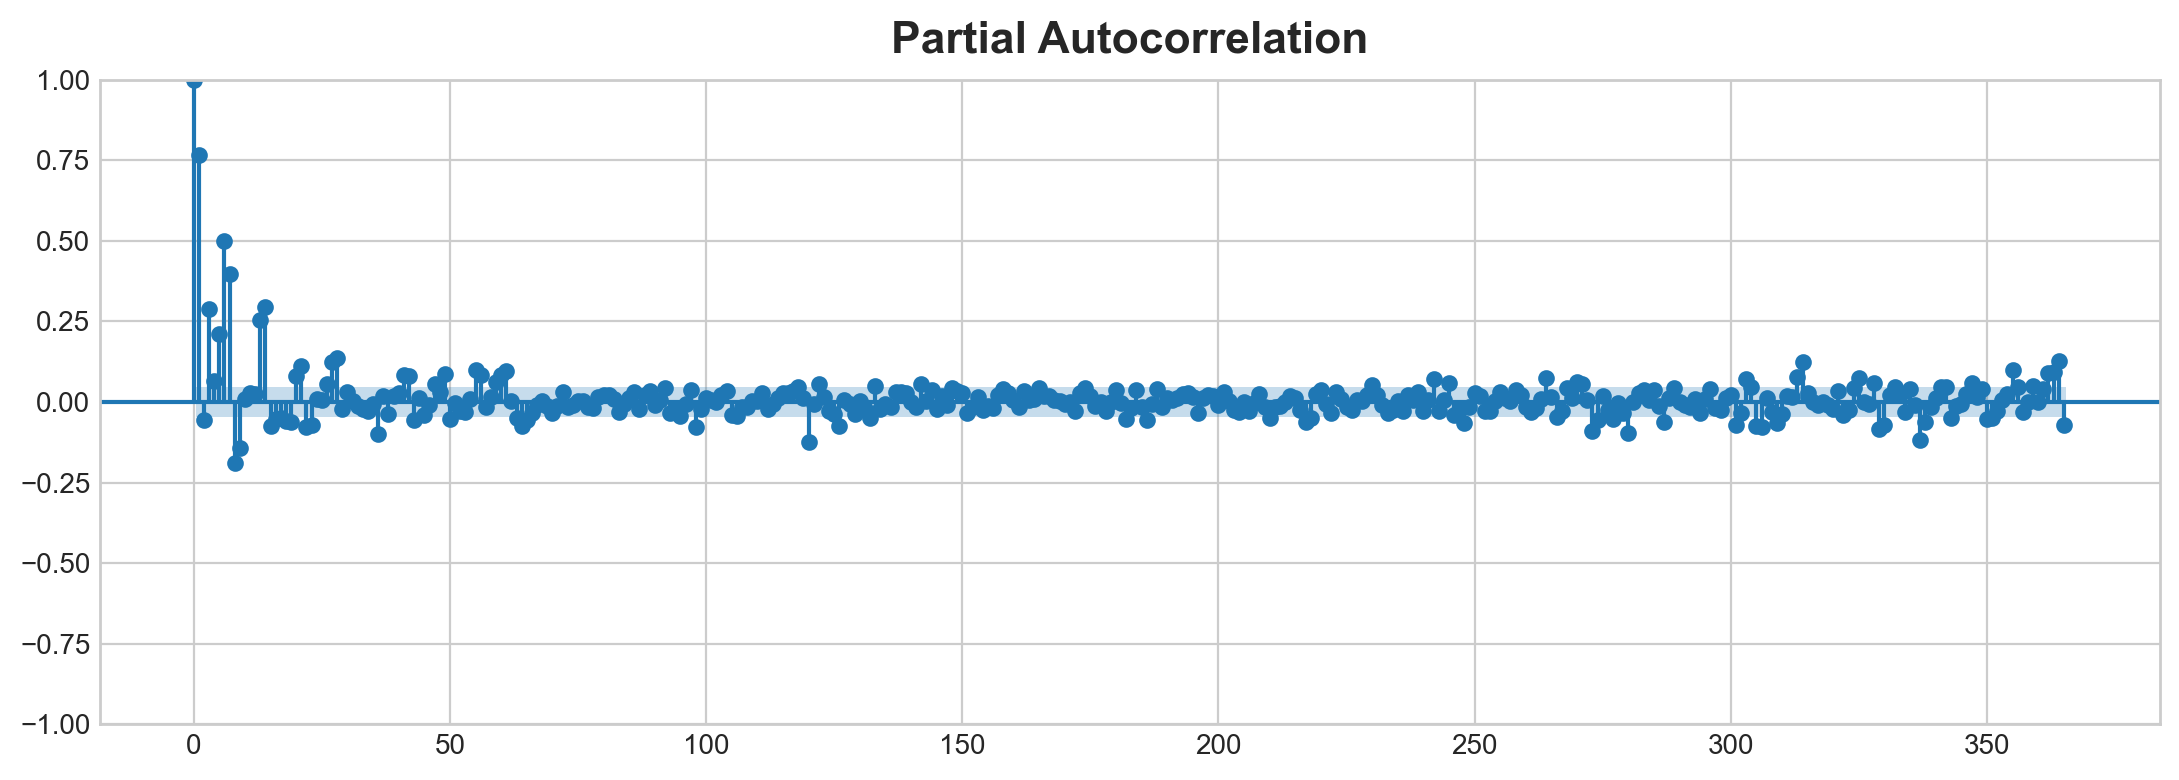

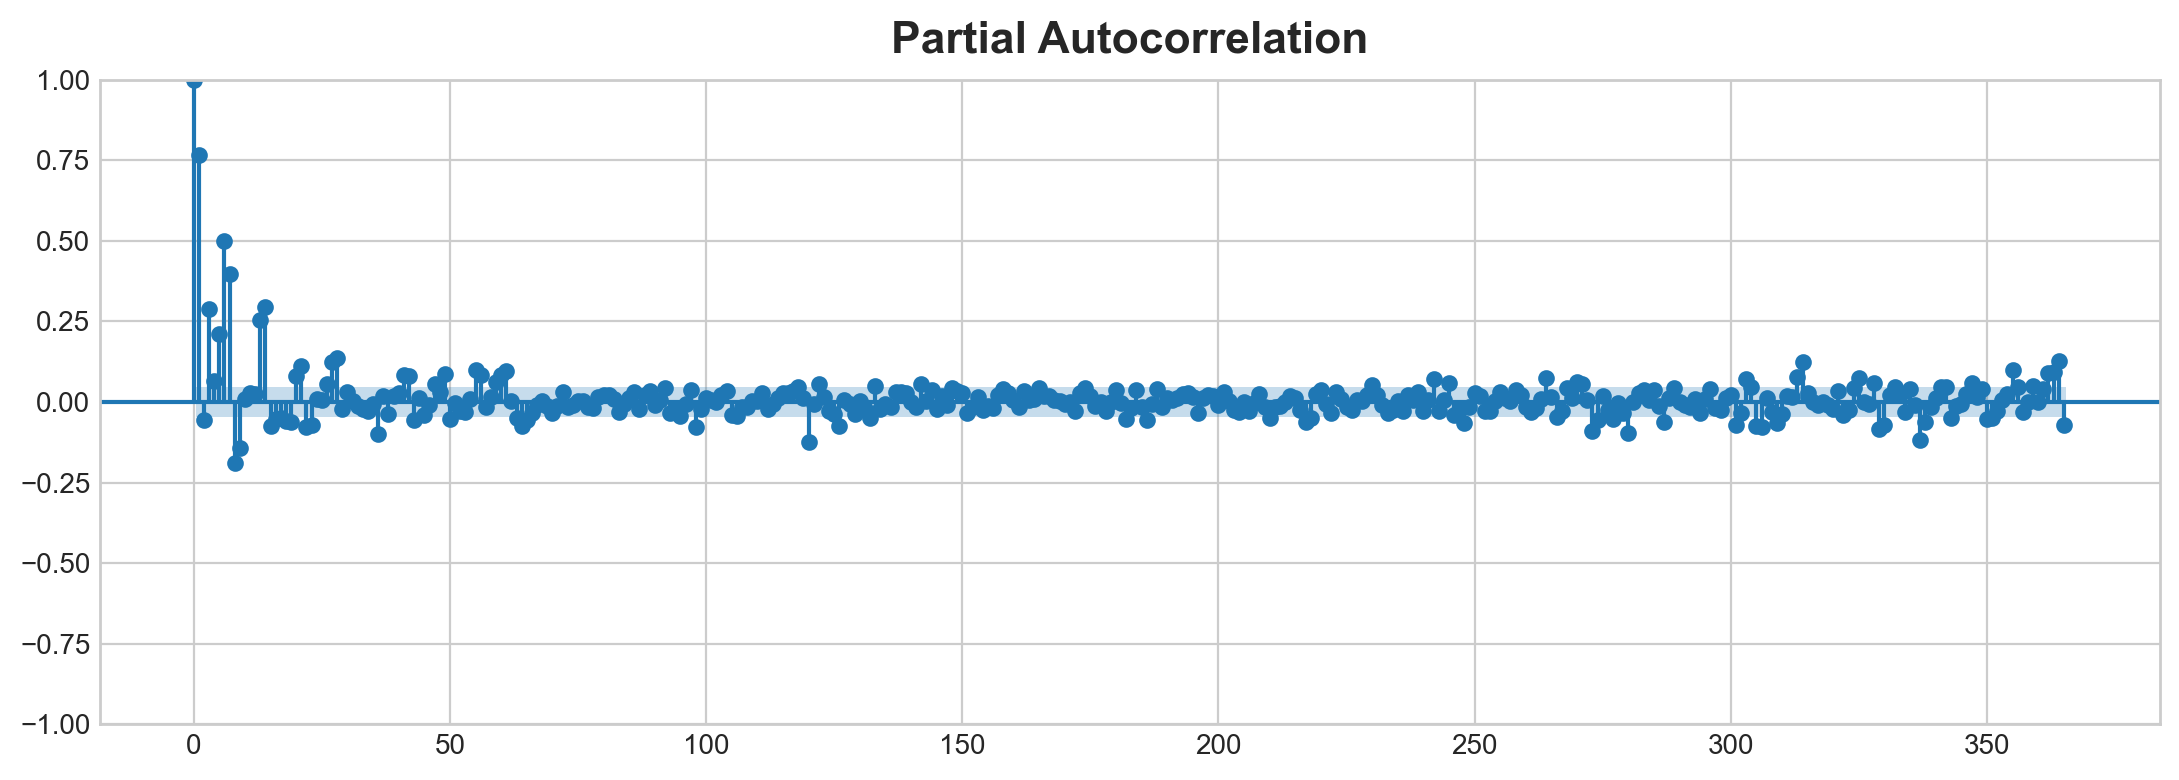

In [380]:
plot_pacf(avg_sales1.sales, lags=365)

In [390]:
X2017 = X.loc['2017']

In [389]:
y2017 = avg_sales1.loc['2017']

<AxesSubplot:xlabel='date'>

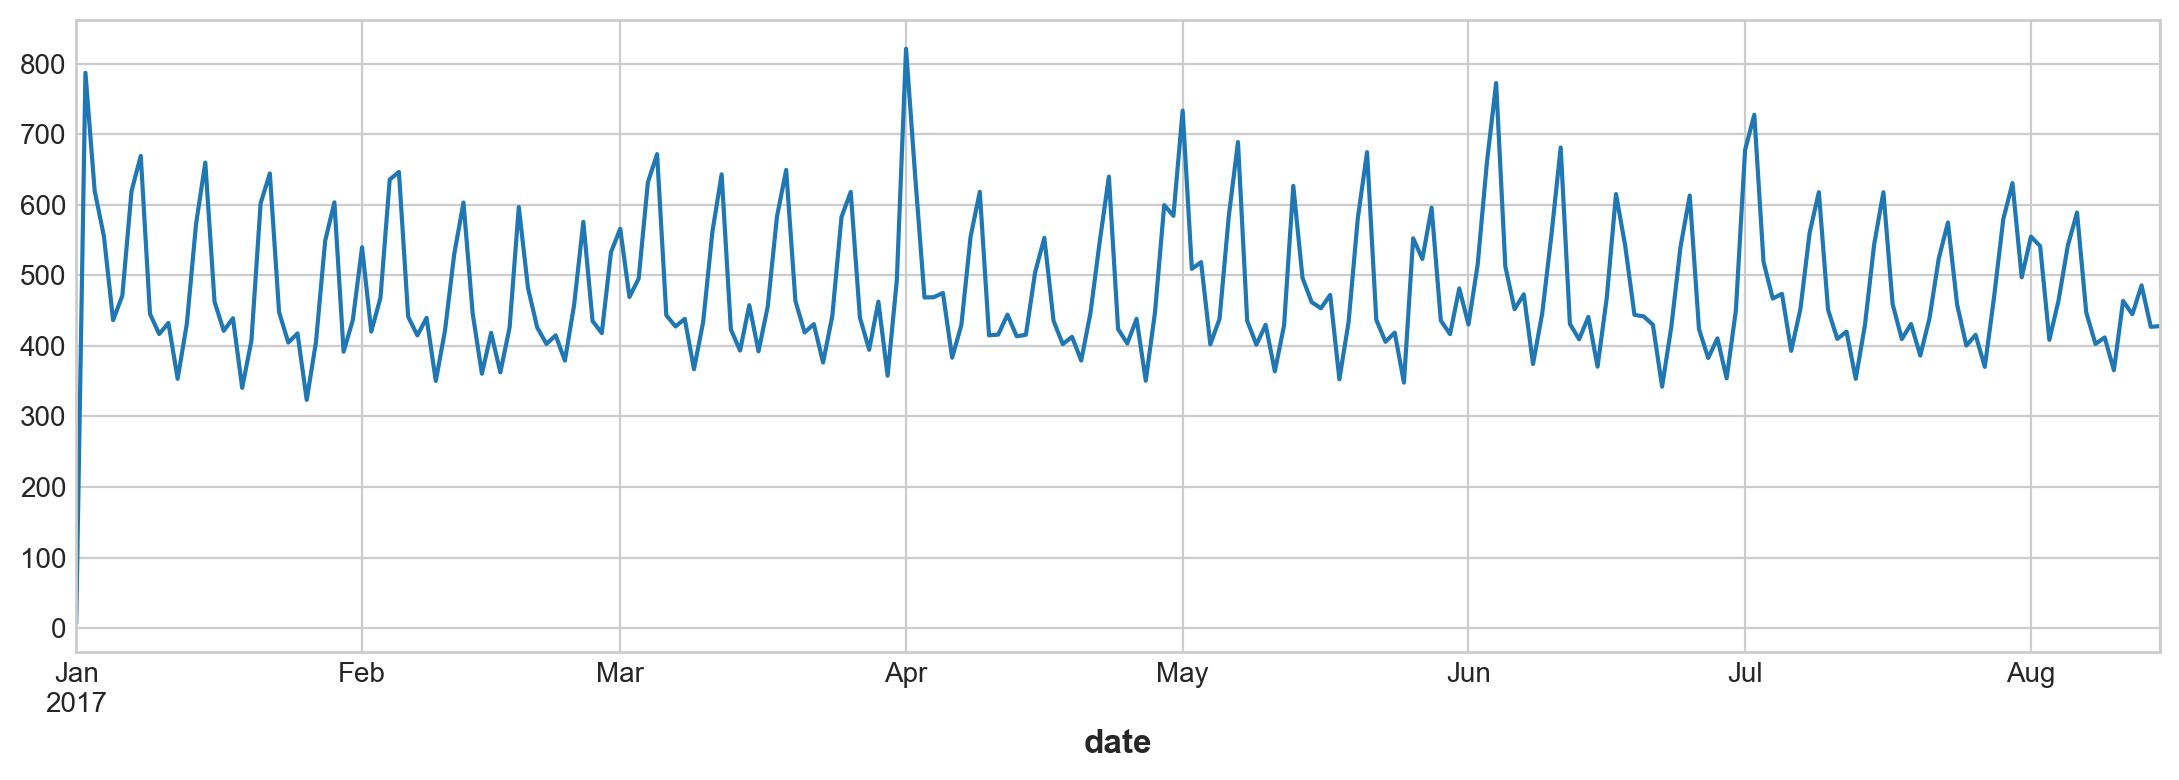

In [388]:
y2017.sales.plot()

In [391]:
from sklearn.linear_model import LinearRegression

# Training data
X = X2017
y = y2017.sales  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

<AxesSubplot:xlabel='date'>

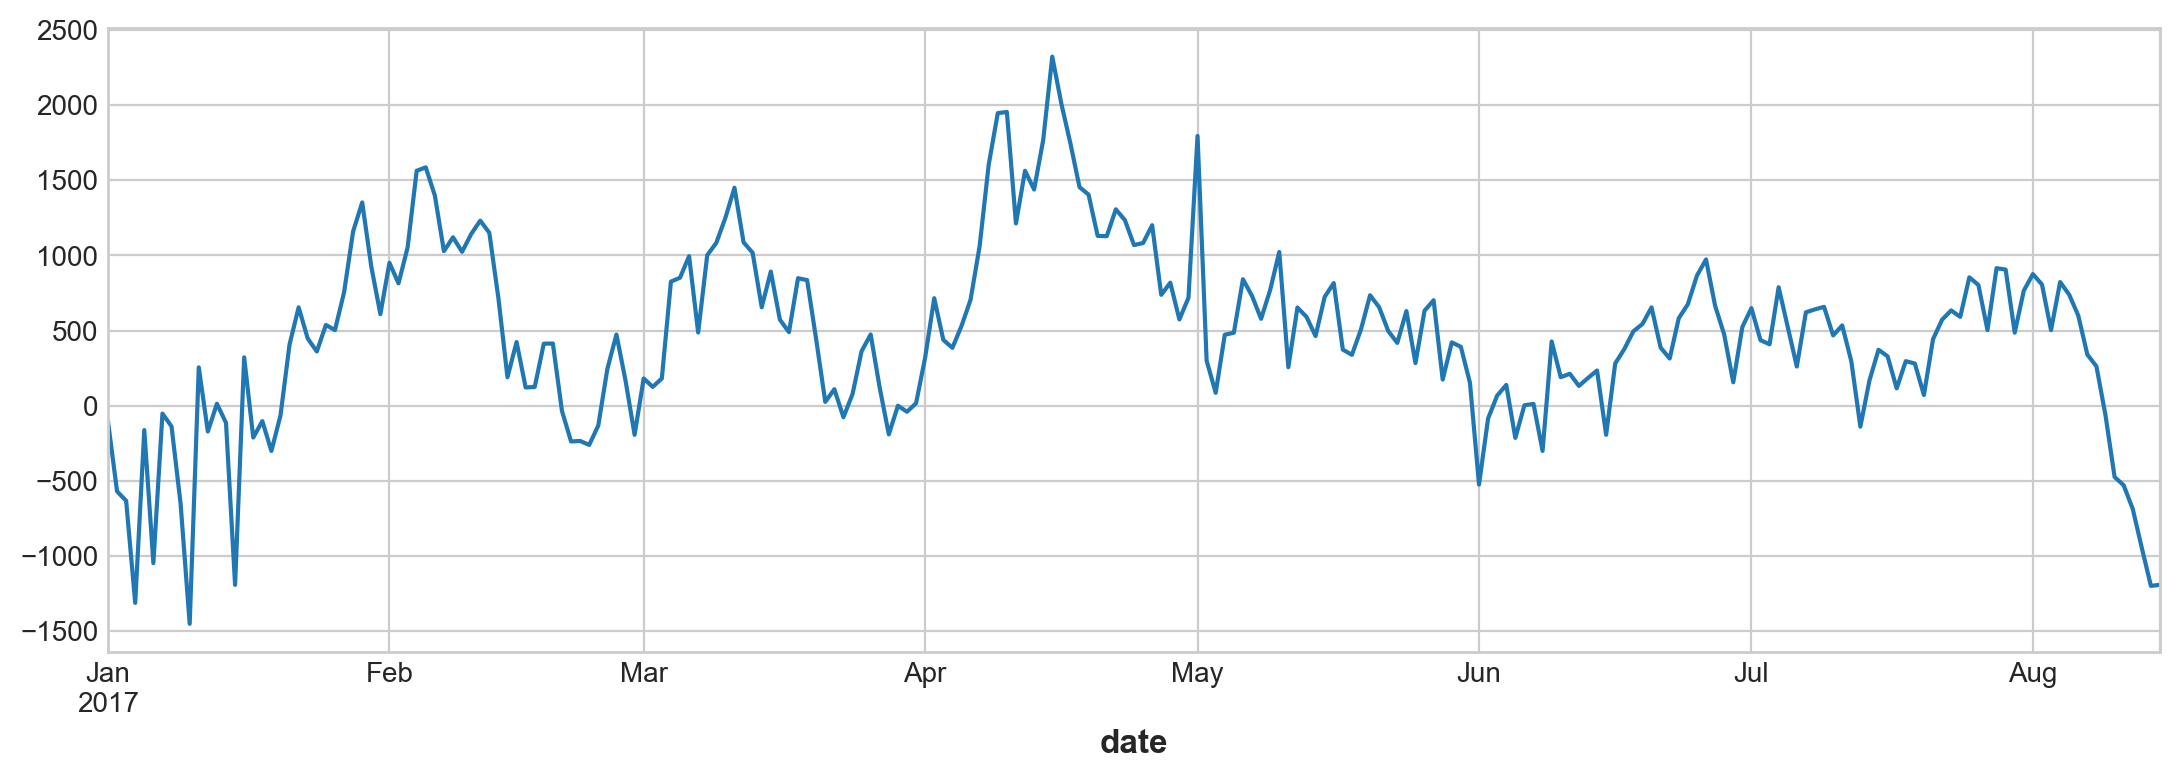

In [392]:
y_pred.plot()

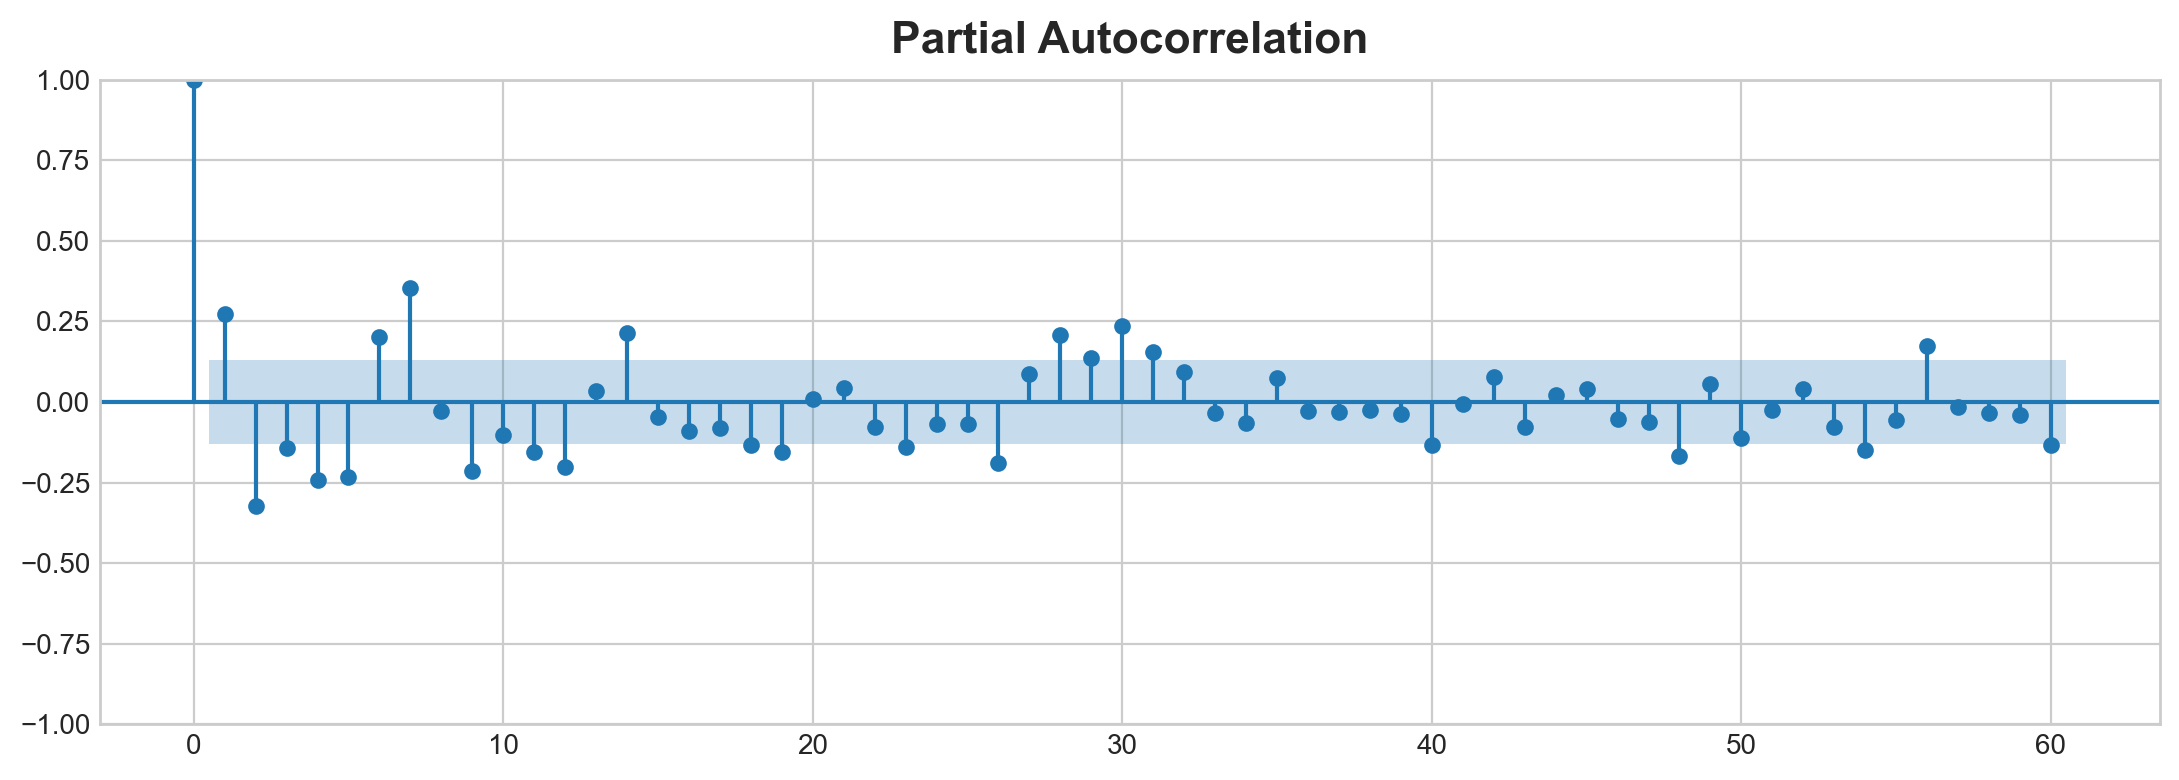

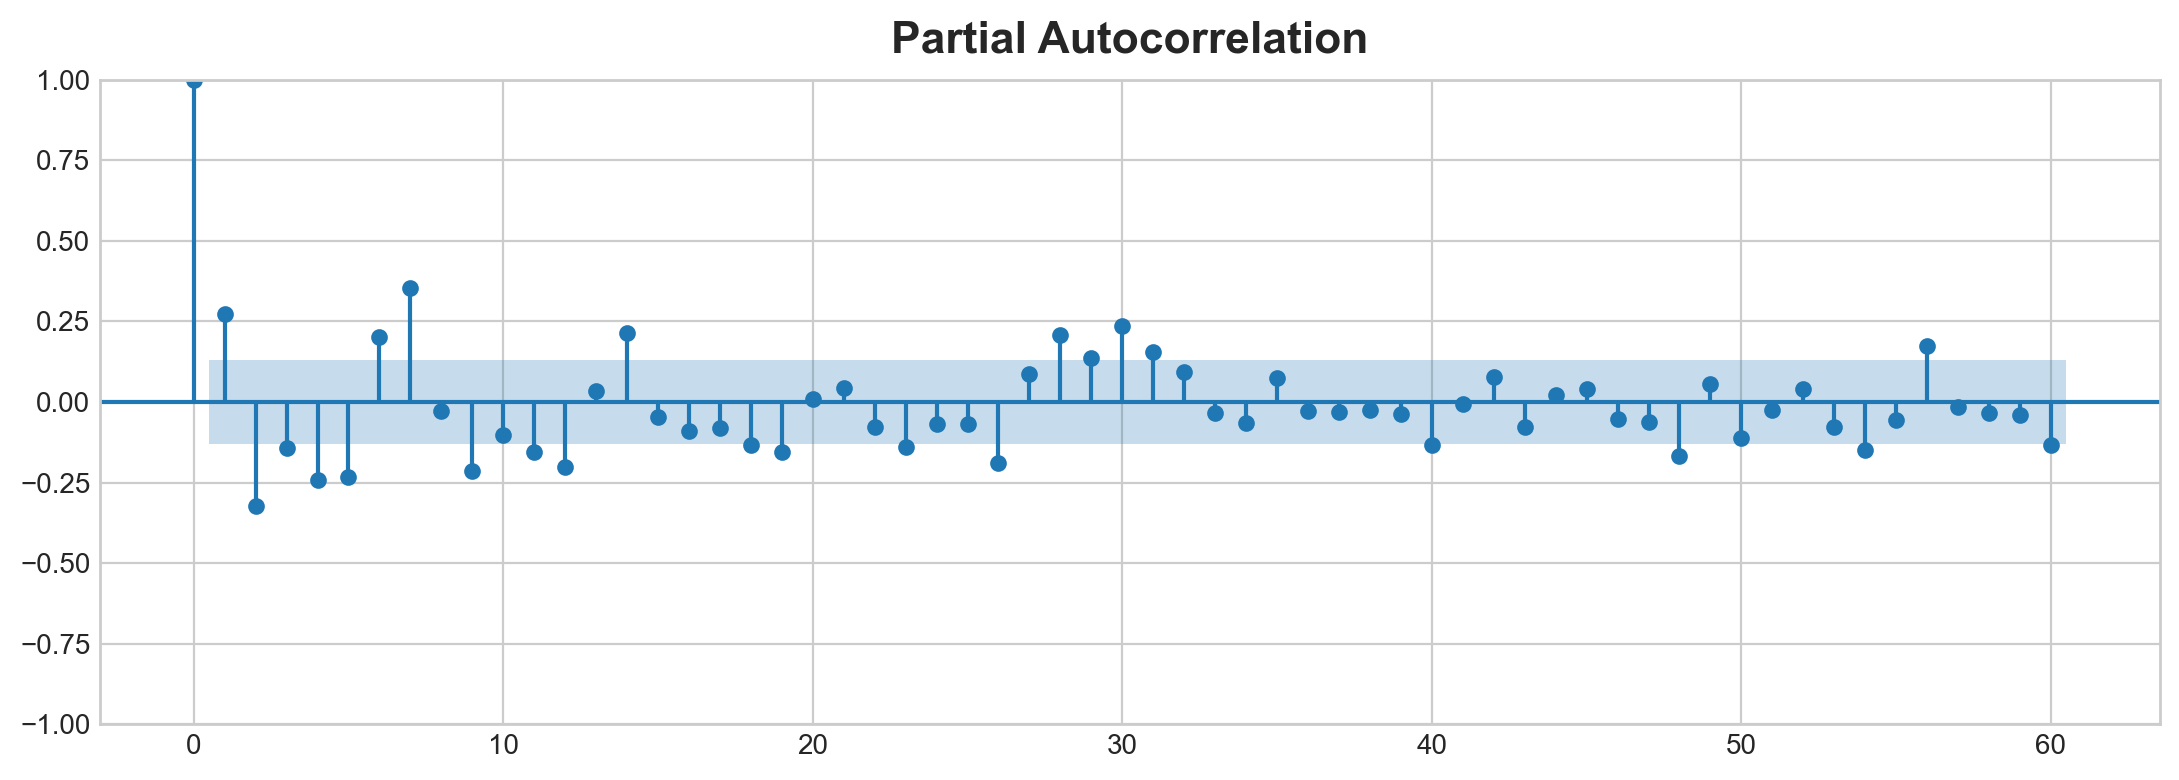

In [598]:
plot_pacf(y2017.sales, lags=60) 

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

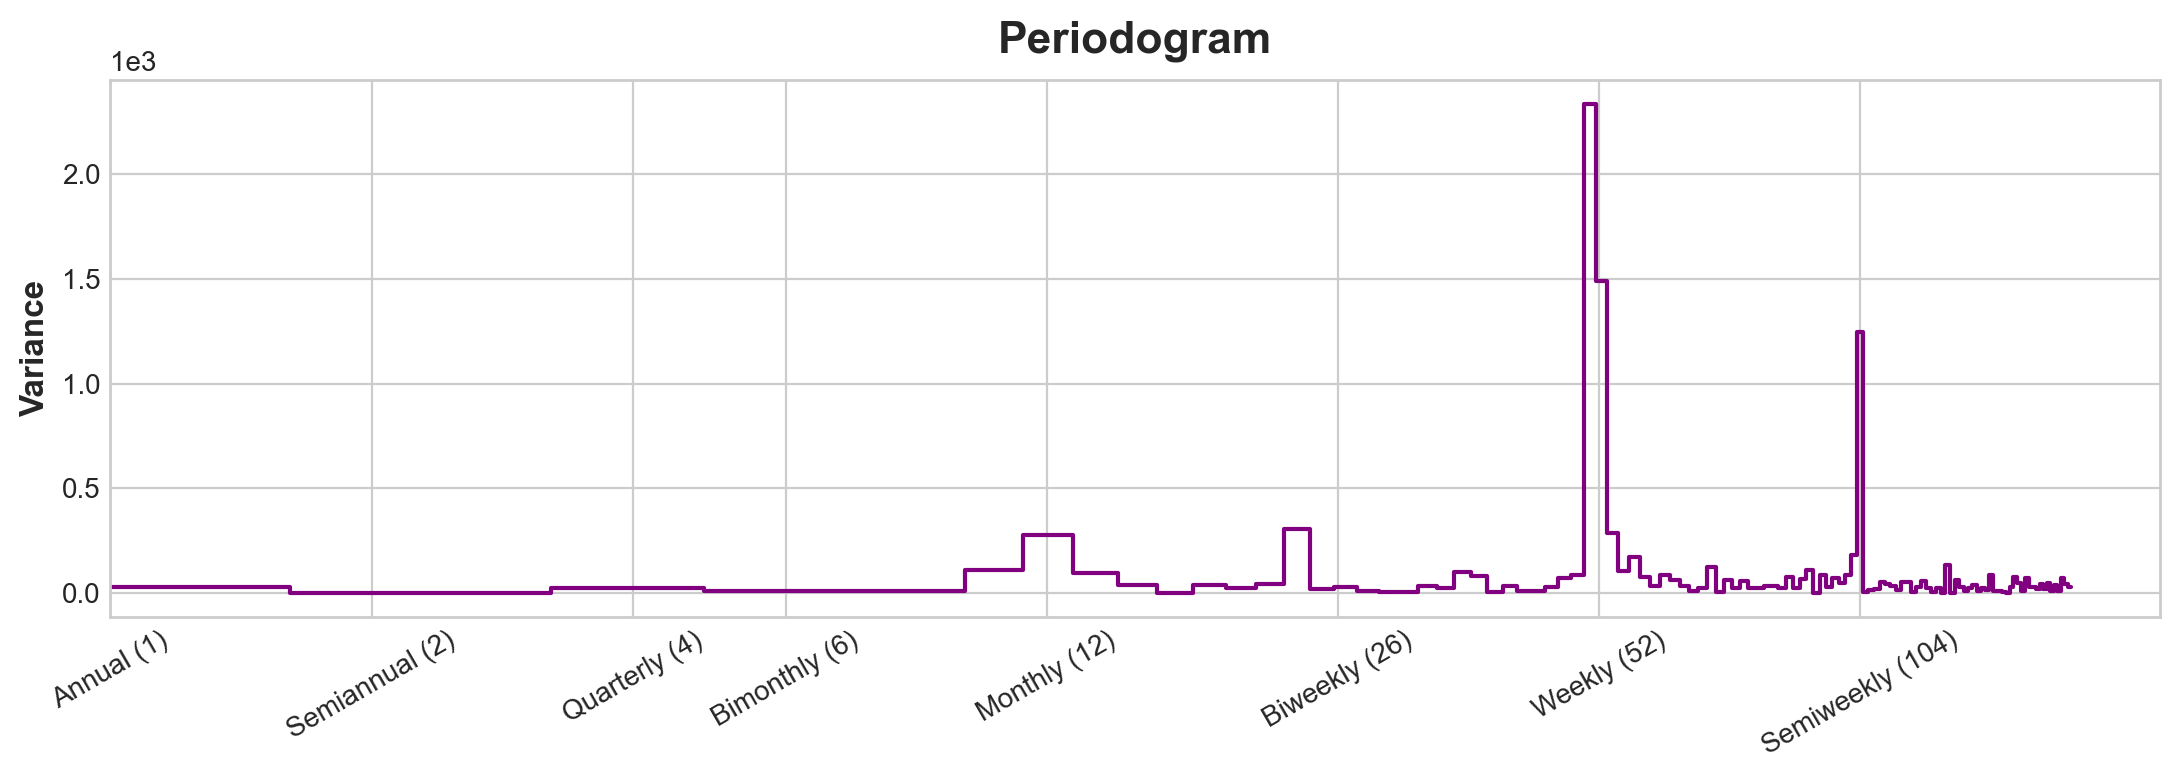

In [396]:
plot_periodogram(y2017.sales)

<AxesSubplot:title={'center':'Seasonal Plot (week/dayofweek)'}, xlabel='dayofweek', ylabel='sales'>

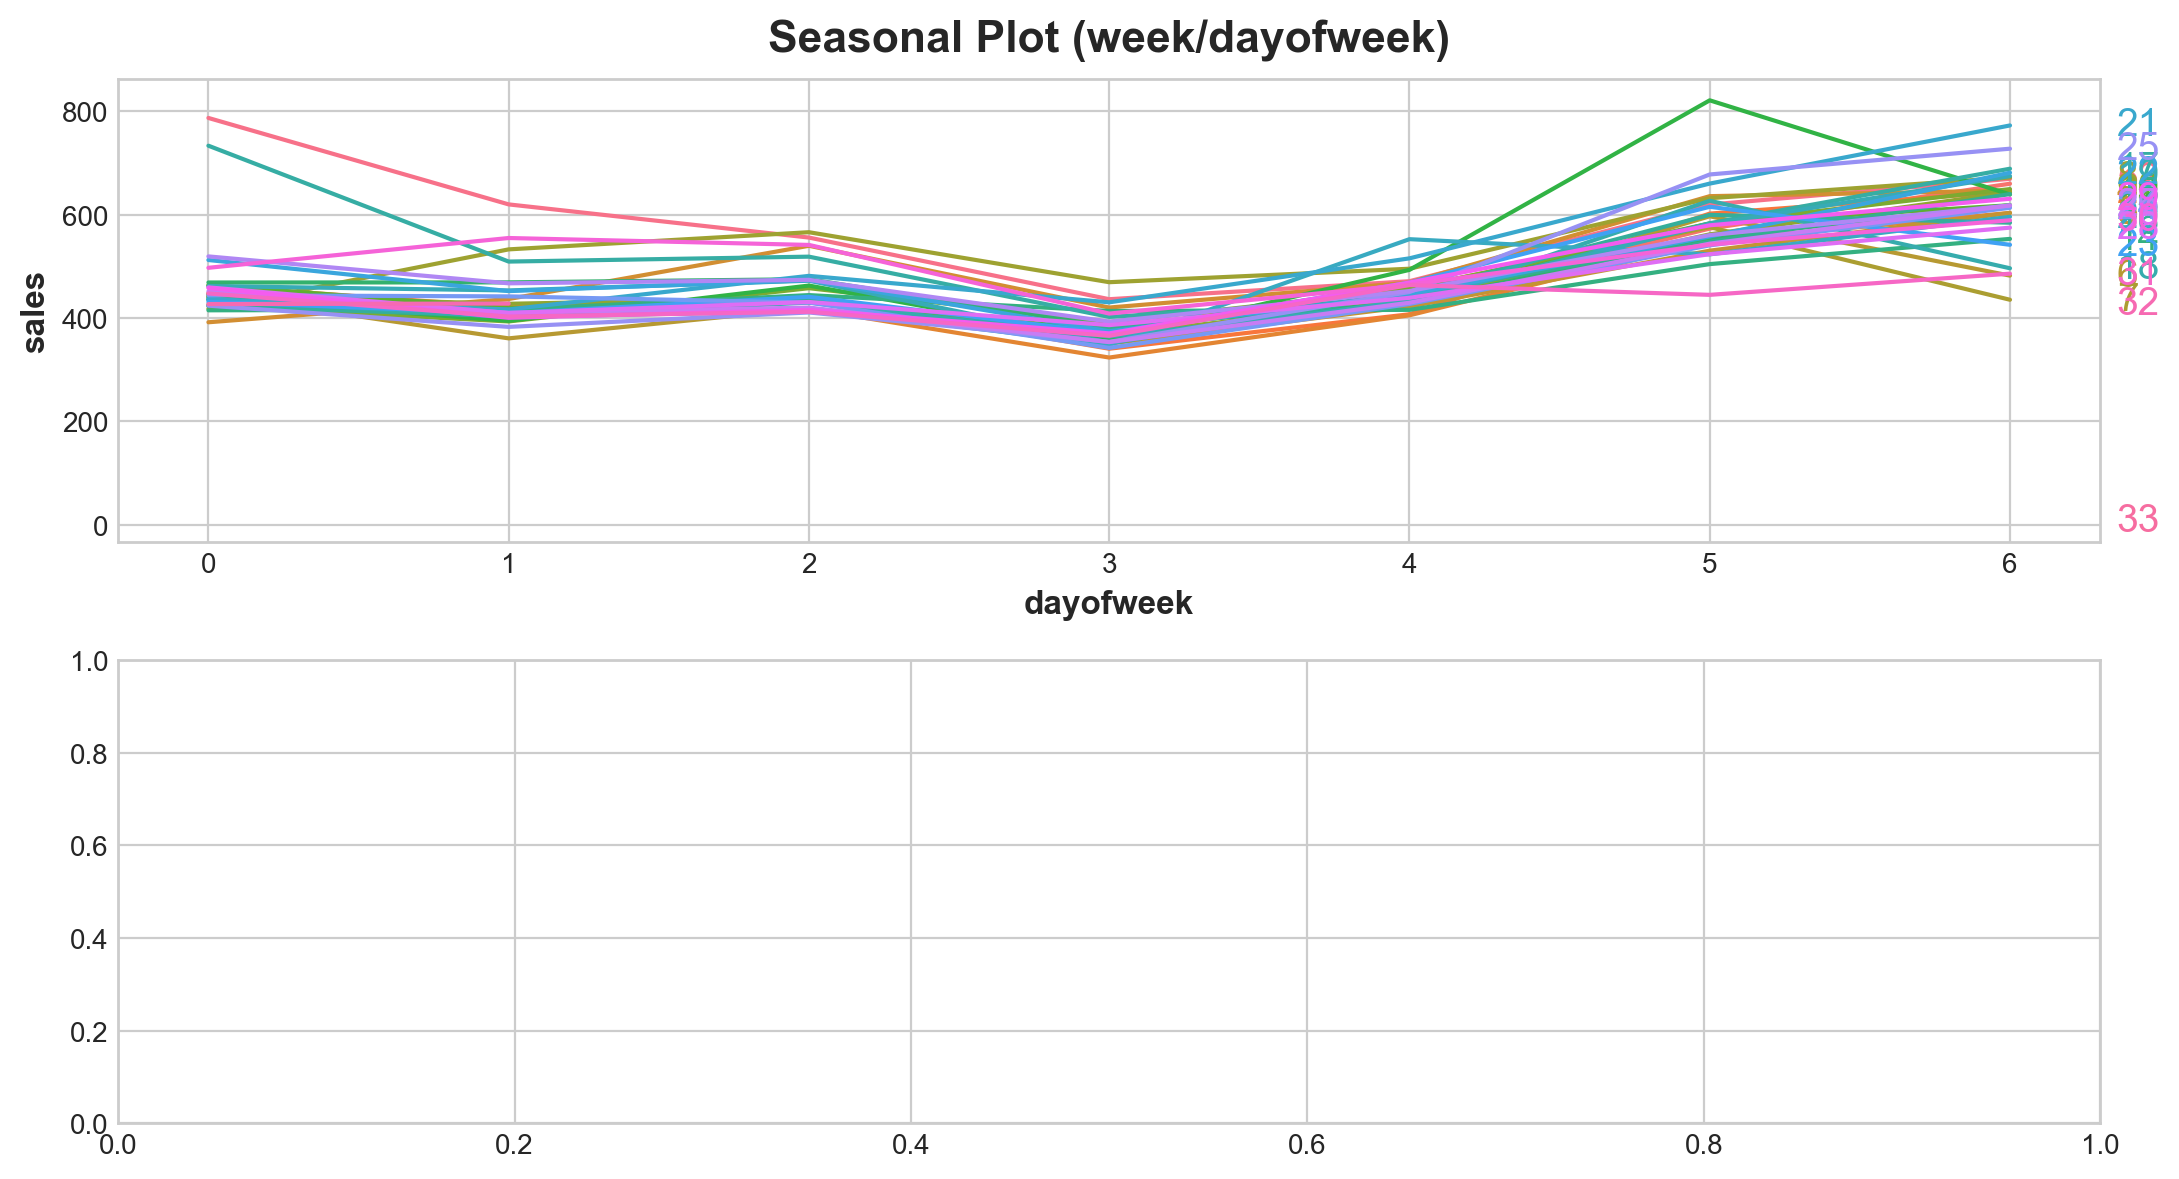

In [398]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(y2017, y="sales", period="week", freq="dayofweek", ax=ax0)


In [538]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="M", order=4)  

dp = DeterministicProcess(
    index=avg_sales1.index,
    constant=True,               
    order=1,                 
    additional_terms=[fourier],  
    drop=True,                  
)

X = dp.in_sample() 

In [607]:
y = avg_sales1
X['y_lag_1'] = y.sales.shift(1)
X['y_lag_2'] = y.sales.shift(2)
X['y_lag_3'] = y.sales.shift(3)
X['y_lag_4'] = y.sales.shift(4)
X['y_lag_5'] = y.sales.shift(5)
X['y_lag_6'] = y.sales.shift(6)
X['y_lag_7'] = y.sales.shift(7)
X['y_lag_14'] = y.sales.shift(14)
X['y_lag_28'] = y.sales.shift(28)
X['y_lag_30'] = y.sales.shift(30)
X['y_lag_48'] = y.sales.shift(48)
X['y_lag_56'] = y.sales.shift(56)

In [466]:
from sklearn.linear_model import LinearRegression

# Training data
X = X2017
y = y2017.sales  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

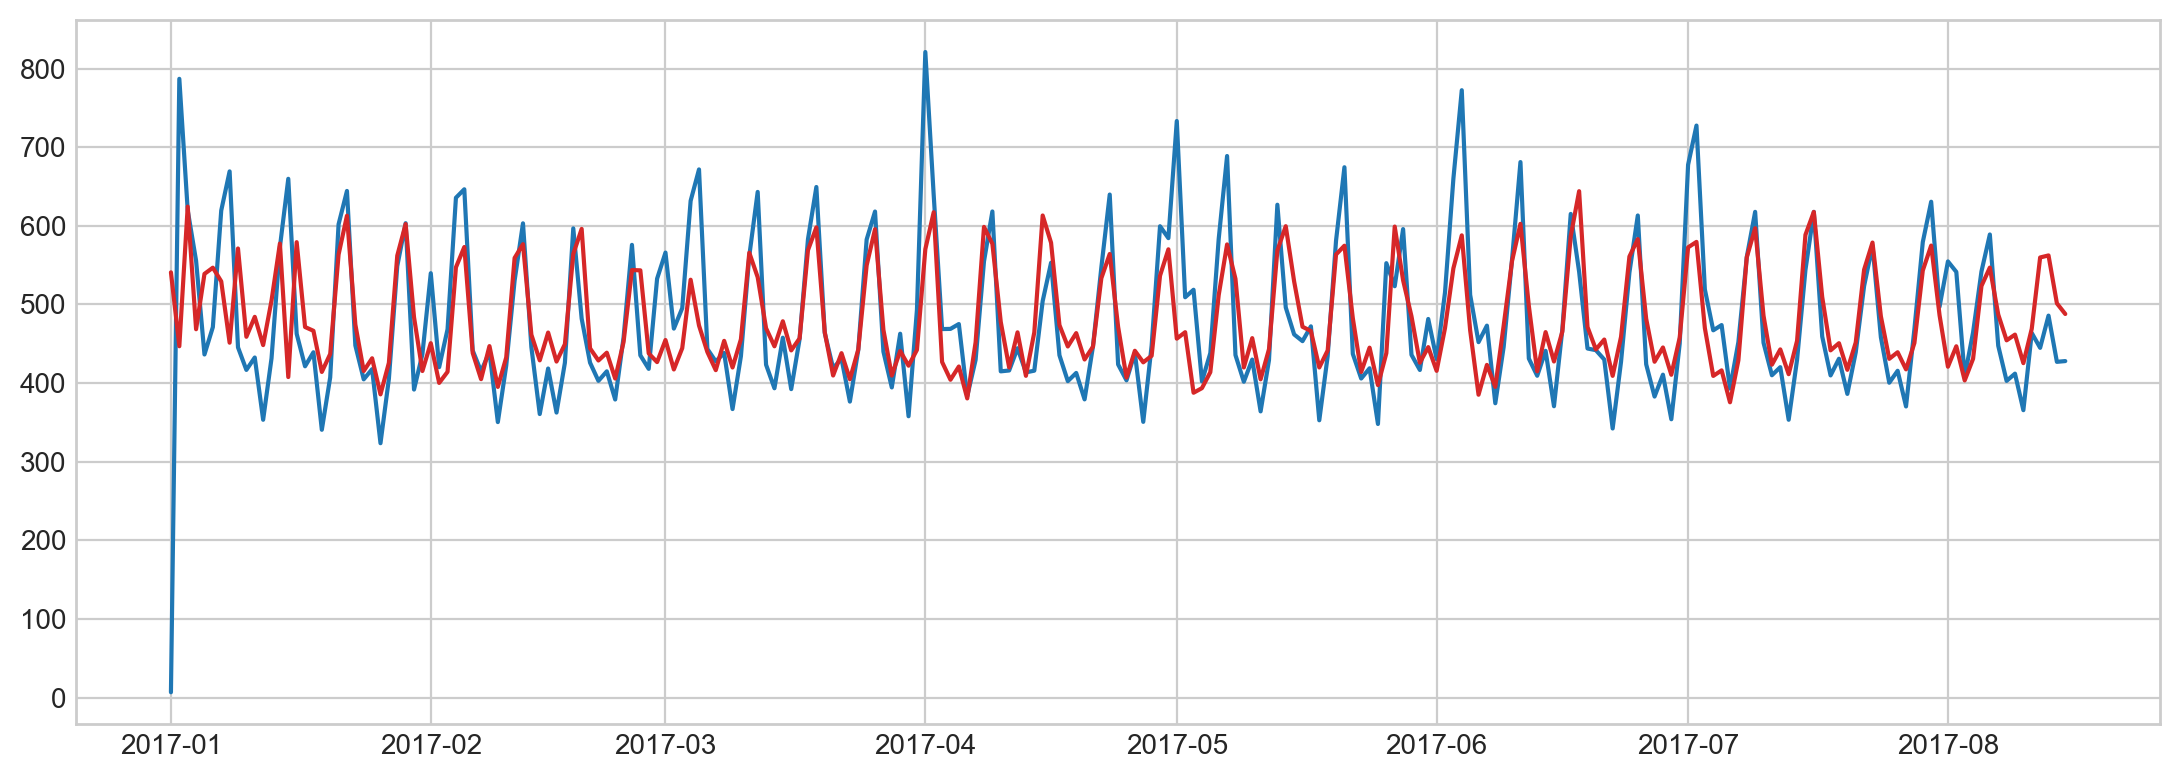

In [467]:
fig, ax1 = plt.subplots()
ax1.plot(y2017.index,y2017.sales)
ax1.plot(y2017.index,y_pred.values,color='C3')

# ax2 = ax1.twinx()  
# ax2.plot(oil_merge.loc['2017'].index,oil_merge.loc['2017'].dcoilwtico,color='C1')


In [468]:
future_pred_X = dp.out_of_sample(180)

<AxesSubplot:xlabel='date'>

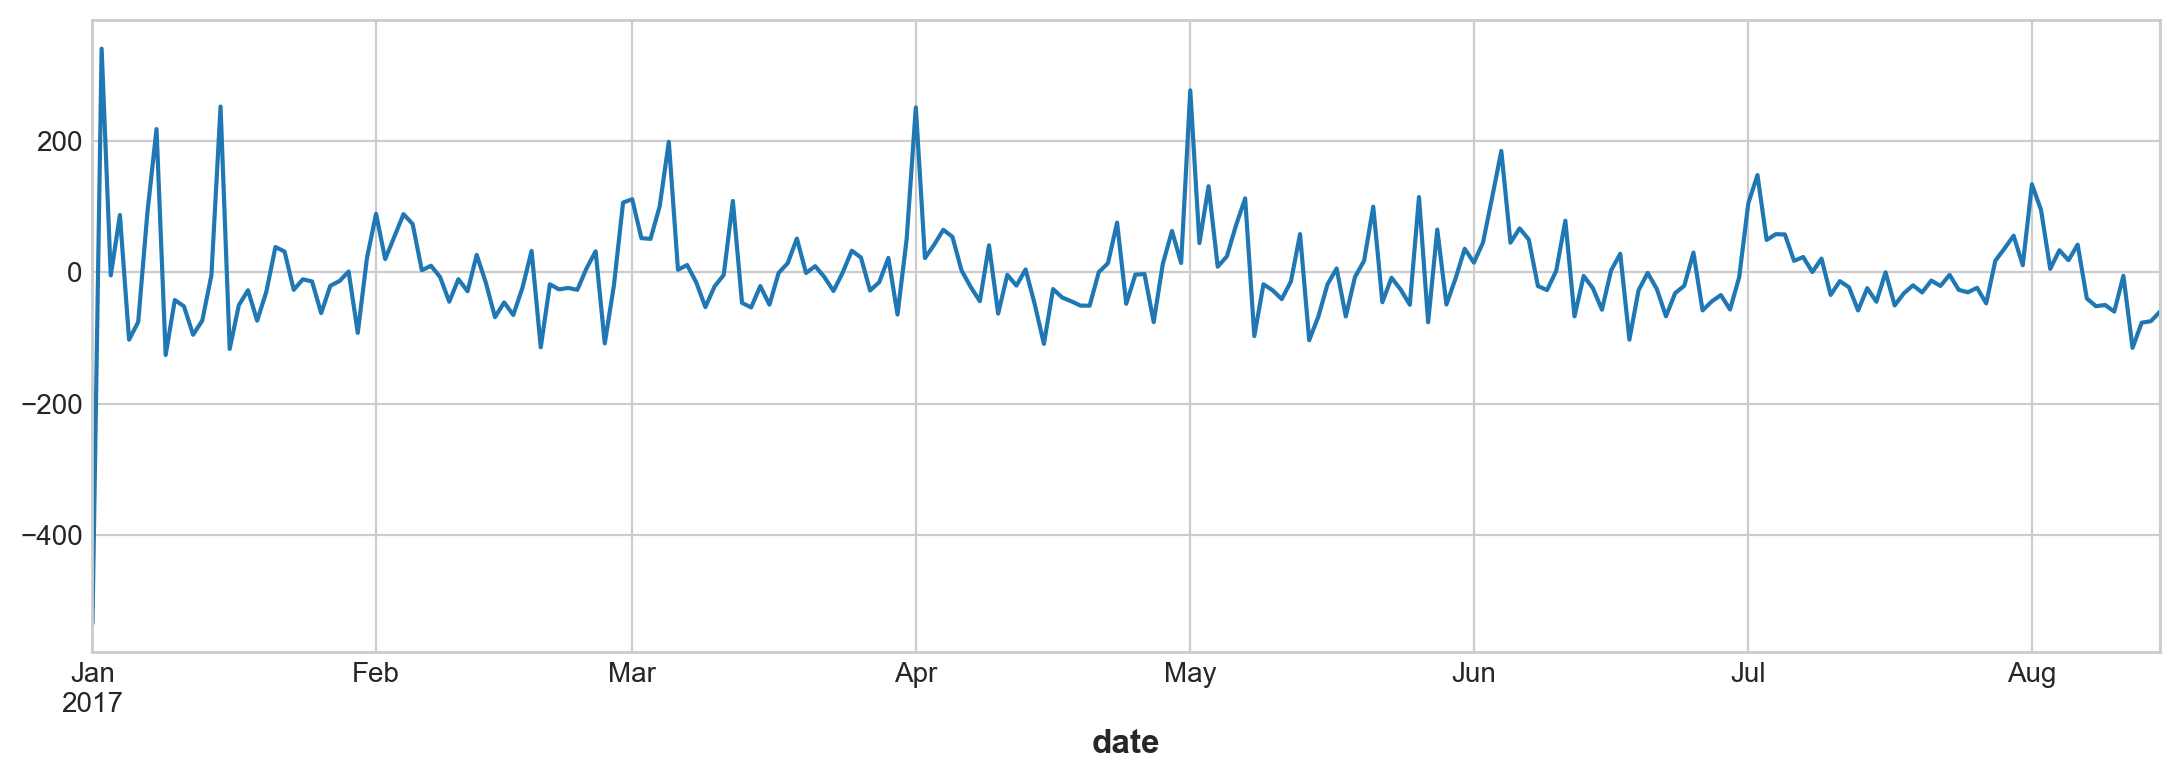

In [463]:
y_residual.plot()

In [519]:
holidays = holiday.loc['2017-01':'2017-09-01']

In [482]:
y_deseason = y - y_pred

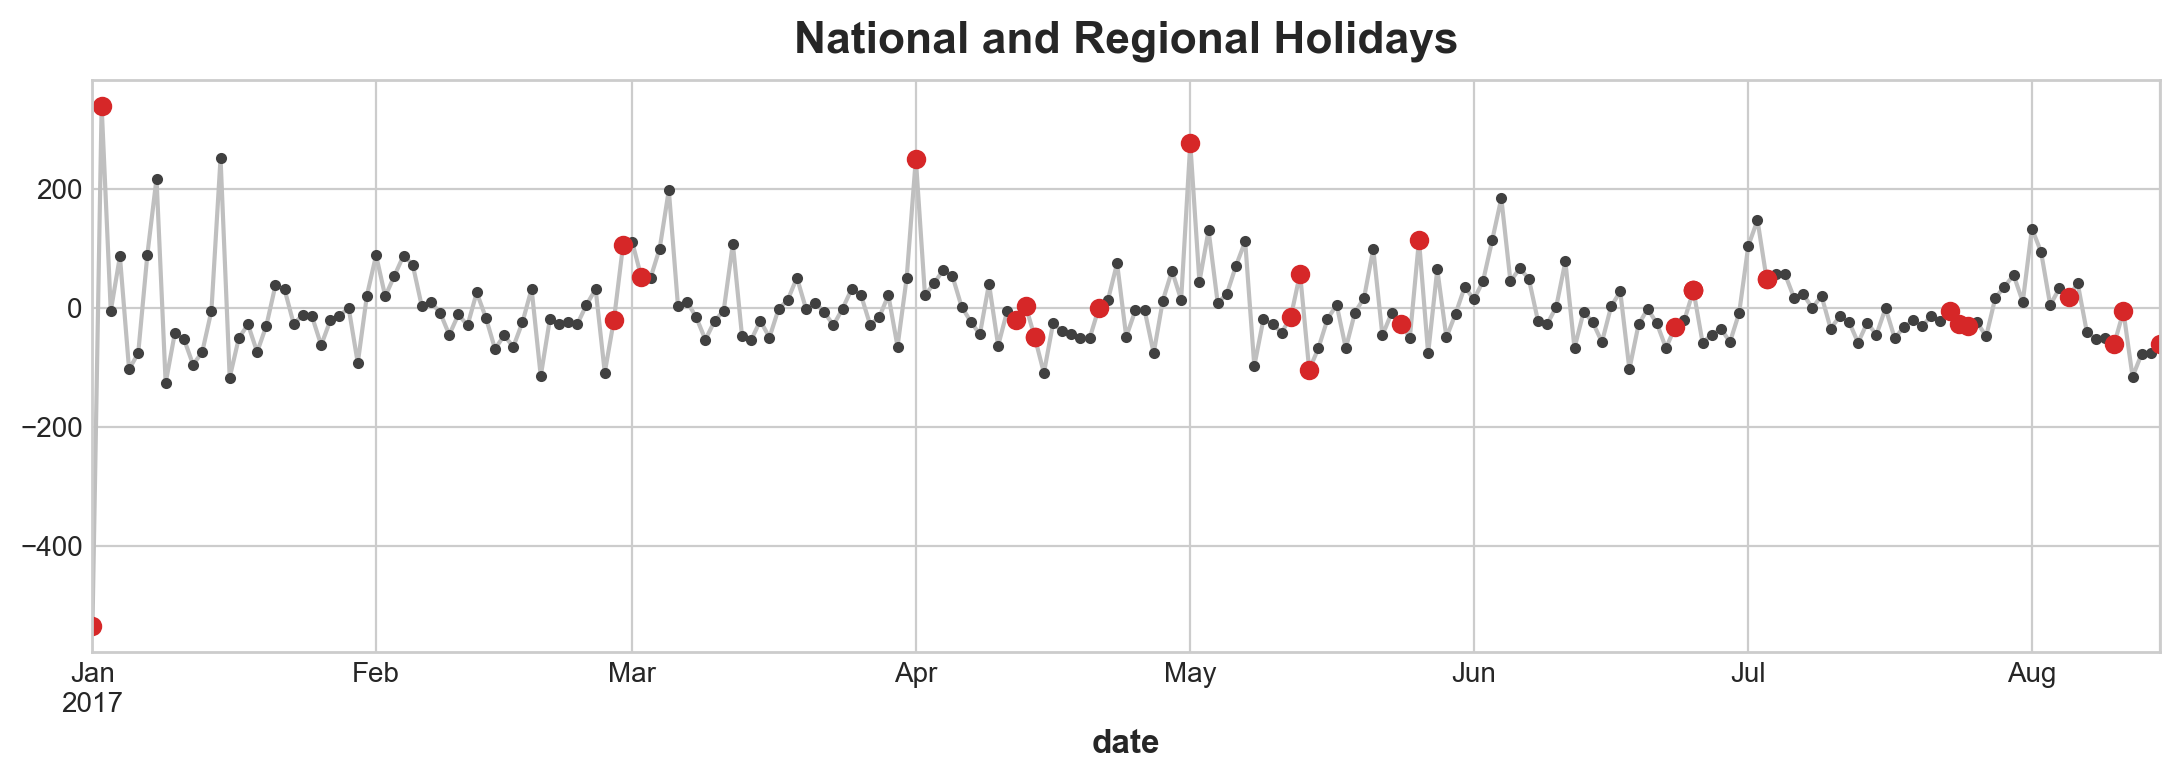

In [486]:
ax = y_deseason.plot(**plot_params)
plt.plot_date(holiday.loc['2017-01':'2017-08-23'].index, 
              y_deseason[holiday.loc['2017-01':'2017-08-23'].index], color='C3')
ax.set_title('National and Regional Holidays');

In [528]:
holidays = holidays.query('locale in ["National","Regional"]')
X_holidays = pd.get_dummies(holidays.loc['2017-01':'2017-09'])

In [531]:
X_holidays = pd.get_dummies(holidays.loc['2017-01':'2017-08-15'])

In [721]:
X_holidays2 = pd.get_dummies(holidays.loc['2017-01':'2017-09'])

In [848]:
def lag_features(df,y_df):
    y = y_df
    df = df.copy()
    target_map = y['sales'].to_dict() #Datetime as index
    df['lag1'] = (df.index-pd.Timedelta('1 days')).map(target_map)
    df['lag2'] = (df.index-pd.Timedelta('2 days')).map(target_map)
    df['lag3'] = (df.index-pd.Timedelta('3 days')).map(target_map)
    df['lag4'] = (df.index-pd.Timedelta('4 days')).map(target_map)
    df['lag5'] = (df.index-pd.Timedelta('5 days')).map(target_map)
    df['lag6'] = (df.index-pd.Timedelta('6 days')).map(target_map)
    df['lag7'] = (df.index-pd.Timedelta('7 days')).map(target_map)
    df['lag14'] = (df.index-pd.Timedelta('14 days')).map(target_map)
    df['lag28'] = (df.index-pd.Timedelta('28 days')).map(target_map)
    df['lag30'] = (df.index-pd.Timedelta('30 days')).map(target_map)
    df['lag48'] = (df.index-pd.Timedelta('48 days')).map(target_map)
    df['lag56'] = (df.index-pd.Timedelta('56 days')).map(target_map)
    return df
X4 = lag_features(X4,avg_sales1)

In [869]:
from sklearn.linear_model import LinearRegression
features = X4
y = y2017.sales
# Train the model
model = LinearRegression()
model.fit(features, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(features), index=features.index)

In [870]:
#Scoring metrics
y_deseason = y - y_pred
((y_deseason.values)**2).sum()
#850639.27723873

578074.7792961504

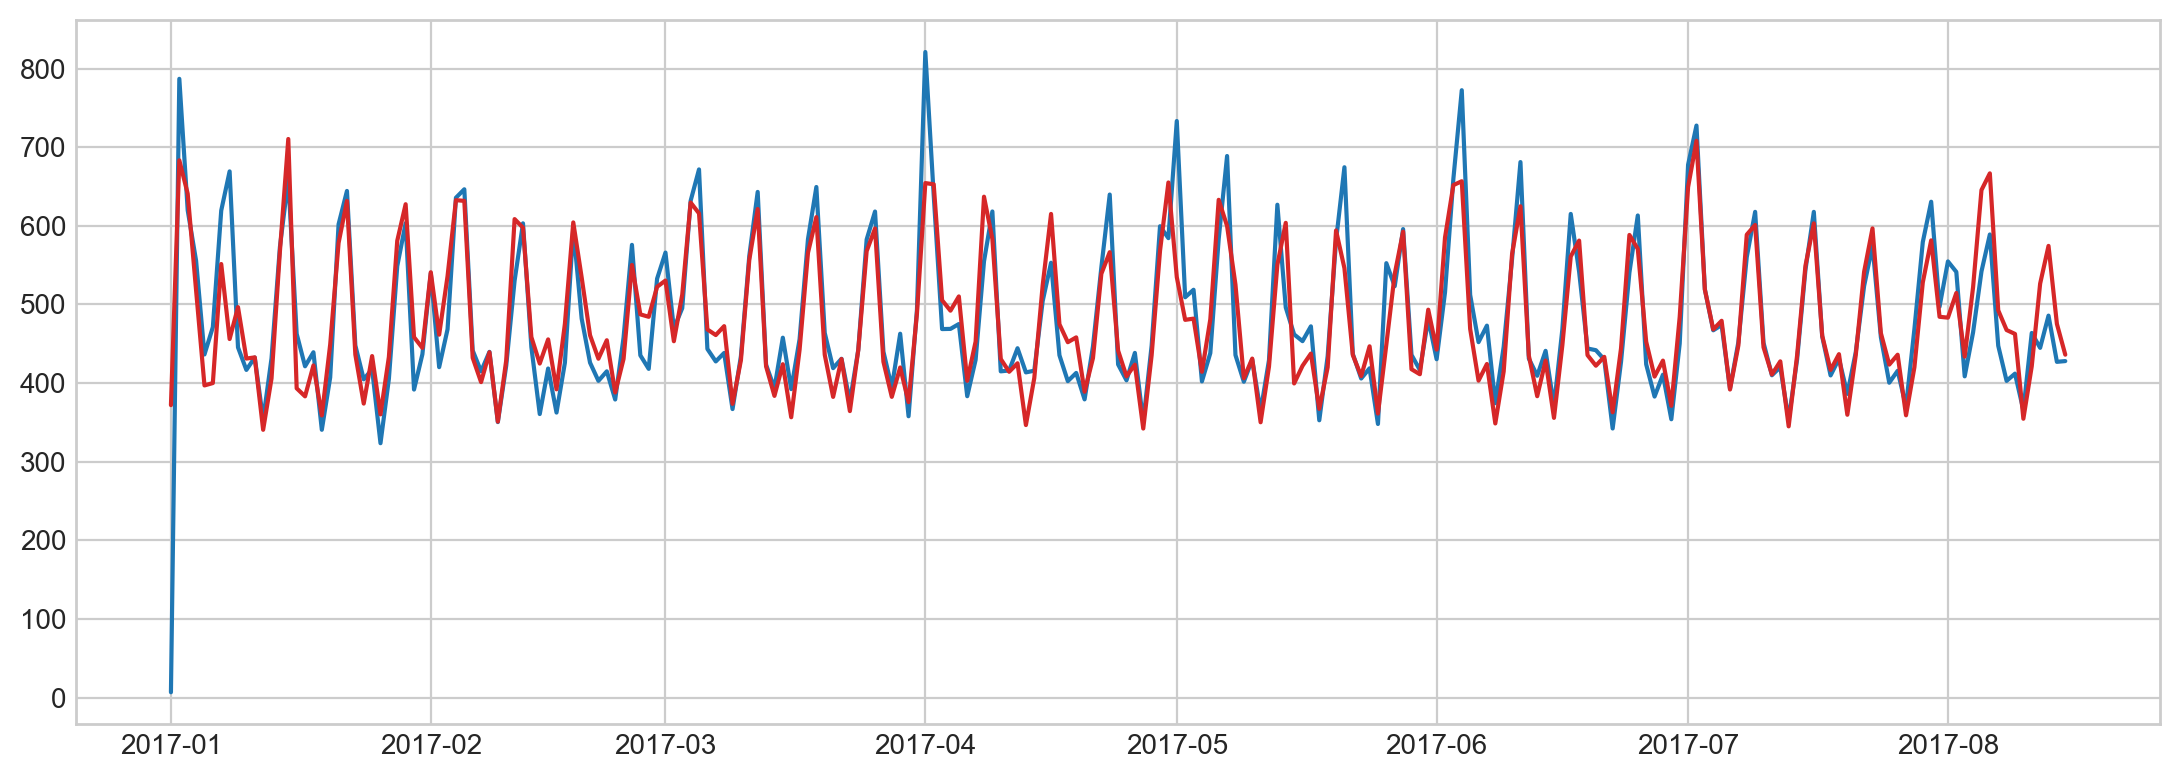

In [871]:
fig, ax1 = plt.subplots()
ax1.plot(y2017.index,y2017.sales)
ax1.plot(y2017.index,y_pred.values,color='C3')
# ax2 = ax1.twinx()  
# ax2.plot(oil_merge.loc['2017'].index,oil_merge.loc['2017'].dcoilwtico,color='C1')

In [872]:
X_fore = dp.out_of_sample(1)

In [873]:
X_fore.index = X_fore.index.rename('date')

In [874]:
temp_df = pd.concat([X,X_fore])

In [880]:
l_temp_df = lag_features(temp_df)

In [881]:
X_fore_h = l_temp_df.join(X_holidays, on='date').fillna(0.0)

In [888]:
target = X_fore_h.iloc[-1:]

In [889]:
target

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
date                                                                       
2017-08-16    1.0  228.0     0.0     0.0     1.0     0.0     0.0     0.0   

            sin(1,freq=M)  cos(1,freq=M)  ...  description_Dia de la Madre-1  \
date                                      ...                                  
2017-08-16       0.101168      -0.994869  ...                            0.0   

            description_Dia del Trabajo  \
date                                      
2017-08-16                          0.0   

            description_Primer Grito de Independencia  \
date                                                    
2017-08-16                                        0.0   

            description_Primer dia del ano  \
date                                         
2017-08-16                             0.0   

            description_Provincializacion de Cotopaxi  \
date                                                    
2017-08-16                                        0.0   

            description_Provincializacion de Imbabura  \
date                                                    
2017-08-16                                        0.0   

            description_Traslado Batalla de Pichincha  \
date                                                    
2017-08-16                                        0.0   

            description_Traslado Primer Grito de Independencia  \
date                                                             
2017-08-16                                                0.0    

            description_Traslado Primer dia del ano  description_Viernes Santo  
date                                                                            
2017-08-16                                      0.0                        0.0  

[1 rows x 51 columns]

In [890]:
y_fore = pd.Series(model.predict(target), index=target.index)

In [892]:
y

date
2017-01-01      6.780304
2017-01-02    786.928379
2017-01-03    619.740224
2017-01-04    555.608004
2017-01-05    436.375395
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 227, dtype: float64

In [891]:
y_fore

date
2017-08-16    623.72556
Freq: D, dtype: float64

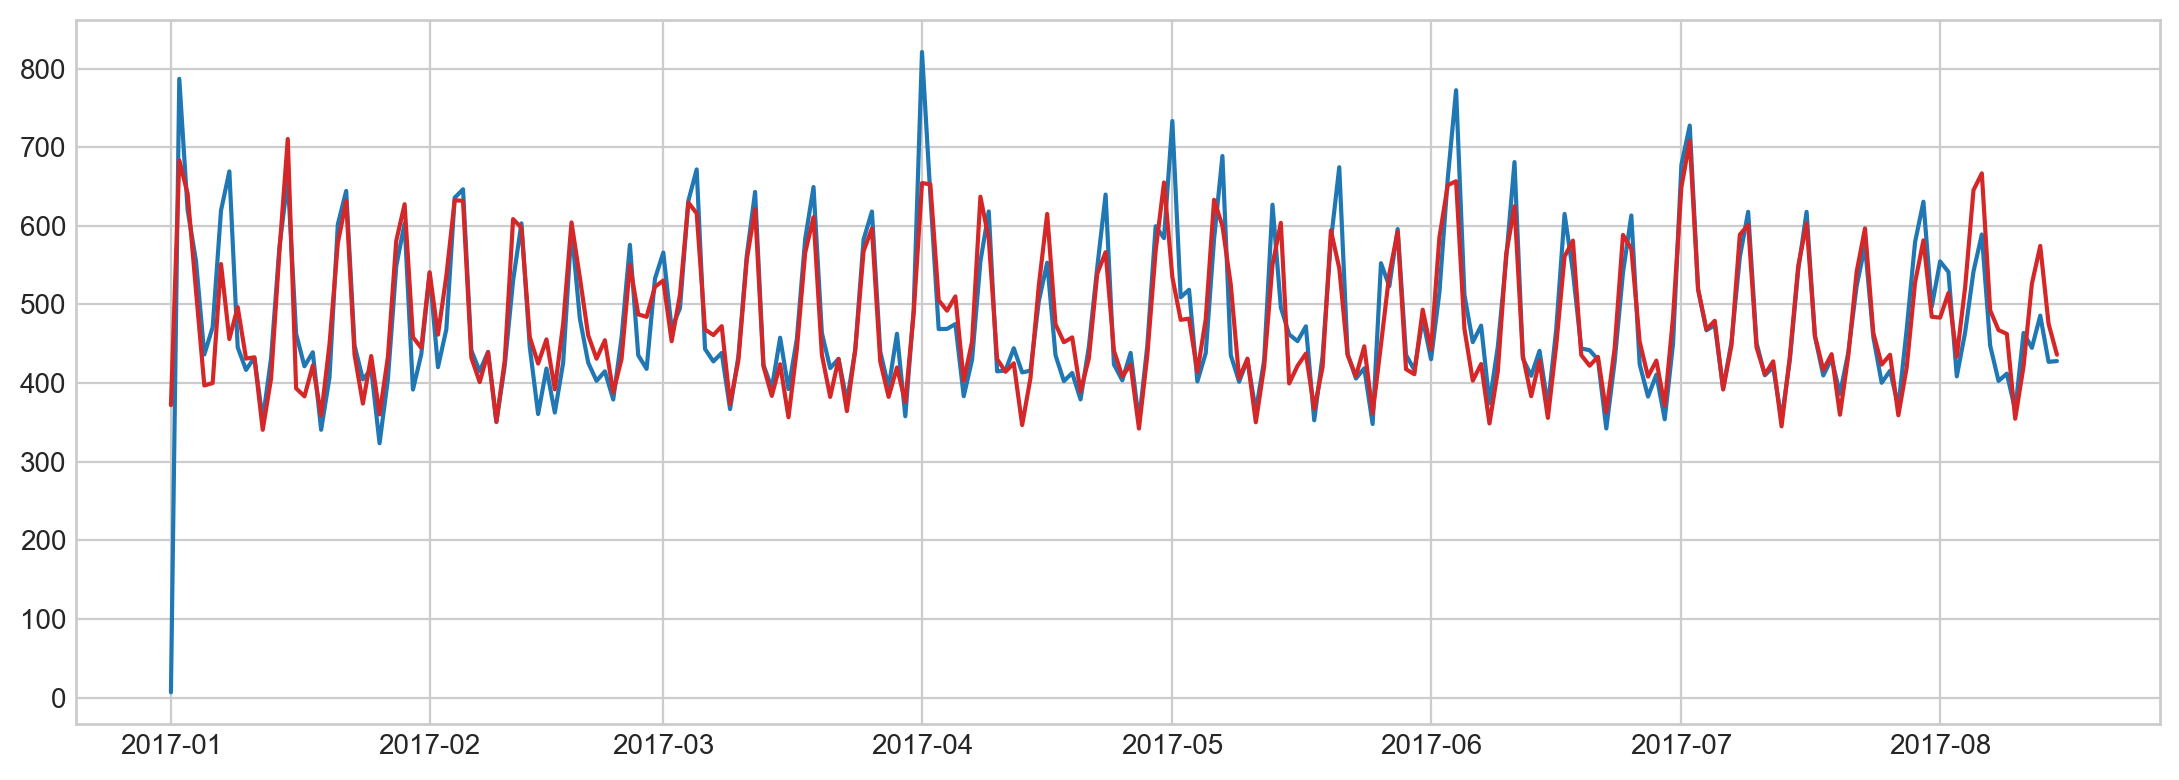

In [893]:
fig, ax1 = plt.subplots()
ax1.plot(y2017.index,y2017.sales)
ax1.plot(y2017.index,y_pred.values,color='C3')
ax1.plot(y_fore.index,y_fore.values)

In [912]:
X_fore.iloc[:-15]

const  trend  sin(1,freq=M)  cos(1,freq=M)  sin(2,freq=M)  \
date                                                                    
2017-01-01    1.0    1.0       0.000000       1.000000       0.000000   
2017-01-02    1.0    2.0       0.201299       0.979530       0.394356   
2017-01-03    1.0    3.0       0.394356       0.918958       0.724793   
2017-01-04    1.0    4.0       0.571268       0.820763       0.937752   
2017-01-05    1.0    5.0       0.724793       0.688967       0.998717   
...           ...    ...            ...            ...            ...   
2017-08-12    1.0  224.0       0.790776      -0.612106      -0.968077   
2017-08-13    1.0  225.0       0.651372      -0.758758      -0.988468   
2017-08-14    1.0  226.0       0.485302      -0.874347      -0.848644   
2017-08-15    1.0  227.0       0.299363      -0.954139      -0.571268   
2017-08-16    1.0  228.0       0.101168      -0.994869      -0.201299   

            cos(2,freq=M)  sin(3,freq=M)  cos(3,freq=M)  sin(4,freq=M)  \
date                                                                     
2017-01-01       1.000000       0.000000       1.000000       0.000000   
2017-01-02       0.918958       0.571268       0.820763       0.724793   
2017-01-03       0.688967       0.937752       0.347305       0.998717   
2017-01-04       0.347305       0.968077      -0.250653       0.651372   
2017-01-05      -0.050649       0.651372      -0.758758      -0.101168   
...                   ...            ...            ...            ...   
2017-08-12      -0.250653       0.394356       0.918958       0.485302   
2017-08-13       0.151428       0.848644       0.528964      -0.299363   
2017-08-14       0.528964       0.998717      -0.050649      -0.897805   
2017-08-15       0.820763       0.790776      -0.612106      -0.937752   
2017-08-16       0.979530       0.299363      -0.954139      -0.394356   

            cos(4,freq=M)  
date                       
2017-01-01       1.000000  
2017-01-02       0.688967  
2017-01-03      -0.050649  
2017-01-04      -0.758758  
2017-01-05      -0.994869  
...                   ...  
2017-08-12      -0.874347  
2017-08-13      -0.954139  
2017-08-14      -0.440394  
2017-08-15       0.347305  
2017-08-16       0.918958  

[228 rows x 10 columns]

In [936]:
def lag_features(df,y_df):
    df = df.copy()
    target_map = y_df.to_dict() #Datetime as index
    df['lag1'] = (df.index-pd.Timedelta('1 days')).map(target_map)
    df['lag2'] = (df.index-pd.Timedelta('2 days')).map(target_map)
    df['lag3'] = (df.index-pd.Timedelta('3 days')).map(target_map)
    df['lag4'] = (df.index-pd.Timedelta('4 days')).map(target_map)
    df['lag5'] = (df.index-pd.Timedelta('5 days')).map(target_map)
    df['lag6'] = (df.index-pd.Timedelta('6 days')).map(target_map)
    df['lag7'] = (df.index-pd.Timedelta('7 days')).map(target_map)
    df['lag14'] = (df.index-pd.Timedelta('14 days')).map(target_map)
    df['lag28'] = (df.index-pd.Timedelta('28 days')).map(target_map)
    df['lag30'] = (df.index-pd.Timedelta('30 days')).map(target_map)
    df['lag48'] = (df.index-pd.Timedelta('48 days')).map(target_map)
    df['lag56'] = (df.index-pd.Timedelta('56 days')).map(target_map)
    return df

In [910]:
[i for i in range(15,0,-1)]

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# Recursive lagging 1

In [943]:
# y = avg_sales1
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
# y.index = y.index.to_period('D')
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True, #adding seasonal=True reduce the squared residual by 200000
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample().loc['2017']
X4 = X.join(X_holidays, on='date').fillna(0.0)
X4 = lag_features(X4,avg_sales1.sales)
X4 = X4.fillna(0)

In [988]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="M", order=4)  

dp_fore = DeterministicProcess(
    index=pd.date_range(start='2017-01-01', end='2017-08-31', freq='D').to_period(),
    constant=True,               
    order=1,
    seasonal=True,
    additional_terms=[fourier],  
    drop=True,                  
)

X_fore = dp_fore.in_sample().loc['2017']
X_fore.index = X_fore.index.rename('date')

In [989]:
y_sales = avg_sales1.sales

In [990]:
holidays = holiday.loc['2017-01':'2017-09-01']
holidays = holidays.query('locale in ["National","Regional"]')
X_holidays = pd.get_dummies(holidays)

In [991]:
#Linear Regression
from sklearn.linear_model import LinearRegression
features = X4
y = y2017.sales
# Train the model
model = LinearRegression()
model.fit(features, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(features), index=features.index)

In [1003]:
for i in range(15,0,-1):
    cur = X_fore.iloc[:-i]
    cur_wl = lag_features(cur,y_sales)
    cur_wl_h = cur_wl.join(X_holidays, on='date').fillna(0.0)
    y_pred = pd.Series(model.predict(cur_wl_h.iloc[-1:]), index=cur_wl_h.iloc[-1:].index)
    y_sales = y_sales.append(y_pred)

In [993]:
result = y_sales.to_frame()

<AxesSubplot:xlabel='date'>

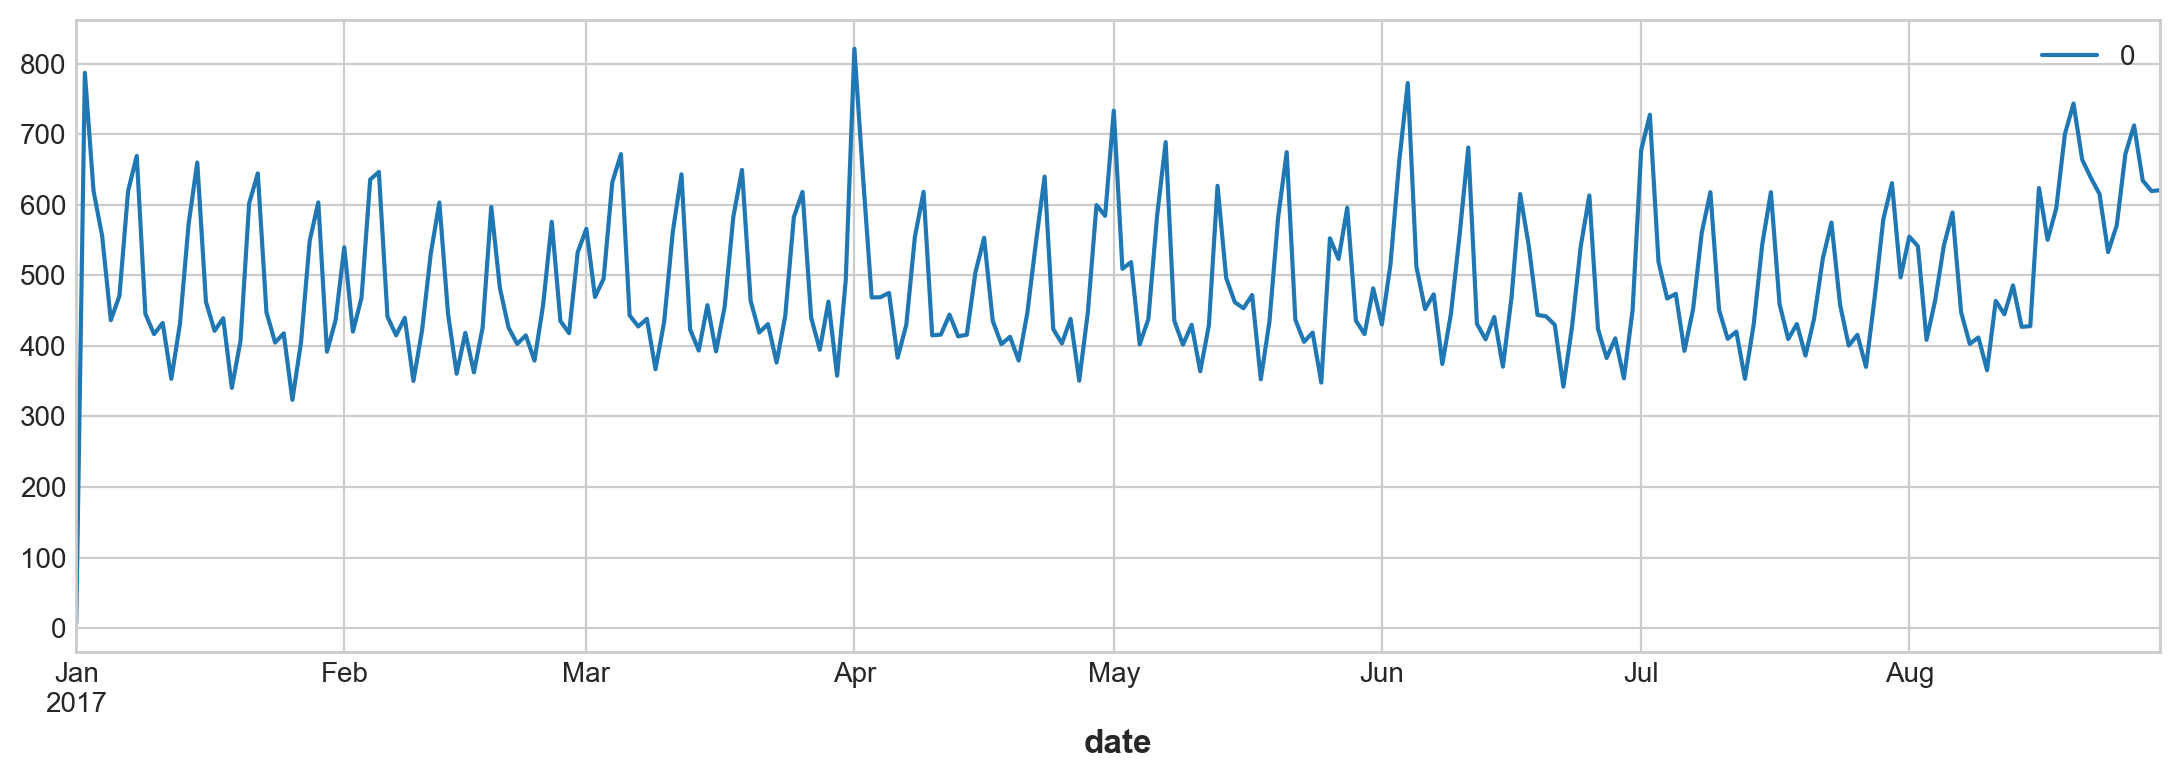

In [997]:
result.loc['2017'].plot()

# No lag, hypothesis trend modelling

In [1001]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq='M', order=4)
_dp = DeterministicProcess(
    index=pd.date_range(start='2017-01-01', end='2017-08-15', freq='D').to_period(),
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
_X = _dp.in_sample()
_X.index = _X.index.rename('date')
X5 = _X.join(X_holidays, on='date').fillna(0.0)
X5 = X5.fillna(0)

In [1006]:
#Linear Regression
from sklearn.linear_model import LinearRegression
features = X5
y = y2017.sales
# Train the model
model2 = LinearRegression()
model2.fit(features, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model2.predict(features), index=features.index)

In [1007]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq='M', order=4)
_dp = DeterministicProcess(
    index=pd.date_range(start='2017-08-16', end='2017-08-31', freq='D').to_period(),
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
_X_fore = _dp.in_sample()
_X_fore.index = _X_fore.index.rename('date')
X5_fore = _X_fore.join(X_holidays, on='date').fillna(0.0)
X5_fore = X5_fore.fillna(0)

In [1012]:
_train_df = y.to_frame()

In [1010]:
model2_result = pd.Series(model2.predict(X5_fore), index=X5_fore.index).to_frame()

<AxesSubplot:xlabel='date'>

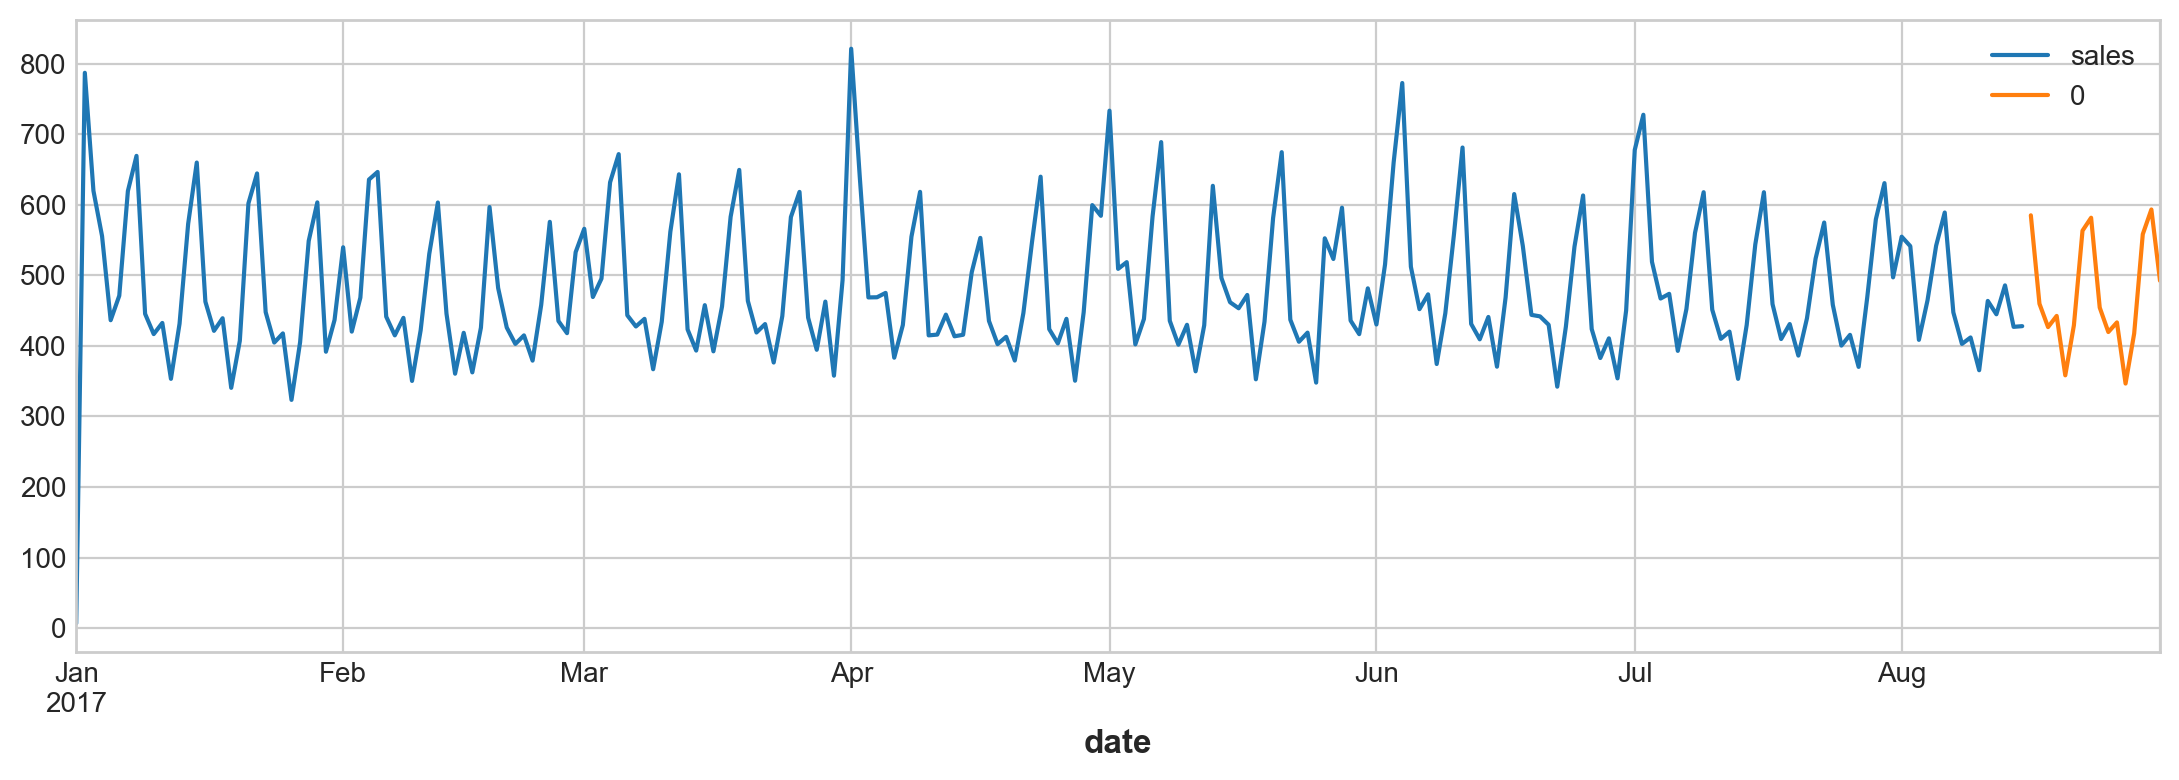

In [1013]:
fig,ax=plt.subplots()
_train_df.plot(ax=ax)
model2_result.plot(ax=ax)

In [1027]:
oil2017_train=oil_merge.loc['2017-01-01':'2017-08-15']

In [1038]:
onprom2017_train = train[['date','onpromotion']].groupby('date').mean().loc['2017-01-01':'2017-08-15']
onprom2017_train.index = pd.to_datetime(onprom2017_train.index)

In [1039]:
h_X2 = oil2017_train.join(onprom2017_train,on='date')

# Hybrid model

In [74]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method
    
    def fit(self, X_1, X_2, y):
        self.model_1.fit(X_1,y)

        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        self.model_2.fit(X_2, y_resid)
            
        # Save column names for predict method
        self.y_columns = y.columns
        # Save data for question checking
        self.y_fit = y_fit
        self.y_resid = y_resid
    
    def predict(self, X_1, X_2):
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()  # long to wide

    BoostedHybrid.fit = fit
    BoostedHybrid.predict = predict
 

In [71]:
avg_sales1 = train[['date','sales']].groupby('date').agg({'sales': 'mean'})
avg_sales1.index = pd.to_datetime(avg_sales1.index)
avg_sales1 = avg_sales1.loc['2017']
avg_sales1.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=227, freq=None)

In [81]:
avg_sales1.sales

date
2017-01-01      6.780304
2017-01-02    786.928379
2017-01-03    619.740224
2017-01-04    555.608004
2017-01-05    436.375395
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 227, dtype: float64

In [83]:
from xgboost import XGBRegressor

model = BoostedHybrid(LinearRegression(),
                      XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.005))
model.fit(X5, h_X2, avg_sales1)
y_pred = model.predict(X5,h_X2)
y_pred = y_pred.clip(0.0)

XGBoostError: [19:05:35] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:52: Check failed: info.labels.Size() == preds.Size() (0 vs. 227) : Invalid shape of labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000137921785 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000137ab0100 xgboost::obj::(anonymous namespace)::CheckRegInputs(xgboost::MetaInfo const&, xgboost::HostDeviceVector<float> const&) + 256
  [bt] (2) 3   libxgboost.dylib                    0x0000000137aaf318 xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float>>*) + 40
  [bt] (3) 4   libxgboost.dylib                    0x0000000137a40165 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 597
  [bt] (4) 5   libxgboost.dylib                    0x000000013793cc8f XGBoosterUpdateOneIter + 143
  [bt] (5) 6   libffi.7.dylib                      0x000000010e03fead ffi_call_unix64 + 85
  [bt] (6) 7   ???                                 0x000000030b20a6d0 0x0 + 13071591120



<AxesSubplot:xlabel='date'>

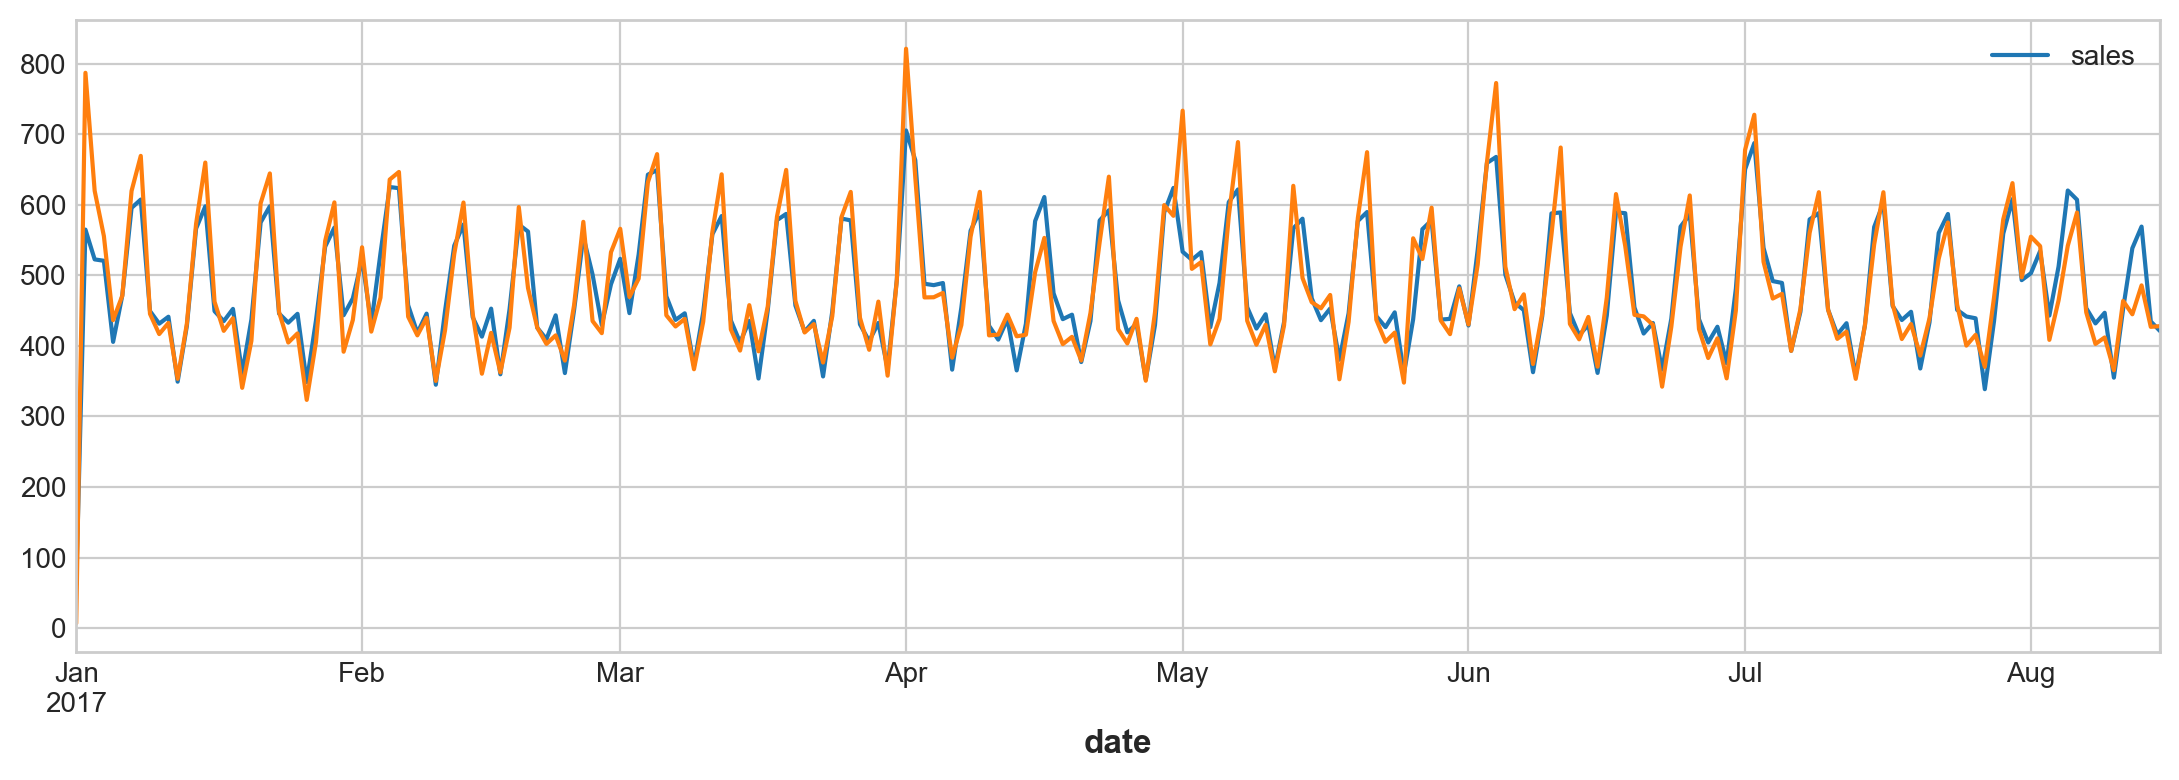

In [1056]:
fig,ax=plt.subplots()
y_pred.plot(ax=ax)
y.plot(ax=ax)

In [1062]:
y_pred = model.predict(X5_fore,h_X2_test)

<AxesSubplot:xlabel='date'>

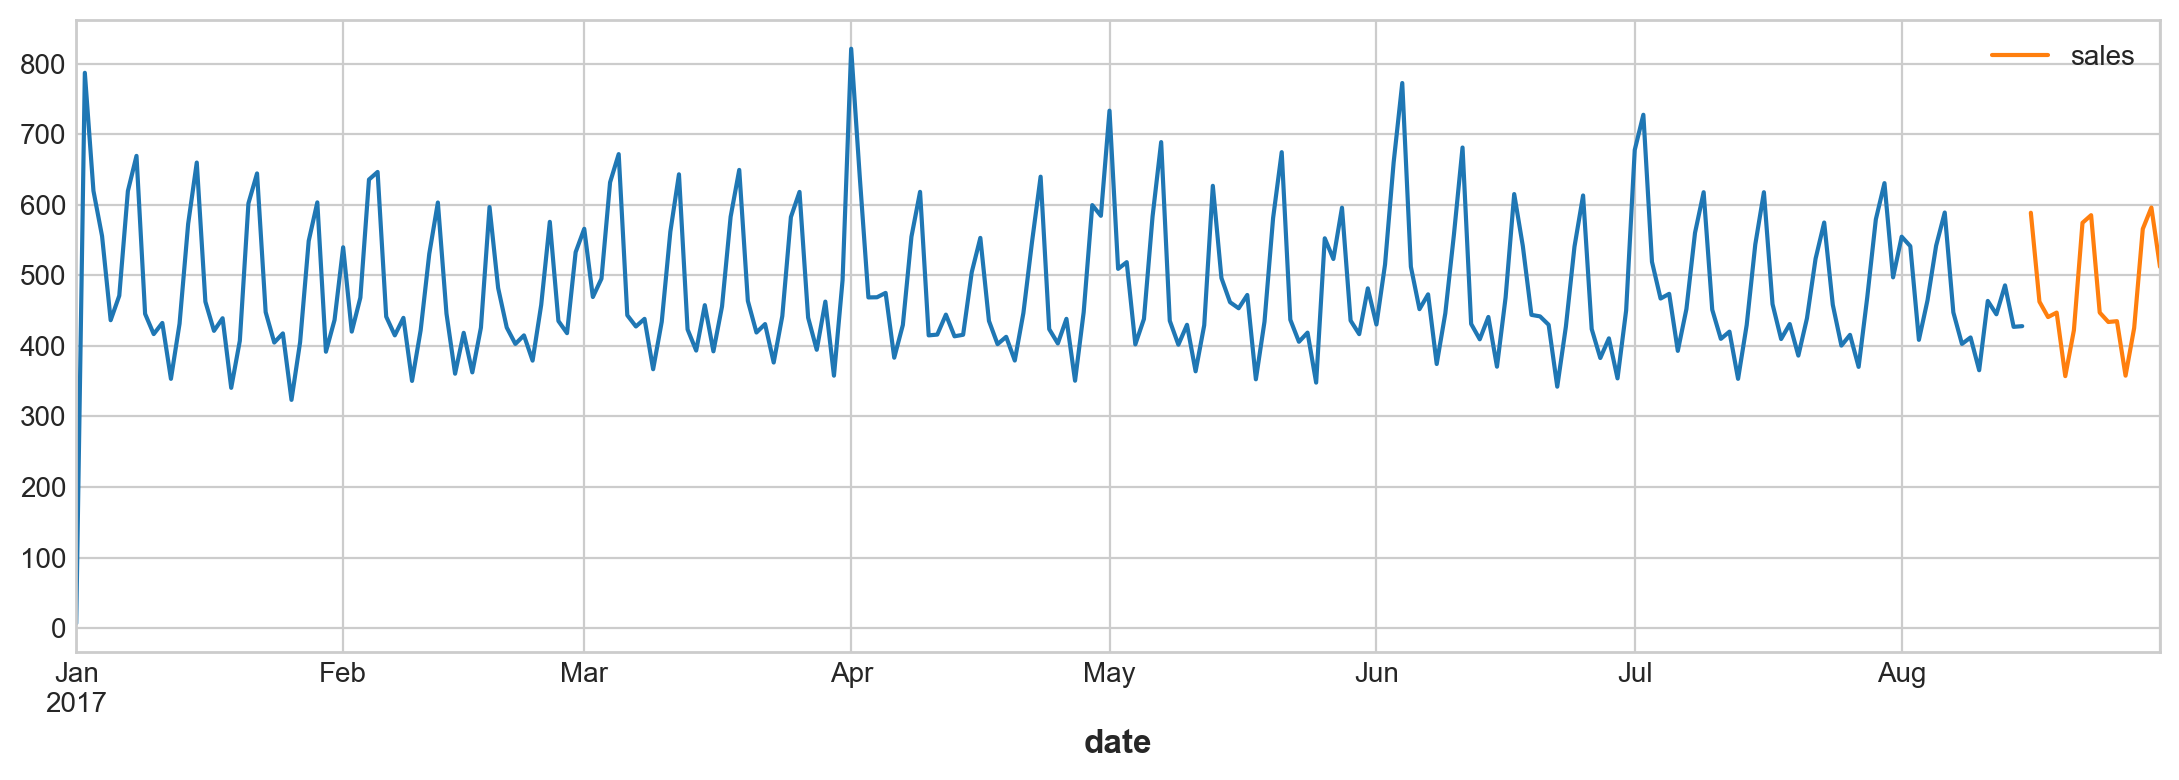

In [1065]:
fig,ax=plt.subplots()
y.plot(ax=ax)
y_pred.plot(ax=ax)

# Actual prediction with hybrid model

In [84]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method
    
    def fit(self, X_1, X_2, y):
        self.model_1.fit(X_1,y)

        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        self.model_2.fit(X_2, y_resid)
            
        # Save column names for predict method
        self.y_columns = y.columns
        # Save data for question checking
        self.y_fit = y_fit
        self.y_resid = y_resid
    
    def predict(self, X_1, X_2):
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()  # long to wide

    BoostedHybrid.fit = fit
    BoostedHybrid.predict = predict
 

In [85]:
import pandas as pd

In [86]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [87]:
store_sales = pd.read_csv(
    'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
y_train = store_sales.unstack(['store_nbr', 'family']).loc['2017']

In [88]:
holidays=pd.read_csv('holidays_events.csv')
holidays=holidays.set_index('date')
holidays.index=pd.to_datetime(holidays.index)
holidays = holidays.query('locale in ["National","Regional"]')
X_holidays = pd.get_dummies(holidays.loc['2017-01':'2017-09'])

In [89]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq='M', order=4)
_dp = DeterministicProcess(
    index=pd.date_range(start='2017-01-01', end='2017-08-15', freq='D').to_period(),
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
_X = _dp.in_sample()
_X.index = _X.index.rename('date')
X5 = _X.join(X_holidays, on='date').fillna(0.0)
X5 = X5.fillna(0)

In [90]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq='M', order=4)
_dp = DeterministicProcess(
    index=pd.date_range(start='2017-08-16', end='2017-08-31', freq='D').to_period(),
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
_X_fore = _dp.in_sample()
_X_fore.index = _X_fore.index.rename('date')
X5_fore = _X_fore.join(X_holidays, on='date').fillna(0.0)
X5_fore = X5_fore.fillna(0)

In [91]:
oil = pd.read_csv('oil.csv')
oil = oil.set_index('date')
oil.index = pd.to_datetime(oil.index)

d_range = pd.date_range(oil.index.min(),oil.index.max())
d_range = pd.DataFrame({'date': d_range})
oil_merge = pd.merge(d_range,oil,how='left',left_on='date',right_on=oil.index)
oil_merge = oil_merge.set_index('date')
oil_merge = oil_merge.interpolate()

In [92]:
oil2017_train=oil_merge.loc['2017-01-01':'2017-08-15']
onprom2017_train = train[['date','onpromotion']].groupby('date').mean().loc['2017-01-01':'2017-08-15']
onprom2017_train.index = pd.to_datetime(onprom2017_train.index)
h_X2 = oil2017_train.join(onprom2017_train,on='date')

In [93]:
oil2017_test=oil_merge.loc['2017-08-16':'2017-08-31']
onprom2017_test = test[['date','onpromotion']].groupby('date').mean()
onprom2017_test.index = pd.to_datetime(onprom2017_test.index)
h_X2_test = oil2017_test.join(onprom2017_test,on='date')

In [94]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression(fit_intercept=False)
model3.fit(X5,y_train)

LinearRegression(fit_intercept=False)

In [96]:
lr_predict = model3.predict(X5_fore)

In [108]:
def zero_conv(x):
    if x<0:
        return 0
    else:
        return x

In [110]:
y_submit_lr = pd.DataFrame(lr_predict, index=X5_fore.index, columns=y_train.columns)
y_submit_lr = y_submit_lr.stack(['store_nbr','family']).reset_index()
y_submit_lr = y_submit_lr.join(test.id).reindex(columns=['id', 'sales'])
y_submit_lr.sales = y_submit_lr.sales.apply(zero_conv)


In [44]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

model3 = BoostedHybrid(LinearRegression(fit_intercept=False),
                      RandomForestRegressor())
model.fit(X5, h_X2, y_train)
# y_pred = model.predict(X5,h_X2)
# y_pred = y_pred.clip(0.0)

ValueError: Found input variables with inconsistent numbers of samples: [227, 7491]

In [154]:
lr_testdf = test.merge(y_submit_lr, on='id')

id        date  store_nbr                      family  \
0      3000888  2017-08-16          1                  AUTOMOTIVE   
1      3000889  2017-08-16          1                   BABY CARE   
2      3000890  2017-08-16          1                      BEAUTY   
3      3000891  2017-08-16          1                   BEVERAGES   
4      3000892  2017-08-16          1                       BOOKS   
...        ...         ...        ...                         ...   
28507  3029395  2017-08-31          9                     POULTRY   
28508  3029396  2017-08-31          9              PREPARED FOODS   
28509  3029397  2017-08-31          9                     PRODUCE   
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES   
28511  3029399  2017-08-31          9                     SEAFOOD   

       onpromotion        sales  
0                0     0.837913  
1                0     0.000000  
2                2     1.394630  
3               20  1115.525061  
4                0     0.681430  
...            ...          ...  
28507            1   471.034769  
28508            0   126.059099  
28509            1  1721.840746  
28510            9     0.000000  
28511            0    17.020913  

[28512 rows x 6 columns]